<div align='left'>
    STUDENT NAME: <b>Osagie Elliot Aibangbee</b><br>
    STUDENT NUMBER: <b>202115576</b><br>
    DEGREE PROGRAMME: <b>MSc in Artificial Intelligence and Data Science</b><br>
    YEAR OF STUDY: <b>2021</b><br>
    MODULE CODE:<b>771766</b><br>
    MODULE TITLE: <b>Fundamentals of Data Science PROJECT</b><br>
    DATE: <b>10-December-2021</b><br>
    ASSIGNMENT TITLE: <b>Census Project</b><br>
</div>

In [1]:
import copy
import seaborn as sns
from seaborn.utils import np, pd, plt, os

In [2]:
my_pkg = "..//Presentation"
imp_mods = os.sys.path 
if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print("Imported successfully")

Imported successfully


In [3]:
from census_methods import CensusDataset as cd 

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Age_distribution.ipynb',
 'Birth_rate_and_death_rate.ipynb',
 'Ccommuters.ipynb',
 'CENSUS PROJECT REPORT.docx',
 'CensusDatasetOutput',
 'census_16_cleaned.csv',
 'census_16_new - Copy.csv',
 'Census_Analysis.ipynb',
 'Census_Analysis1.ipynb',
 'Census_Analysis2.ipynb',
 'Census_Analysis99',
 'Census_Analysis99.ipynb',
 'Census_data_cleaning.ipynb',
 'census_methods.py',
 'divorced_age_distr.png',
 'Divorce_marriage_rate.ipynb',
 'house_num_and_street_cleaned.csv',
 'Infirmity_and_Age_cleaned.csv',
 'marital_status_distribution_of_residents.png',
 'married_age_distr.png',
 'Name_and_Gender_cleaned.csv',
 'Occupancy_levels.ipynb',
 'Occupation_and_Rel_to_HH_cleaned.csv',
 'religion_distribution_fig.png',
 'Religious_Affiliations.ipynb',
 'Unemployment_trends.ipynb',
 '__pycache__',
 '~$NSUS PROJECT REPORT.docx']

In [5]:
census_df = pd.read_csv('census_16_cleaned.csv')

In [6]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 7581 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Is Retired                     7581 non-null   int64 
 13  Is 

In [7]:
census_df.head()

House Number          Street First Name  Surname  Age  \
0             1  Simmons Meadow     Andrea  Bradley   43   
1             1  Simmons Meadow      Peter  Bradley   44   
2             1  Simmons Meadow     Lauren  Bradley    5   
3             1  Simmons Meadow      Henry  Bradley    5   
4             1  Simmons Meadow     Edward   Slater   25   

  Relationship to Head of House Marital Status Gender  \
0                          Head        Married      F   
1                       Husband        Married      M   
2                      Daughter     Ineligible      F   
3                           Son     Ineligible      M   
4                        Lodger       Divorced      M   

                   Occupation Infirmity Religion            Address  \
0              Prison officer      None     None  1, Simmons Meadow   
1              Futures trader      None     None  1, Simmons Meadow   
2                     Student      None      NaN  1, Simmons Meadow   
3                     Student      None      NaN  1, Simmons Meadow   
4  Further education lecturer      None     None  1, Simmons Meadow   

   Is Retired  Is Unemployed  Is Student Major Religions  
0           0              0           0         Unknown  
1           0              0           0         Unknown  
2           0              0           1      Ineligible  
3           0              0           1      Ineligible  
4           0              0           0         Unknown

## Descriptive Statistics

In [8]:
census_df.describe().transpose()

count       mean        std  min   25%   50%   75%    max
House Number   7581.0  26.807413  25.258199  1.0   8.0  20.0  37.0  150.0
Age            7581.0  37.210790  22.035577  0.0  19.0  36.0  53.0  119.0
Is Retired     7581.0   0.101306   0.301753  0.0   0.0   0.0   0.0    1.0
Is Unemployed  7581.0   0.070571   0.256124  0.0   0.0   0.0   0.0    1.0
Is Student     7581.0   0.248912   0.432411  0.0   0.0   0.0   0.0    1.0

In [9]:
census_df.describe(include='object').transpose()

count unique                    top  freq
Street                         7581    105            Wharf Wells   314
First Name                     7581    369                  James    36
Surname                        7581    623                  Smith   204
Relationship to Head of House  7581     20                   Head  2879
Marital Status                 7581      5                 Single  2596
Gender                         7581      2                      F  3946
Occupation                     7581   1099                Student  1382
Infirmity                      7581      6                   None  7540
Religion                       5864     14                   None  2623
Address                        7581   2878  27, Brightwater Drive    22
Major Religions                7581      8              Christian  3015

___

___

## AGE DISTRIBUTIONS

<AxesSubplot:xlabel='Age', ylabel='Count'>

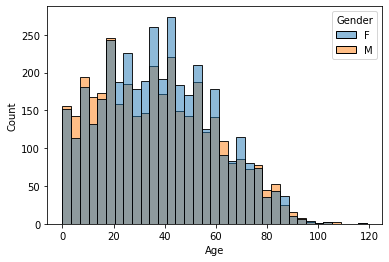

In [10]:
sns.histplot(data=census_df, x='Age', hue='Gender', multiple='layer')

#### Maximum Age

In [11]:
print(f"Overall maximum Age: {census_df['Age'].max()}")
print(f"Male maximum Age: {census_df.loc[census_df['Gender'] == 'M', 'Age'].max()}")
print(f"Female maximum Age: {census_df.loc[census_df['Gender'] == 'F', 'Age'].max()}")

Overall maximum Age: 119
Male maximum Age: 119
Female maximum Age: 119


#### Minimum Age

In [12]:
print(f"Overall maximum Age: {census_df['Age'].min()}")
print(f"Male maximum Age: {census_df.loc[census_df['Gender'] == 'M', 'Age'].min()}")
print(f"Female maximum Age: {census_df.loc[census_df['Gender'] == 'F', 'Age'].min()}")

Overall maximum Age: 0
Male maximum Age: 0
Female maximum Age: 0


#### Average Age

In [13]:
print(f"The average age of the entire population is {np.int_(np.round(census_df['Age'].mean(), 0))} years")
print(f"The average age of the male population is {np.int_(np.round(census_df.loc[census_df['Gender'] == 'M', 'Age'].mean(), 0))} years")
print(f"The average age of the female population is {np.int_(np.round(census_df.loc[census_df['Gender'] == 'F', 'Age'].mean(), 0))} years")

The average age of the entire population is 37 years
The average age of the male population is 37 years
The average age of the female population is 38 years


In [14]:
age_boundaries = list(range(0, census_df['Age'].max()+5, 5))

In [15]:
print(age_boundaries)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]


In [16]:
age_brackets = pd.cut(census_df['Age'], age_boundaries, retbins=True, include_lowest=True, right=False)[0]
age_brackets

0       [40, 45)
1       [40, 45)
2        [5, 10)
3        [5, 10)
4       [25, 30)
          ...   
7576    [35, 40)
7577    [15, 20)
7578    [10, 15)
7579    [10, 15)
7580      [0, 5)
Name: Age, Length: 7581, dtype: category
Categories (24, interval[int64, left]): [[0, 5) < [5, 10) < [10, 15) < [15, 20) ... [100, 105) < [105, 110) < [110, 115) < [115, 120)]

In [17]:
age_group_freq = age_brackets.value_counts().sort_index()
age_group_freq

[0, 5)        394
[5, 10)       445
[10, 15)      502
[15, 20)      601
[20, 25)      581
[25, 30)      513
[30, 35)      572
[35, 40)      571
[40, 45)      630
[45, 50)      556
[50, 55)      487
[55, 60)      417
[60, 65)      349
[65, 70)      264
[70, 75)      252
[75, 80)      179
[80, 85)      149
[85, 90)       78
[90, 95)       23
[95, 100)       8
[100, 105)      5
[105, 110)      3
[110, 115)      0
[115, 120)      2
Name: Age, dtype: int64

In [18]:
# in percentage
age_group_freq_perc = np.round(100 * age_group_freq/census_df.shape[0], 2)
age_group_freq_perc

[0, 5)        5.20
[5, 10)       5.87
[10, 15)      6.62
[15, 20)      7.93
[20, 25)      7.66
[25, 30)      6.77
[30, 35)      7.55
[35, 40)      7.53
[40, 45)      8.31
[45, 50)      7.33
[50, 55)      6.42
[55, 60)      5.50
[60, 65)      4.60
[65, 70)      3.48
[70, 75)      3.32
[75, 80)      2.36
[80, 85)      1.97
[85, 90)      1.03
[90, 95)      0.30
[95, 100)     0.11
[100, 105)    0.07
[105, 110)    0.04
[110, 115)    0.00
[115, 120)    0.03
Name: Age, dtype: float64

In [19]:
# set up color patterns for value ranges
# 400 and above
threshold = 400
below_400 = age_group_freq.loc[age_group_freq < threshold]
above_400 = age_group_freq.loc[~(age_group_freq.index.isin(below_400.index))]

In [20]:
below_400

[0, 5)        394
[60, 65)      349
[65, 70)      264
[70, 75)      252
[75, 80)      179
[80, 85)      149
[85, 90)       78
[90, 95)       23
[95, 100)       8
[100, 105)      5
[105, 110)      3
[110, 115)      0
[115, 120)      2
Name: Age, dtype: int64

In [21]:
above_400

[5, 10)     445
[10, 15)    502
[15, 20)    601
[20, 25)    581
[25, 30)    513
[30, 35)    572
[35, 40)    571
[40, 45)    630
[45, 50)    556
[50, 55)    487
[55, 60)    417
Name: Age, dtype: int64

#### 60 years and over

In [296]:
100 * census_df.loc[census_df['Age'] > 60, 'Age'].value_counts().sum()/census_df.shape[0]

16.303917688959242

In [22]:
# percentage of population between ages 5 to 59 years
majority_population = age_group_freq_perc.loc[age_group_freq.loc[age_group_freq >= 400].index]
majority_population

[5, 10)     5.87
[10, 15)    6.62
[15, 20)    7.93
[20, 25)    7.66
[25, 30)    6.77
[30, 35)    7.55
[35, 40)    7.53
[40, 45)    8.31
[45, 50)    7.33
[50, 55)    6.42
[55, 60)    5.50
Name: Age, dtype: float64

In [23]:
# percentage of population between ages 0 to 34 years
df = age_group_freq_perc.reset_index()
df.loc[:7]['Age'].sum()

55.129999999999995

In [24]:
sns.set_style(style='whitegrid')
pallete = sns.palettes.dark_palette('darkblue', 2)

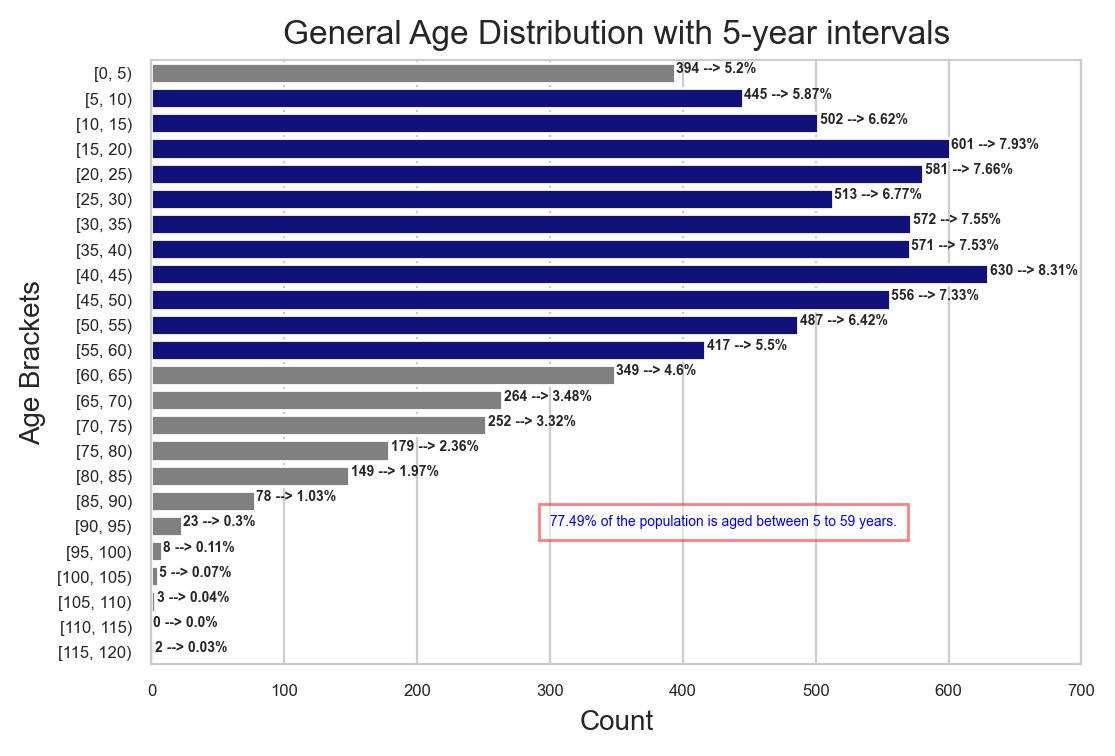

In [25]:
fig = plt.figure(figsize=(6, 4), dpi=200)
# topax, downax = fig.add_axes([0, 0, 0.9, 0.6]), fig.add_axes([0, 1, 0.9, 0.6])

below_400_plot = sns.barplot(y=below_400.index, x=below_400, color='grey')
above_400_plot = sns.barplot(y=above_400.index, x=above_400, color='darkblue')

plt.xlim(0, 700)

for i in range(len(age_group_freq.index)):
    plt.text(age_group_freq[i]+1, i, f"{age_group_freq[i]} --> {age_group_freq_perc[i]}%",
                fontsize=5, weight='bold')
    
plt.ylabel("Age Brackets")
plt.xlabel("Count")

plt.tick_params(labelsize=6)

# plt.xticks(plt.get_xticks().tolist())
# plt.xticklabels([f"{label: .0f}" for label in plt.get_xticks().tolist()], fontsize=6)

plt.title("General Age Distribution with 5-year intervals")

# plot summary
plt.text(300, 18, "{}%".format(majority_population.sum()) +
                   " of the population is aged between 5 to 59 years.",
                  color='blue', 
                   bbox={'edgecolor': 'red', 'facecolor': 'white', 'alpha': 0.5},
                  fontsize=5)

plt.show()
# plt.xticks(rotation=90);

***General age distribution plot above shows that 77.49% of the population is aged between 5 to 59 years.***

In [26]:
fname = 'age_distr_5yr_intervals.png'
cd.fig_writer(fname, fig)

'age_distr_5yr_intervals.png'

#### Age Distribution for Males vs Females

In [27]:
female_ages = census_df.loc[census_df['Gender'] == 'F', 'Age']
male_ages = census_df.loc[census_df['Gender'] == 'M', 'Age']

In [28]:
fem_age_freq = age_brackets.loc[female_ages.index].value_counts().sort_index(ascending=False)
mal_age_freq = age_brackets.loc[male_ages.index].value_counts().sort_index(ascending=False)

In [29]:
fem_age_freq

[115, 120)      1
[110, 115)      0
[105, 110)      1
[100, 105)      2
[95, 100)       6
[90, 95)        8
[85, 90)       44
[80, 85)       71
[75, 80)       82
[70, 75)      136
[65, 70)      142
[60, 65)      172
[55, 60)      222
[50, 55)      264
[45, 50)      300
[40, 45)      345
[35, 40)      309
[30, 35)      325
[25, 30)      277
[20, 25)      315
[15, 20)      292
[10, 15)      237
[5, 10)       203
[0, 5)        192
Name: Age, dtype: int64

In [30]:
mal_age_freq

[115, 120)      1
[110, 115)      0
[105, 110)      2
[100, 105)      3
[95, 100)       2
[90, 95)       15
[85, 90)       34
[80, 85)       78
[75, 80)       97
[70, 75)      116
[65, 70)      122
[60, 65)      177
[55, 60)      195
[50, 55)      223
[45, 50)      256
[40, 45)      285
[35, 40)      262
[30, 35)      247
[25, 30)      236
[20, 25)      266
[15, 20)      309
[10, 15)      265
[5, 10)       242
[0, 5)        202
Name: Age, dtype: int64

#### MALE/FEMALE RATIO
Difference between male and female population per age bracket

#### Ratio of males to females per 1000 residents:
= 1000 * (male population/female population)

In [31]:
print(f"For every 1000 females, there are {np.round(1000 * len(male_ages)/len(female_ages), 2):.0f} males")

For every 1000 females, there are 921 males


In [32]:
fem_per_male = np.round(1000 * fem_age_freq/mal_age_freq, 0).dropna()
fem_per_male

[115, 120)    1000.0
[105, 110)     500.0
[100, 105)     667.0
[95, 100)     3000.0
[90, 95)       533.0
[85, 90)      1294.0
[80, 85)       910.0
[75, 80)       845.0
[70, 75)      1172.0
[65, 70)      1164.0
[60, 65)       972.0
[55, 60)      1138.0
[50, 55)      1184.0
[45, 50)      1172.0
[40, 45)      1211.0
[35, 40)      1179.0
[30, 35)      1316.0
[25, 30)      1174.0
[20, 25)      1184.0
[15, 20)       945.0
[10, 15)       894.0
[5, 10)        839.0
[0, 5)         950.0
Name: Age, dtype: float64

In [33]:
# positive for more females, 
# negative for more males
male_fem_ratio = mal_age_freq - fem_age_freq
male_fem_ratio

[115, 120)     0
[110, 115)     0
[105, 110)     1
[100, 105)     1
[95, 100)     -4
[90, 95)       7
[85, 90)     -10
[80, 85)       7
[75, 80)      15
[70, 75)     -20
[65, 70)     -20
[60, 65)       5
[55, 60)     -27
[50, 55)     -41
[45, 50)     -44
[40, 45)     -60
[35, 40)     -47
[30, 35)     -78
[25, 30)     -41
[20, 25)     -49
[15, 20)      17
[10, 15)      28
[5, 10)       39
[0, 5)        10
Name: Age, dtype: int64

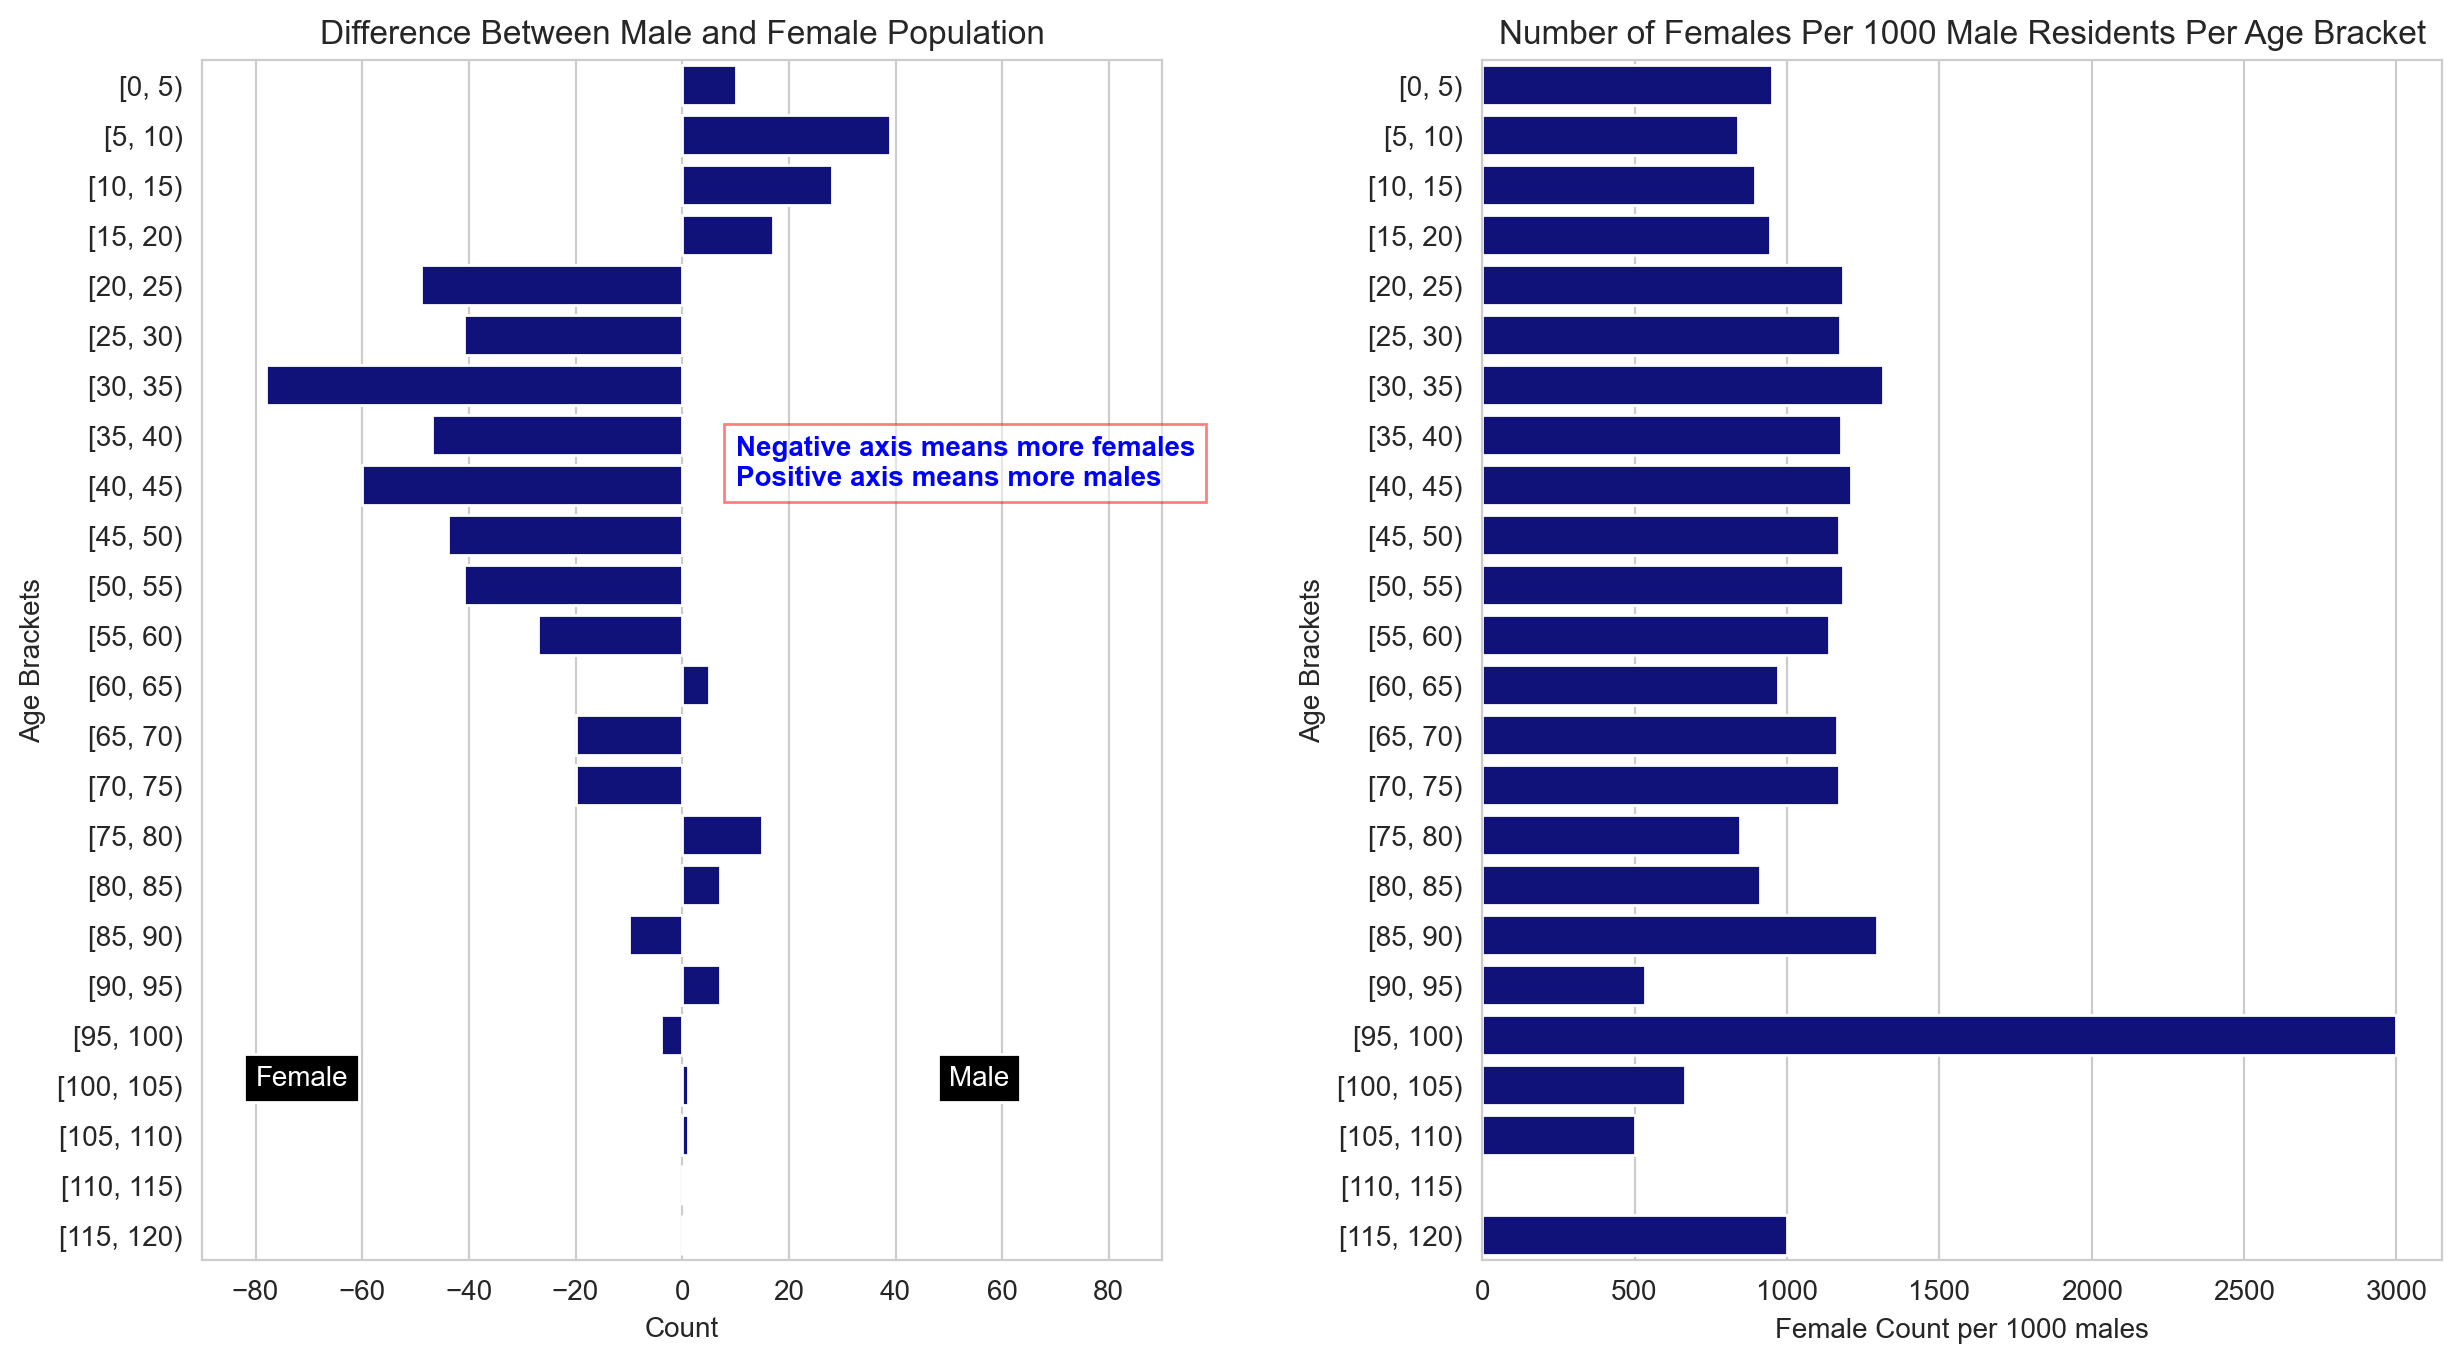

In [34]:
fig = plt.figure(figsize=(8, 6), dpi=200)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])


sns.barplot(x=male_fem_ratio, 
            y=male_fem_ratio.index, 
            color='darkblue',
           ax=l)

sns.barplot(x=fem_per_male, 
            y=fem_per_male.index, 
            color='darkblue',
           ax=r)

l.set_xlim(-90, 90)

# for i in range(len(male_fem_ratio.index)):
#     plt.text(male_fem_ratio[i], i, male_fem_ratio[i],
#                 fontsize=5, weight='bold')
    
l.set_ylabel("Age Brackets", size=10)
l.set_xlabel("Count", size=10)

r.set_ylabel("Age Brackets", size=10)
r.set_xlabel("Female Count per 1000 males", size=10)

# plt.tick_params(labelsize=6)

l.text(50, 20, 'Male', color='white',
              bbox={'facecolor':'black'})
l.text(-80, 20, 'Female', color='white',
             bbox={'facecolor':'black'})


l.set_title("Difference Between Male and Female Population")
r.set_title("Number of Females Per 1000 Male Residents Per Age Bracket")

# plot summary
note = f"Negative axis means more females\n" +\
"Positive axis means more males"
l.text(10, 8, note,
       color='blue', 
       bbox={'edgecolor': 'red', 'facecolor': 'white', 'alpha': 0.5},
       fontsize=10, fontweight='bold')

plt.show()
# plt.xticks(rotation=90);

In [35]:
fname = 'gender_population_diff.png'
cd.fig_writer(fname, fig)

'gender_population_diff.png'

C:\Users\welcome\AppData\Local\Temp/ipykernel_14228/1497576920.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  fem_plot.set(xticklabels=[400, 300, 200, 100, 0,


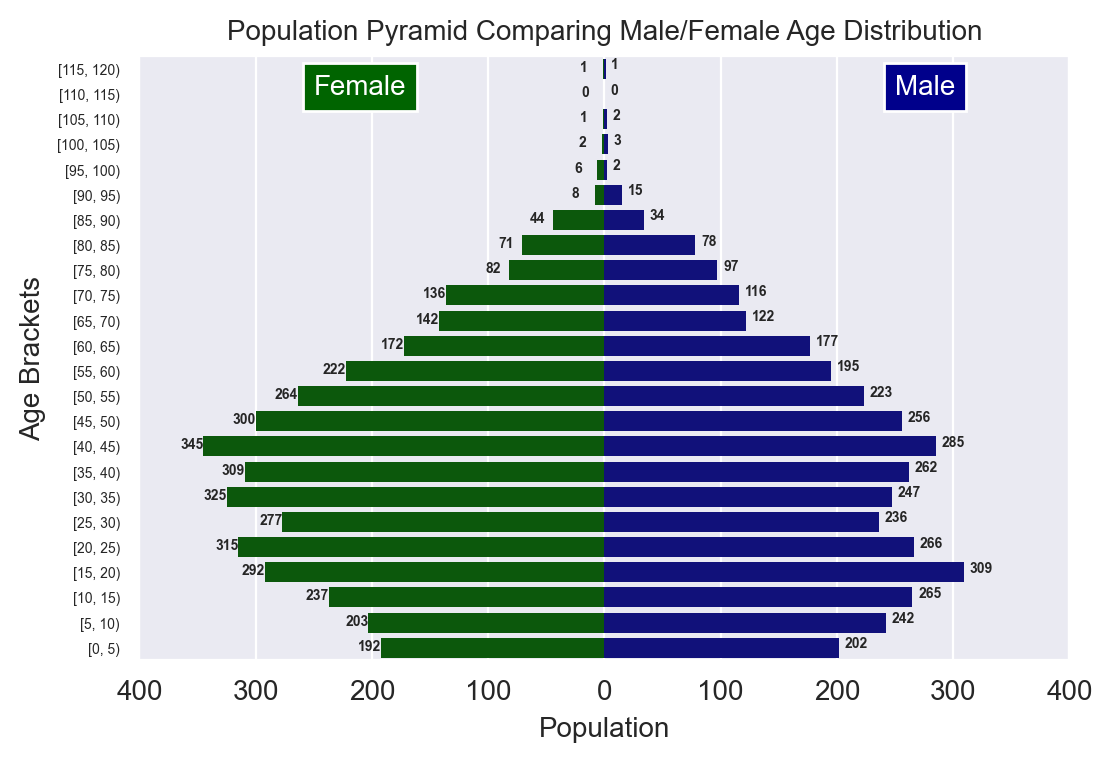

In [36]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(6, 4), dpi=200)

male_plot = sns.barplot(x=mal_age_freq, 
                        y=mal_age_freq.index, 
                        order=mal_age_freq.index,
                        color='darkblue',
                       lw=0)
fem_plot = sns.barplot(x=-1*fem_age_freq, 
                       y=fem_age_freq.index, 
                       order=fem_age_freq.index,
                       color='darkgreen',
                      lw=0)

for i in range(age_group_freq.shape[0]):
    male_plot.text(mal_age_freq[i]+5, i, mal_age_freq[i], fontweight='bold',
                  fontsize=5)
    fem_plot.text(-1*fem_age_freq[i]-20, i+0.1, fem_age_freq[i], fontweight='bold',
                  fontsize=5)
    
plt.xlim(-400, 400)
fem_plot.set(xticklabels=[400, 300, 200, 100, 0,
                         100, 200, 300, 400], xlabel='Population', ylabel='Age Brackets')

male_plot.text(250, 1, 'Male', color='white',
              bbox={'facecolor':'darkblue'})
fem_plot.text(-250, 1, 'Female', color='white',
             bbox={'facecolor':'darkgreen'})

fem_plot.set_yticklabels(fem_plot.get_yticklabels(), size=5)

plt.title("Population Pyramid Comparing Male/Female Age Distribution", fontsize=10);

In [37]:
fname = 'age_pyramid_5yr_intervals.png'
cd.fig_writer(fname, fig)

'age_pyramid_5yr_intervals.png'

In [38]:
fname = 'age_pyramid_5yr_intervals.png'
cd.fig_writer(fname, fig)

'age_pyramid_5yr_intervals.png'

#### Average age of male

#### Male age 40 and below

In [39]:
husbands_forty_below = census_df.loc[(census_df['Gender'] == 'M') & 
                                     (census_df['Marital Status'] == 'Married') &
                                     (census_df['Age'] <= 40)]
husbands_forty_below.shape[0]

295

In [40]:
husbands = census_df.loc[(census_df['Gender'] == 'M') & 
                         (census_df['Marital Status'] == 'Married')]
husbands.shape[0]

1084

In [41]:
100 * husbands_forty_below.shape[0]/husbands.shape[0]

27.214022140221402

Moving from one age bracket to the next, the male population

#### Female age 40 and below

In [42]:
wives_forty_below = census_df.loc[(census_df['Gender'] == 'F') & 
                                     (census_df['Marital Status'] == 'Married') &
                                     (census_df['Age'] <= 40)]
wives_forty_below.shape[0]

344

In [43]:
wives = census_df.loc[(census_df['Gender'] == 'M') & 
                         (census_df['Marital Status'] == 'Married')]
wives.shape[0]

1084

In [44]:
100 * wives_forty_below.shape[0]/wives.shape[0]

31.73431734317343

#### 10 year interval

In [45]:
tenyr_age_boundaries = list(range(0, census_df['Age'].max()+10, 10))
tenyr_age_boundaries

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

In [46]:
tenyr_age_brac = pd.cut(census_df['Age'], tenyr_age_boundaries, right=False, include_lowest=True)
tenyr_age_brac

0       [40, 50)
1       [40, 50)
2        [0, 10)
3        [0, 10)
4       [20, 30)
          ...   
7576    [30, 40)
7577    [10, 20)
7578    [10, 20)
7579    [10, 20)
7580     [0, 10)
Name: Age, Length: 7581, dtype: category
Categories (12, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) ... [80, 90) < [90, 100) < [100, 110) < [110, 120)]

In [47]:
tenyr_age_freq = tenyr_age_brac.value_counts().sort_index()
tenyr_age_freq

[0, 10)        839
[10, 20)      1103
[20, 30)      1094
[30, 40)      1143
[40, 50)      1186
[50, 60)       904
[60, 70)       613
[70, 80)       431
[80, 90)       227
[90, 100)       31
[100, 110)       8
[110, 120)       2
Name: Age, dtype: int64

In [48]:
tenyr_age_perc = np.round(100 * tenyr_age_freq/tenyr_age_freq.sum(), 2)
tenyr_age_perc

[0, 10)       11.07
[10, 20)      14.55
[20, 30)      14.43
[30, 40)      15.08
[40, 50)      15.64
[50, 60)      11.92
[60, 70)       8.09
[70, 80)       5.69
[80, 90)       2.99
[90, 100)      0.41
[100, 110)     0.11
[110, 120)     0.03
Name: Age, dtype: float64

In [49]:
perc_pop_below_50 = tenyr_age_perc.reset_index().loc[:4, 'Age'].sum()

In [50]:
perc_pop_below_40 = np.round(tenyr_age_perc.reset_index().loc[:3, 'Age'].sum(), 2)
perc_pop_below_40

55.13

In [51]:
print(f"{perc_pop_below_50}% of the population are below 50 years\n" +
     f"{perc_pop_below_40}% of the population are below 40 years")

70.77% of the population are below 50 years
55.13% of the population are below 40 years


In [52]:
df = tenyr_age_freq.reset_index()
df

index   Age
0      [0, 10)   839
1     [10, 20)  1103
2     [20, 30)  1094
3     [30, 40)  1143
4     [40, 50)  1186
5     [50, 60)   904
6     [60, 70)   613
7     [70, 80)   431
8     [80, 90)   227
9    [90, 100)    31
10  [100, 110)     8
11  [110, 120)     2

In [53]:
df.loc[:4, 'Age']

0     839
1    1103
2    1094
3    1143
4    1186
Name: Age, dtype: int64

In [54]:
df.loc[5:, 'Age']

5     904
6     613
7     431
8     227
9      31
10      8
11      2
Name: Age, dtype: int64

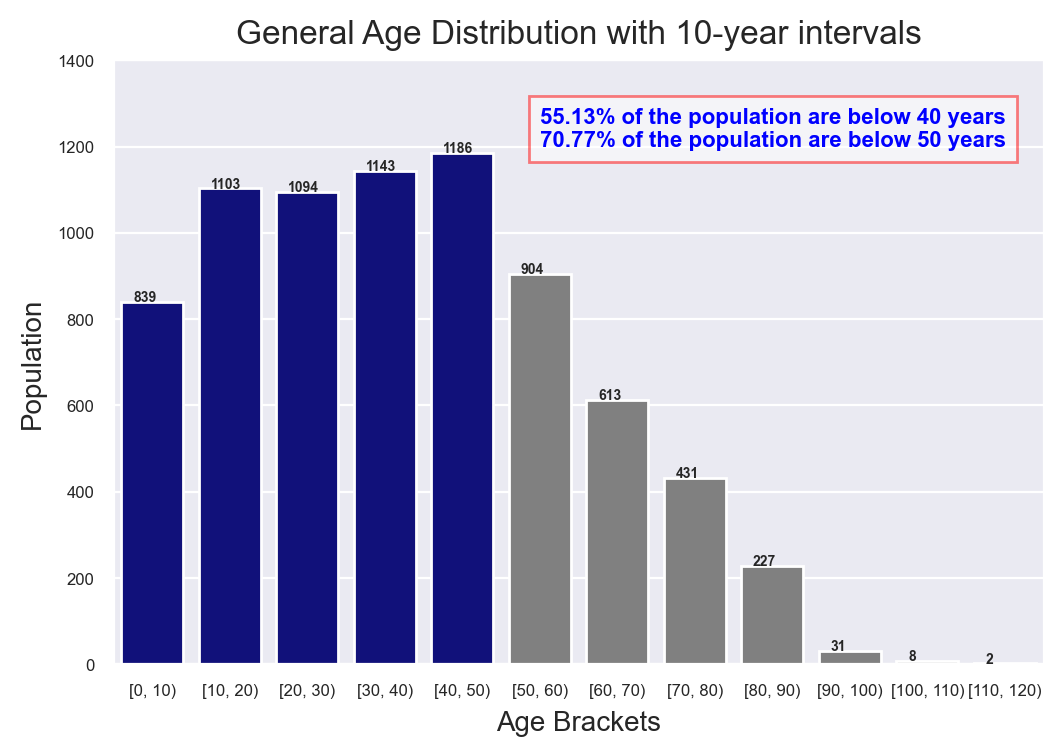

In [55]:
fig = plt.figure(figsize=(6, 4), dpi=200)
# topax, downax = fig.add_axes([0, 0, 0.9, 0.6]), fig.add_axes([0, 1, 0.9, 0.6])


below_50_ax = sns.barplot(x=df.loc[:4, 'index'], 
                          y=df.loc[:4, 'Age'], 
                          color='darkblue')

fifty_above_ax = sns.barplot(x=df.loc[5:, 'index'], 
                         y=df.loc[5:, 'Age'], 
                         color='grey')

plt.ylim(0, 1400)

for i in range(len(tenyr_age_freq.index)):
    plt.text(i-0.25, tenyr_age_freq[i]+1, tenyr_age_freq[i],
                fontsize=5, weight='bold')
    
plt.xlabel("Age Brackets")
plt.ylabel("Population")

plt.tick_params(labelsize=6)


plt.title("General Age Distribution with 10-year intervals")

# plot summary
note = f"{perc_pop_below_40}% of the population are below 40 years\n" +\
f"{perc_pop_below_50}% of the population are below 50 years"
plt.text(5, 1200, note,
                  color='blue', 
                   bbox={'edgecolor': 'red', 'facecolor': 'white', 'alpha': 0.5},
                  fontsize=8, fontweight='bold')

plt.show()
# plt.xticks(rotation=90);

In [56]:
fname = 'age_pyramid_10yr_intervals.png'
cd.fig_writer(fname, fig)

'age_pyramid_10yr_intervals.png'

In [57]:
twentyyr_gen_age_freq = pd.cut(census_df['Age'], bins=[0, 20, 40, 60, 80, 100, 120], right=False, include_lowest=True).value_counts().sort_index()
twentyyr_gen_age_freq

[0, 20)       1942
[20, 40)      2237
[40, 60)      2090
[60, 80)      1044
[80, 100)      258
[100, 120)      10
Name: Age, dtype: int64

In [58]:
np.round(100 * twentyyr_gen_age_freq/twentyyr_gen_age_freq.sum(), 2)

[0, 20)       25.62
[20, 40)      29.51
[40, 60)      27.57
[60, 80)      13.77
[80, 100)      3.40
[100, 120)     0.13
Name: Age, dtype: float64

#### Average Age per House

In [59]:
ave_age_per_addr = census_df[['Address', 'Age']].groupby(by=['Address']).mean().astype(np.int_)
ave_age_per_addr.columns = ave_age_per_addr.columns.str.replace('Age', 'Average Age')
ave_age_per_addr

Average Age
Address                           
1, Adams Ranch                  21
1, Adams Ways                   71
1, Aethelstan Prairie           24
1, Albert Lane                  20
1, Albion Springs               35
...                            ...
98, James Views                 38
98, Watson Throughway           46
99, Bell Orchard                48
99, James Views                 31
99, Watson Throughway           76

[2878 rows x 1 columns]

#### Age Distribution of Household Average Ages

In [60]:
ave_age_per_addr_freq = pd.cut(ave_age_per_addr['Average Age'], age_boundaries, retbins=True, include_lowest=True, right=False)[0].value_counts().sort_index()
ave_age_per_addr_freq

[0, 5)          0
[5, 10)         6
[10, 15)       54
[15, 20)      178
[20, 25)      357
[25, 30)      319
[30, 35)      353
[35, 40)      298
[40, 45)      267
[45, 50)      179
[50, 55)      137
[55, 60)      119
[60, 65)       89
[65, 70)      122
[70, 75)      142
[75, 80)       86
[80, 85)       95
[85, 90)       52
[90, 95)       15
[95, 100)       4
[100, 105)      5
[105, 110)      1
[110, 115)      0
[115, 120)      0
Name: Average Age, dtype: int64

In [61]:
ave_age_per_addr_overall_perc = np.round(100 * ave_age_per_addr_freq/ave_age_per_addr_freq.sum(), 2).reset_index()
ave_age_per_addr_overall_perc.columns = ave_age_per_addr_overall_perc.columns.str.replace('Average Age', '%Age Count').str.replace('index', 'Age Bracket')
ave_age_per_addr_overall_perc

Age Bracket  %Age Count
0       [0, 5)        0.00
1      [5, 10)        0.21
2     [10, 15)        1.88
3     [15, 20)        6.18
4     [20, 25)       12.40
5     [25, 30)       11.08
6     [30, 35)       12.27
7     [35, 40)       10.35
8     [40, 45)        9.28
9     [45, 50)        6.22
10    [50, 55)        4.76
11    [55, 60)        4.13
12    [60, 65)        3.09
13    [65, 70)        4.24
14    [70, 75)        4.93
15    [75, 80)        2.99
16    [80, 85)        3.30
17    [85, 90)        1.81
18    [90, 95)        0.52
19   [95, 100)        0.14
20  [100, 105)        0.17
21  [105, 110)        0.03
22  [110, 115)        0.00
23  [115, 120)        0.00

In [62]:
above_9_perc = ave_age_per_addr_overall_perc.loc[ave_age_per_addr_overall_perc['%Age Count'] > 9]
above_9_perc

Age Bracket  %Age Count
4    [20, 25)       12.40
5    [25, 30)       11.08
6    [30, 35)       12.27
7    [35, 40)       10.35
8    [40, 45)        9.28

In [63]:
below_9_perc = ave_age_per_addr_overall_perc.loc[~(ave_age_per_addr_overall_perc['%Age Count'] > 9)]
below_9_perc

Age Bracket  %Age Count
0       [0, 5)        0.00
1      [5, 10)        0.21
2     [10, 15)        1.88
3     [15, 20)        6.18
9     [45, 50)        6.22
10    [50, 55)        4.76
11    [55, 60)        4.13
12    [60, 65)        3.09
13    [65, 70)        4.24
14    [70, 75)        4.93
15    [75, 80)        2.99
16    [80, 85)        3.30
17    [85, 90)        1.81
18    [90, 95)        0.52
19   [95, 100)        0.14
20  [100, 105)        0.17
21  [105, 110)        0.03
22  [110, 115)        0.00
23  [115, 120)        0.00

In [64]:
below_9_perc['%Age Count'].index

Int64Index([0, 1, 2, 3, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
            23],
           dtype='int64')

In [65]:
above_9_perc['%Age Count'].index

Int64Index([4, 5, 6, 7, 8], dtype='int64')

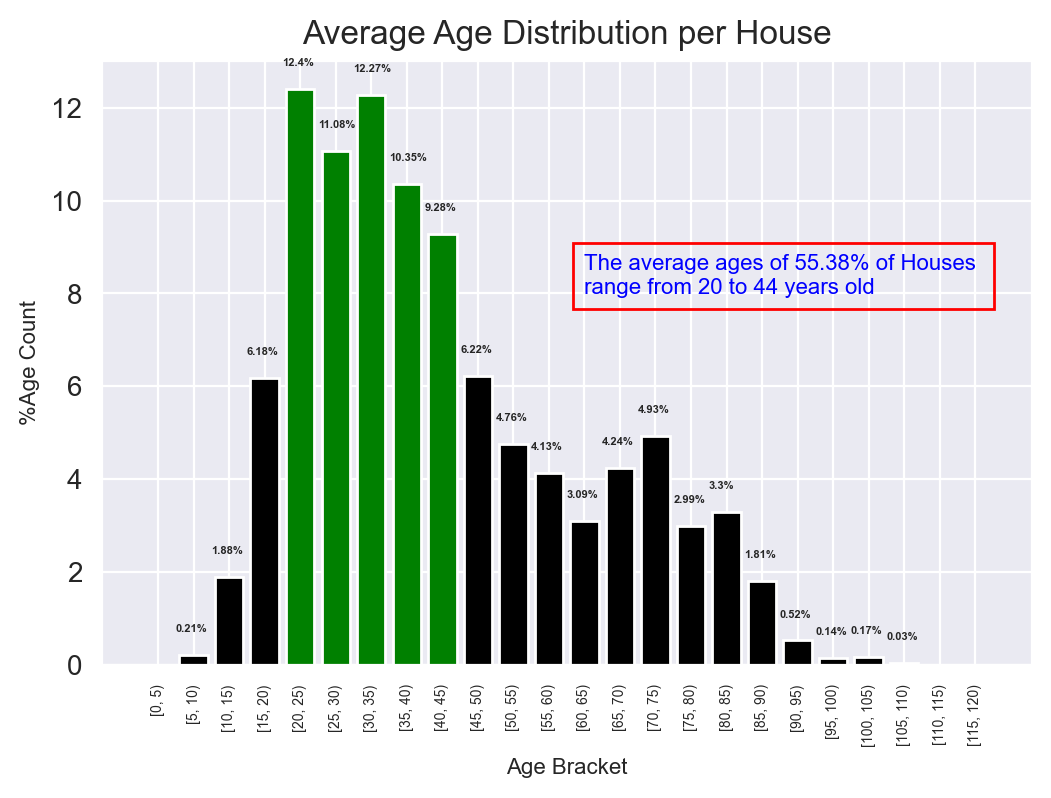

In [66]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(6, 4), dpi=200)

plt.bar(x=above_9_perc['%Age Count'].index,
        height=above_9_perc['%Age Count'], 
            color='green',)
#             ci=None)

plt.bar(x=below_9_perc['%Age Count'].index, 
            height=below_9_perc['%Age Count'],
            color='black', )
#             ci=None)

# plt.set(xlabel='Number of Houses', ylabel='Average Age Bracket')
plt.xticks(ticks=ave_age_per_addr_overall_perc.index, 
           labels=ave_age_per_addr_overall_perc['Age Bracket'],
          rotation=90, size=5)
plt.xlabel("Age Bracket", fontsize=8)
plt.ylabel("%Age Count", fontsize=8)

for i in range(ave_age_per_addr_overall_perc.shape[0]):
    if ave_age_per_addr_overall_perc.loc[i, '%Age Count']:
        plt.text(i-0.5, ave_age_per_addr_overall_perc.loc[i, '%Age Count']+0.5,
                 f"{ave_age_per_addr_overall_perc.loc[i, '%Age Count']}%",
                 size=4, weight='bold')
        
plt.text(12, 8, f"The average ages of {np.round(above_9_perc['%Age Count'].sum(), 2)}% of Houses \n"+
        f"range from 20 to 44 years old", size=8, color='blue', 
        bbox={'edgecolor':'red', 'facecolor':'none'})

plt.title("Average Age Distribution per House");

In [67]:
fname = 'average_count_per_house.png'
cd.fig_writer(fname, fig)

'average_count_per_house.png'

#### Retired residents

In [68]:
# AGE of retired resident
census_df.loc[census_df['Is Retired'] == 1, 'Age'].shape[0]/census_df.shape[0]

0.10130589631974674

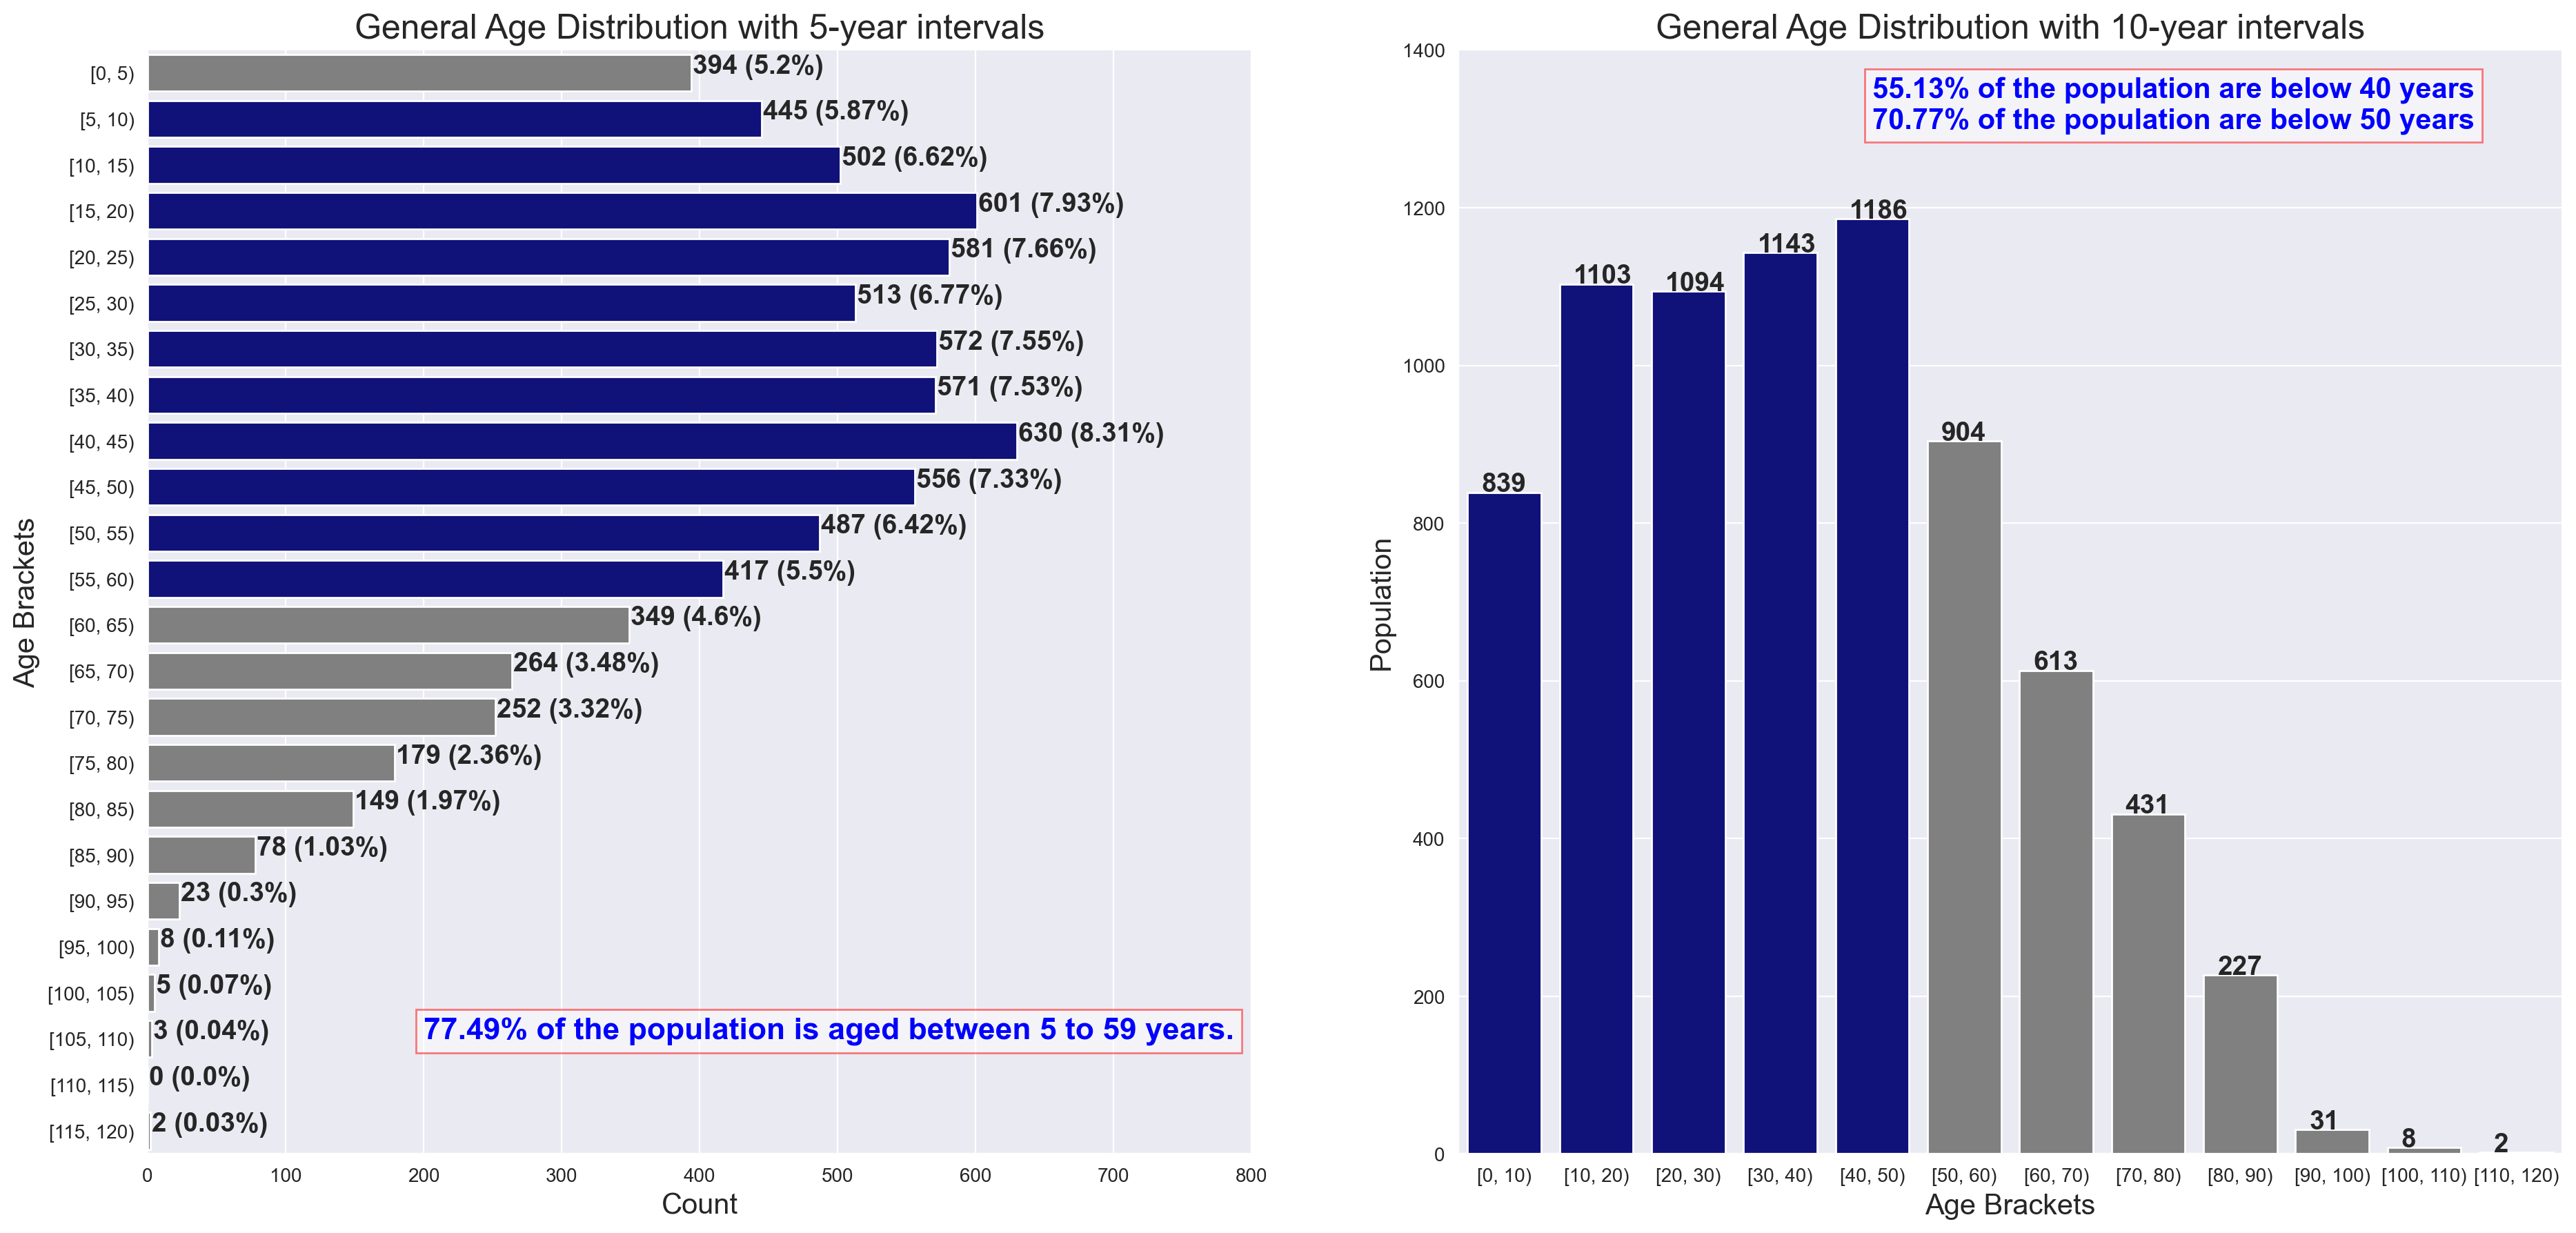

In [69]:
fig = plt.figure(figsize=(10, 8), dpi=200)
l, r = fig.add_axes([0, 0, 0.8, 1]), fig.add_axes([0.95, 0, 0.8, 1])

below_400_plot = sns.barplot(y=below_400.index, x=below_400, color='grey', ax=l)
above_400_plot = sns.barplot(y=above_400.index, x=above_400, color='darkblue', ax=l)

below_50_ax = sns.barplot(x=df.loc[:4, 'index'], 
                          y=df.loc[:4, 'Age'], 
                          color='darkblue',
                         ax=r)

fifty_above_ax = sns.barplot(x=df.loc[5:, 'index'], 
                         y=df.loc[5:, 'Age'], 
                         color='grey',
                            ax=r)

l.set_xlim(0, 800), r.set_ylim(0, 1400)

for i in range(len(age_group_freq.index)):
    l.text(age_group_freq[i]+1, i, f"{age_group_freq[i]} ({age_group_freq_perc[i]}%)",
                fontsize=14, weight='bold')
    
for i in range(len(tenyr_age_freq.index)):
    r.text(i-0.25, tenyr_age_freq[i]+1, tenyr_age_freq[i],
                fontsize=14, weight='bold')
    
l.set_ylabel("Age Brackets", size=15)
l.set_xlabel("Count", size=15)
r.set_xlabel("Age Brackets", size=15)
r.set_ylabel("Population", size=15)

l.tick_params(labelsize=10)
r.tick_params(labelsize=10)


# plt.xticks(plt.get_xticks().tolist())
# plt.xticklabels([f"{label: .0f}" for label in plt.get_xticks().tolist()], fontsize=6)

r.set_title("General Age Distribution with 10-year intervals", size=18)
l.set_title("General Age Distribution with 5-year intervals", size=18)

# plot summary
l.text(200, 21, "{}%".format(majority_population.sum()) +
                   " of the population is aged between 5 to 59 years.",
                  color='blue', 
                   bbox={'edgecolor': 'red', 'facecolor': 'white', 'alpha': 0.5},
                  fontsize=16, weight='bold')

note = f"{perc_pop_below_40}% of the population are below 40 years\n" +\
f"{perc_pop_below_50}% of the population are below 50 years"
r.text(4, 1300, note,
                  color='blue', 
                   bbox={'edgecolor': 'red', 'facecolor': 'white', 'alpha': 0.5},
                  fontsize=15, fontweight='bold')

plt.show()
# plt.xticks(rotation=90);

In [70]:
fname = 'combo_gen_age_distr.png'
cd.fig_writer(fname, fig)

'combo_gen_age_distr.png'

___

## UNEMPLOYMENT TRENDS

In [71]:
unemployed = census_df.loc[census_df['Is Unemployed'] == 1]
unemployed

House Number          Street First Name     Surname  Age  \
21              10  Simmons Meadow   Danielle       Price   28   
63              25   Morgan Avenue       Dawn       Heath   59   
73              31   Morgan Avenue   Jennifer        Todd   48   
99              51   Morgan Avenue    Natalie     Pearson   50   
122              7     Pillar Road   Nicholas    Morrison   37   
...            ...             ...        ...         ...  ...   
7545             1      White Fort     Marian       Welch   35   
7555             1   Grant Commune       Adam       Lyons   26   
7558             1   Grant Commune      Garry  Richardson   48   
7568             1   Love Fortress      James  O'Sullivan   45   
7576             1     Newry Spire     Howard      Taylor   37   

     Relationship to Head of House Marital Status Gender  Occupation  \
21                            Head         Single      F  Unemployed   
63                            Head         Single      F  Unemployed   
73                            Head         Single      F  Unemployed   
99                            Head         Single      F  Unemployed   
122                           Head         Single      M  Unemployed   
...                            ...            ...    ...         ...   
7545                          Head         Single      F  Unemployed   
7555                        Lodger       Divorced      M  Unemployed   
7558                        Lodger         Single      M  Unemployed   
7568                       Husband        Married      M  Unemployed   
7576                          Head         Single      M  Unemployed   

     Infirmity   Religion             Address  Is Retired  Is Unemployed  \
21        None  Christian  10, Simmons Meadow           0              1   
63        None  Christian   25, Morgan Avenue           0              1   
73        None  Christian   31, Morgan Avenue           0              1   
99        None   Catholic   51, Morgan Avenue           0              1   
122       None  Christian      7, Pillar Road           0              1   
...        ...        ...                 ...         ...            ...   
7545      None   Catholic       1, White Fort           0              1   
7555      None       None    1, Grant Commune           0              1   
7558      None  Christian    1, Grant Commune           0              1   
7568      None       None    1, Love Fortress           0              1   
7576      None       None      1, Newry Spire           0              1   

      Is Student Major Religions  
21             0       Christian  
63             0       Christian  
73             0       Christian  
99             0       Christian  
122            0       Christian  
...          ...             ...  
7545           0       Christian  
7555           0         Unknown  
7558           0       Christian  
7568           0         Unknown  
7576           0         Unknown  

[535 rows x 16 columns]

#### Those who are actively unemployed (below 65 years and unemployed)

In [72]:
actively_unemployed = unemployed.loc[unemployed['Age'] <= 65]
actively_unemployed.shape[0]

494

In [73]:
unemployed.shape[0] - actively_unemployed.shape[0]

41

### Are certain ages more likely to be unemployed than others?

#### Age Distribution of Unemployed Residents

In [74]:
age_boundaries = list(range(0, census_df['Age'].max()+5, 5))
print(age_boundaries)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]


#### Classify the ages of unemployed residents

In [75]:
unemp_age_cls = pd.cut(unemployed['Age'], age_boundaries, retbins=True, right=False, include_lowest=True)[0]
unemp_age_cls

21      [25, 30)
63      [55, 60)
73      [45, 50)
99      [50, 55)
122     [35, 40)
          ...   
7545    [35, 40)
7555    [25, 30)
7558    [45, 50)
7568    [45, 50)
7576    [35, 40)
Name: Age, Length: 535, dtype: category
Categories (24, interval[int64, left]): [[0, 5) < [5, 10) < [10, 15) < [15, 20) ... [100, 105) < [105, 110) < [110, 115) < [115, 120)]

#### Unemployment Trend Across Age Brackets

In [76]:
# Frequency table for age distribution of unemployed residents
unemp_age_cls_freq = unemp_age_cls.value_counts().sort_index()
unemp_age_cls_freq

[0, 5)         0
[5, 10)        0
[10, 15)       0
[15, 20)       2
[20, 25)      15
[25, 30)      52
[30, 35)      71
[35, 40)      69
[40, 45)      77
[45, 50)      53
[50, 55)      56
[55, 60)      56
[60, 65)      36
[65, 70)      20
[70, 75)       8
[75, 80)      12
[80, 85)       3
[85, 90)       5
[90, 95)       0
[95, 100)      0
[100, 105)     0
[105, 110)     0
[110, 115)     0
[115, 120)     0
Name: Age, dtype: int64

In [77]:
# as a percentage of total unemployed ("share of pie")
unemp_age_cls_freq_perc = np.round(100 * unemp_age_cls_freq/unemp_age_cls_freq.sum(), 2)
unemp_age_cls_freq_perc

[0, 5)         0.00
[5, 10)        0.00
[10, 15)       0.00
[15, 20)       0.37
[20, 25)       2.80
[25, 30)       9.72
[30, 35)      13.27
[35, 40)      12.90
[40, 45)      14.39
[45, 50)       9.91
[50, 55)      10.47
[55, 60)      10.47
[60, 65)       6.73
[65, 70)       3.74
[70, 75)       1.50
[75, 80)       2.24
[80, 85)       0.56
[85, 90)       0.93
[90, 95)       0.00
[95, 100)      0.00
[100, 105)     0.00
[105, 110)     0.00
[110, 115)     0.00
[115, 120)     0.00
Name: Age, dtype: float64

In [78]:
# ages 25 to 44
unemp_age_cls_freq_perc.reset_index().loc[4:8, 'Age'].sum()

53.08

In [79]:
# colored red, others colored darkred
ten_perc_and_above = unemp_age_cls_freq_perc.loc[unemp_age_cls_freq_perc >= 10]
ten_perc_and_above

[30, 35)    13.27
[35, 40)    12.90
[40, 45)    14.39
[50, 55)    10.47
[55, 60)    10.47
Name: Age, dtype: float64

In [80]:
below_ten_perc = unemp_age_cls_freq_perc.loc[~(unemp_age_cls_freq_perc.index.isin(ten_perc_and_above.index))]
below_ten_perc

[0, 5)        0.00
[5, 10)       0.00
[10, 15)      0.00
[15, 20)      0.37
[20, 25)      2.80
[25, 30)      9.72
[45, 50)      9.91
[60, 65)      6.73
[65, 70)      3.74
[70, 75)      1.50
[75, 80)      2.24
[80, 85)      0.56
[85, 90)      0.93
[90, 95)      0.00
[95, 100)     0.00
[100, 105)    0.00
[105, 110)    0.00
[110, 115)    0.00
[115, 120)    0.00
Name: Age, dtype: float64

In [81]:
# as a percentage of the entire population - overall percentage
# for proper perspective
unemp_age_cls_overall_perc = np.round(unemp_age_cls_freq/census_df.shape[0], 3)
unemp_age_cls_overall_perc

[0, 5)        0.000
[5, 10)       0.000
[10, 15)      0.000
[15, 20)      0.000
[20, 25)      0.002
[25, 30)      0.007
[30, 35)      0.009
[35, 40)      0.009
[40, 45)      0.010
[45, 50)      0.007
[50, 55)      0.007
[55, 60)      0.007
[60, 65)      0.005
[65, 70)      0.003
[70, 75)      0.001
[75, 80)      0.002
[80, 85)      0.000
[85, 90)      0.001
[90, 95)      0.000
[95, 100)     0.000
[100, 105)    0.000
[105, 110)    0.000
[110, 115)    0.000
[115, 120)    0.000
Name: Age, dtype: float64

#### Plot Showing the Age Distribution of Unemployed Residents

Text(0.5, 1.0, 'Age Distribution of Unemployed Residents')

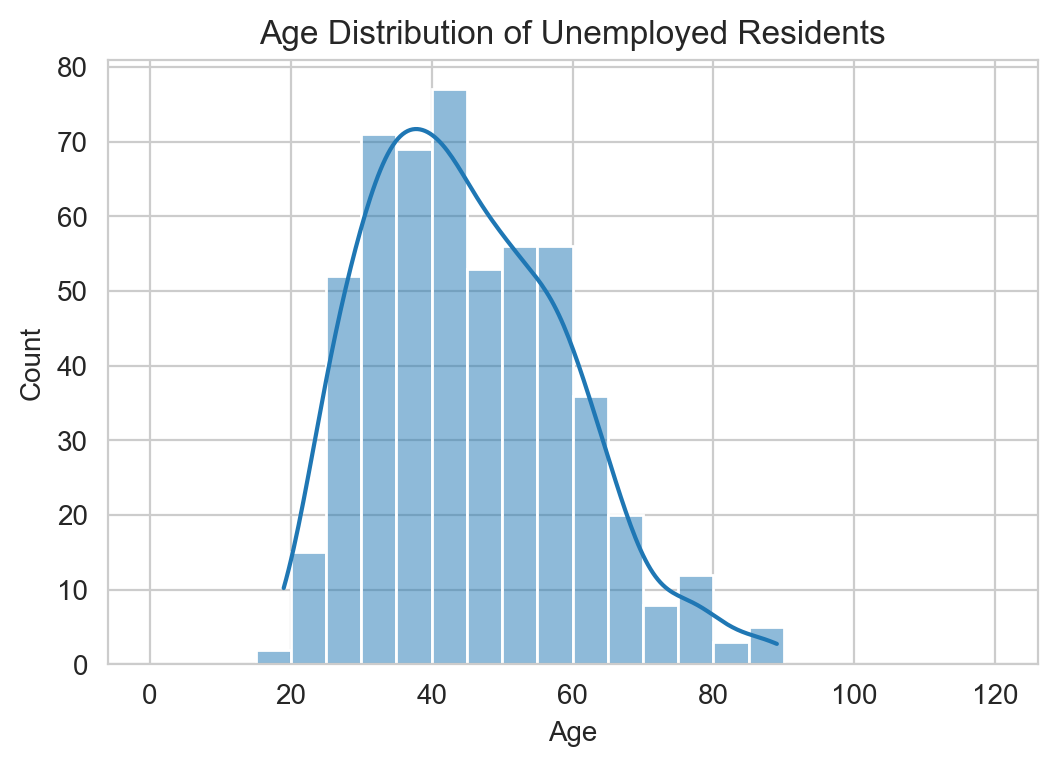

In [82]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(6, 4), dpi=200)

sns.histplot(x=unemployed['Age'], kde=True, bins=age_boundaries)
plt.title("Age Distribution of Unemployed Residents")

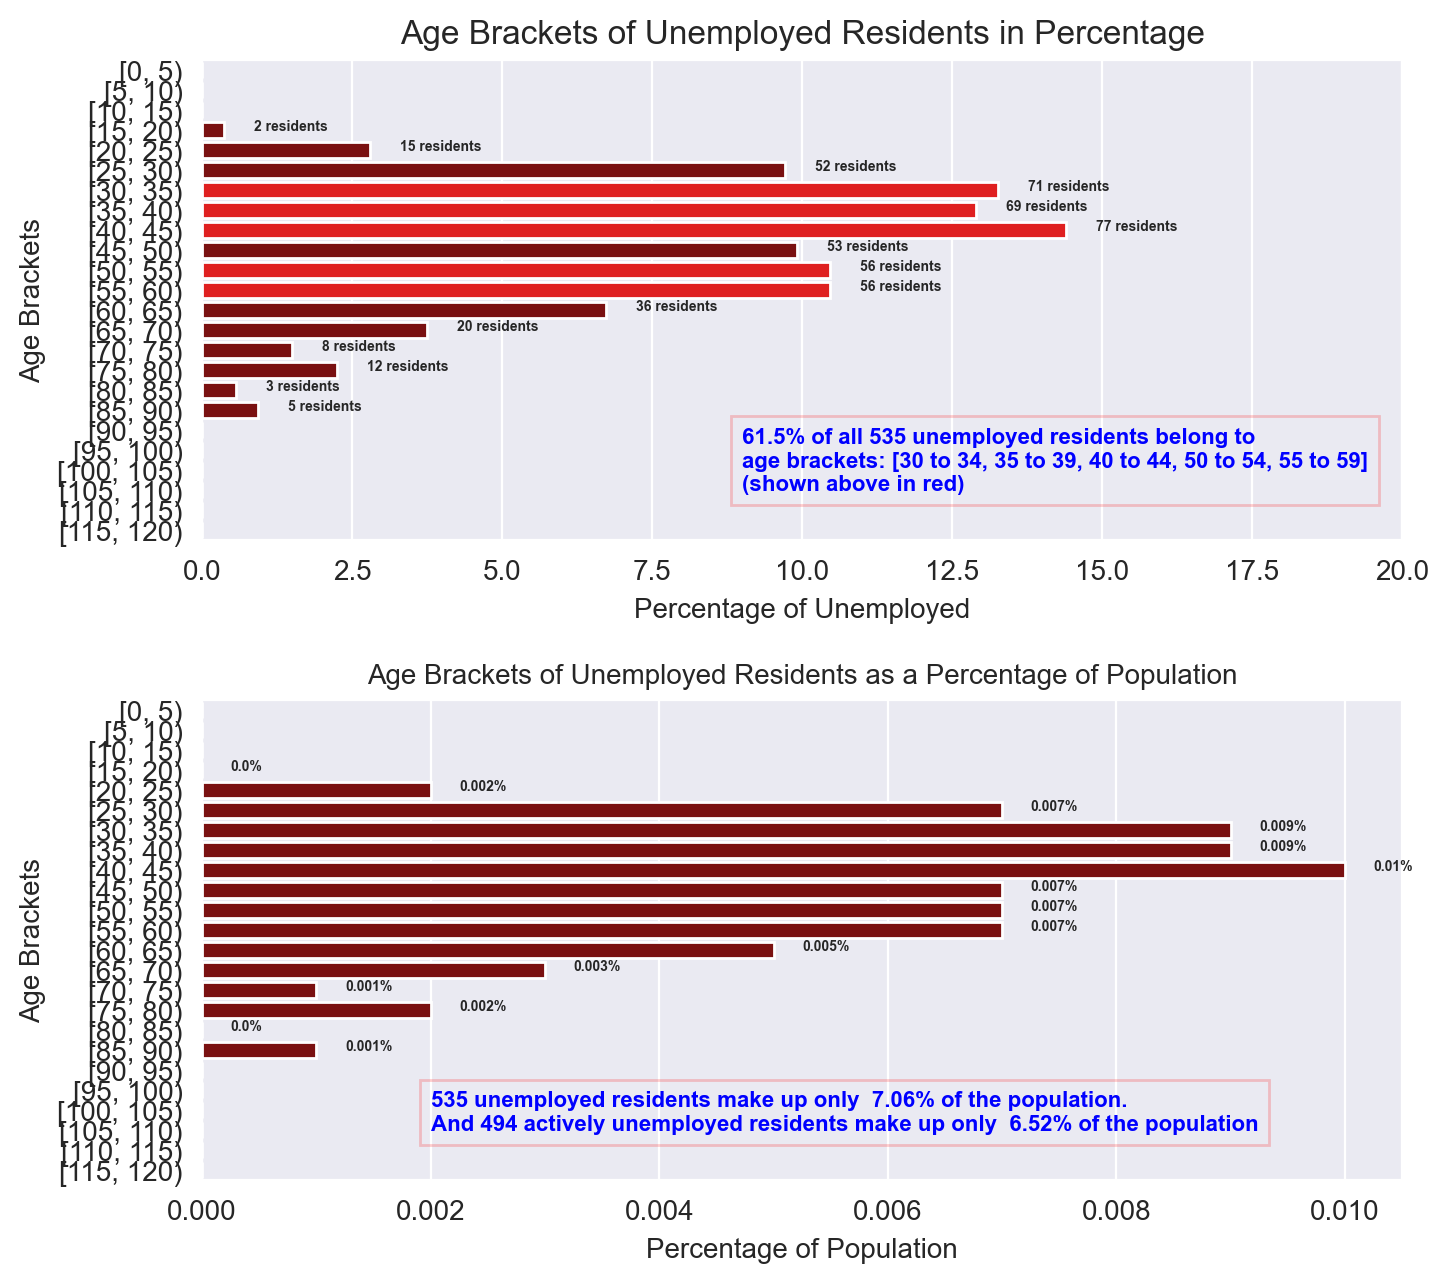

In [83]:
# set up grid layout for figure
sns.set_style(style='darkgrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(6, 4), dpi=200)
# set up plotting sections
down_ax, up_ax = fig.add_axes([0, 0, 1, 0.6]), fig.add_axes([0, 0.8, 1, 0.6])

# plot on sections
sns.barplot(x=ten_perc_and_above, 
            y=ten_perc_and_above.index, 
            color='red', ax=up_ax)
sns.barplot(x=below_ten_perc, 
            y=below_ten_perc.index, 
            color='darkred', ax=up_ax)
sns.barplot(x=unemp_age_cls_overall_perc, 
            y=unemp_age_cls_overall_perc.index, 
            color='darkred', ax=down_ax)

# set axis boundaries for plotting section
up_ax.set_xlim(0, 20)

# annotate value(s) for each bar
for i in range(unemp_age_cls_freq.shape[0]):
    if unemp_age_cls_freq[i]:
        up_ax.text(unemp_age_cls_freq_perc[i]+0.5, i, f"{unemp_age_cls_freq[i]} residents", 
                   fontsize=5, fontweight='bold')
        down_ax.text(unemp_age_cls_overall_perc[i]+0.00025, i, f"{unemp_age_cls_overall_perc[i]}%", 
                   fontsize=5, fontweight='bold')
        
# summary of plot
up_ax.text(9, 21, 
           f"{ten_perc_and_above.sum()}% of all {unemployed['Is Unemployed'].sum()} unemployed residents belong to\n" +
           "age brackets: [30 to 34, 35 to 39, 40 to 44, 50 to 54, 55 to 59]\n" +
           "(shown above in red)",
           fontsize=8, fontweight='bold', color='blue',
           bbox={'alpha': 0.2, 'facecolor':'none', 'edgecolor':'red'})

note = f"{unemployed['Is Unemployed'].sum()} unemployed residents make up only " +\
             f"{100 * unemployed['Is Unemployed'].sum()/census_df.shape[0]: .2f}% of the population.\n" +\
    f"And {actively_unemployed.shape[0]} actively unemployed residents make up only " +\
             f"{100 * actively_unemployed.shape[0]/census_df.shape[0]: .2f}% of the population"
down_ax.text(0.002, 21, note,
           fontsize=8, fontweight='bold', color='blue',
           bbox={'alpha': 0.2, 'facecolor':'none', 'edgecolor':'red'})

# label the axis of section
up_ax.set_xlabel("Percentage of Unemployed"), up_ax.set_ylabel("Age Brackets")
down_ax.set_xlabel("Percentage of Population"), down_ax.set_ylabel("Age Brackets")

# title for section
up_ax.set_title("Age Brackets of Unemployed Residents in Percentage")
down_ax.set_title("Age Brackets of Unemployed Residents as a Percentage of Population",
                 fontsize=10);

In [84]:
fname = 'gen_unempl_trend.png'
cd.fig_writer(fname, fig)

'gen_unempl_trend.png'

### Unemployment Trend Across Gender

In [85]:
unemp_per_gender = unemployed['Gender'].value_counts()
unemp_per_gender

F    349
M    186
Name: Gender, dtype: int64

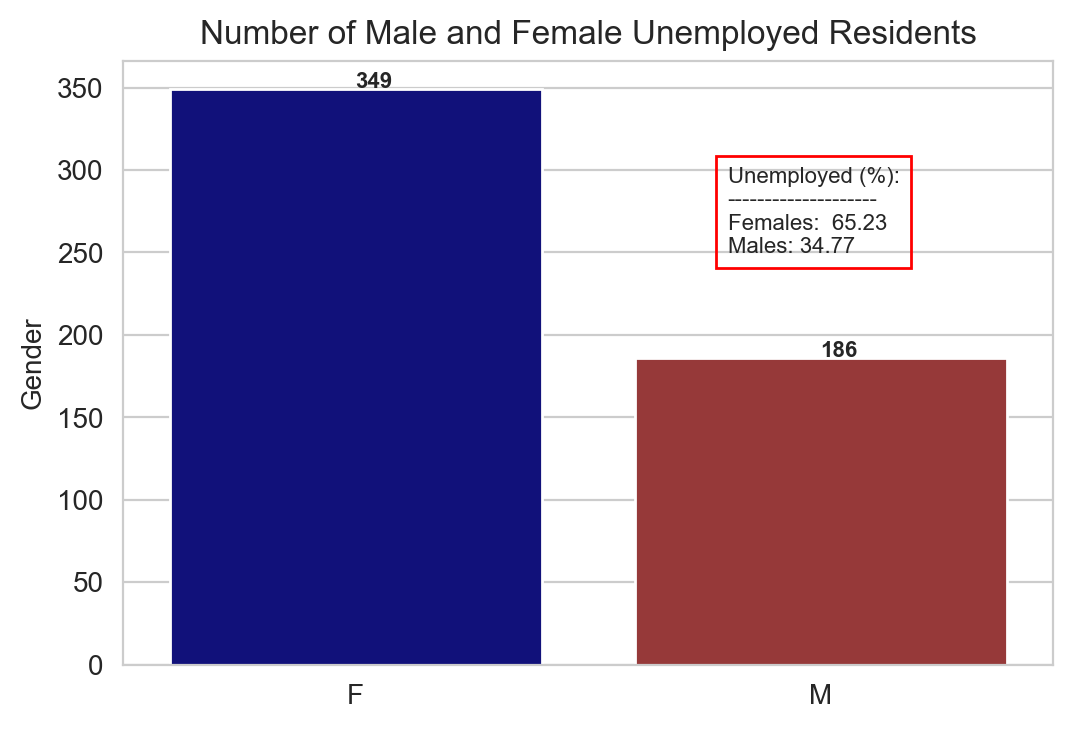

In [86]:
# set up grid layout for figure
sns.set_style(style='whitegrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(6, 4), dpi=200)

sns.barplot(x=unemp_per_gender.index,
            y=unemp_per_gender, 
            palette={'M':'brown', 'F':'darkblue'})

for i in range(unemp_per_gender.shape[0]):
    plt.text(i, unemp_per_gender[i]+1, unemp_per_gender[i],
            fontweight='bold', size=8)

note = "Unemployed (%):\n" +\
"-"*20 + f"\nFemales: {100*unemp_per_gender['F']/unemp_per_gender.sum(): .2f}" +\
f"\nMales:{100 * unemp_per_gender['M']/unemp_per_gender.sum(): .2f}"

plt.text(0.8, 250, note,
        bbox={'facecolor':'none', 'edgecolor':'red'},
        size=8)

plt.title("Number of Male and Female Unemployed Residents");

#### For each age bracket, how many females/males are unemployed?

In [87]:
unemp_fem_ages = unemp_age_cls.loc[unemployed['Gender'] == 'F']
unemp_mal_ages = unemp_age_cls.loc[unemployed['Gender'] == 'M']

In [88]:
# age distribution of unemployed males
unemp_male_age_distr = unemp_mal_ages.value_counts().sort_index()
unemp_male_age_distr

[0, 5)         0
[5, 10)        0
[10, 15)       0
[15, 20)       0
[20, 25)       3
[25, 30)      24
[30, 35)      22
[35, 40)      21
[40, 45)      23
[45, 50)      21
[50, 55)      20
[55, 60)      19
[60, 65)      17
[65, 70)       7
[70, 75)       1
[75, 80)       4
[80, 85)       1
[85, 90)       3
[90, 95)       0
[95, 100)      0
[100, 105)     0
[105, 110)     0
[110, 115)     0
[115, 120)     0
Name: Age, dtype: int64

In [89]:
unemp_fem_age_distr = unemp_fem_ages.value_counts().sort_index()
unemp_fem_age_distr

[0, 5)         0
[5, 10)        0
[10, 15)       0
[15, 20)       2
[20, 25)      12
[25, 30)      28
[30, 35)      49
[35, 40)      48
[40, 45)      54
[45, 50)      32
[50, 55)      36
[55, 60)      37
[60, 65)      19
[65, 70)      13
[70, 75)       7
[75, 80)       8
[80, 85)       2
[85, 90)       2
[90, 95)       0
[95, 100)      0
[100, 105)     0
[105, 110)     0
[110, 115)     0
[115, 120)     0
Name: Age, dtype: int64

C:\Users\welcome\AppData\Local\Temp/ipykernel_14228/631959530.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  fem_ax.set(xticklabels=[60, 40, 20, 0, 20, 40, 60], xlabel='Head Count', ylabel='Age Bracket')


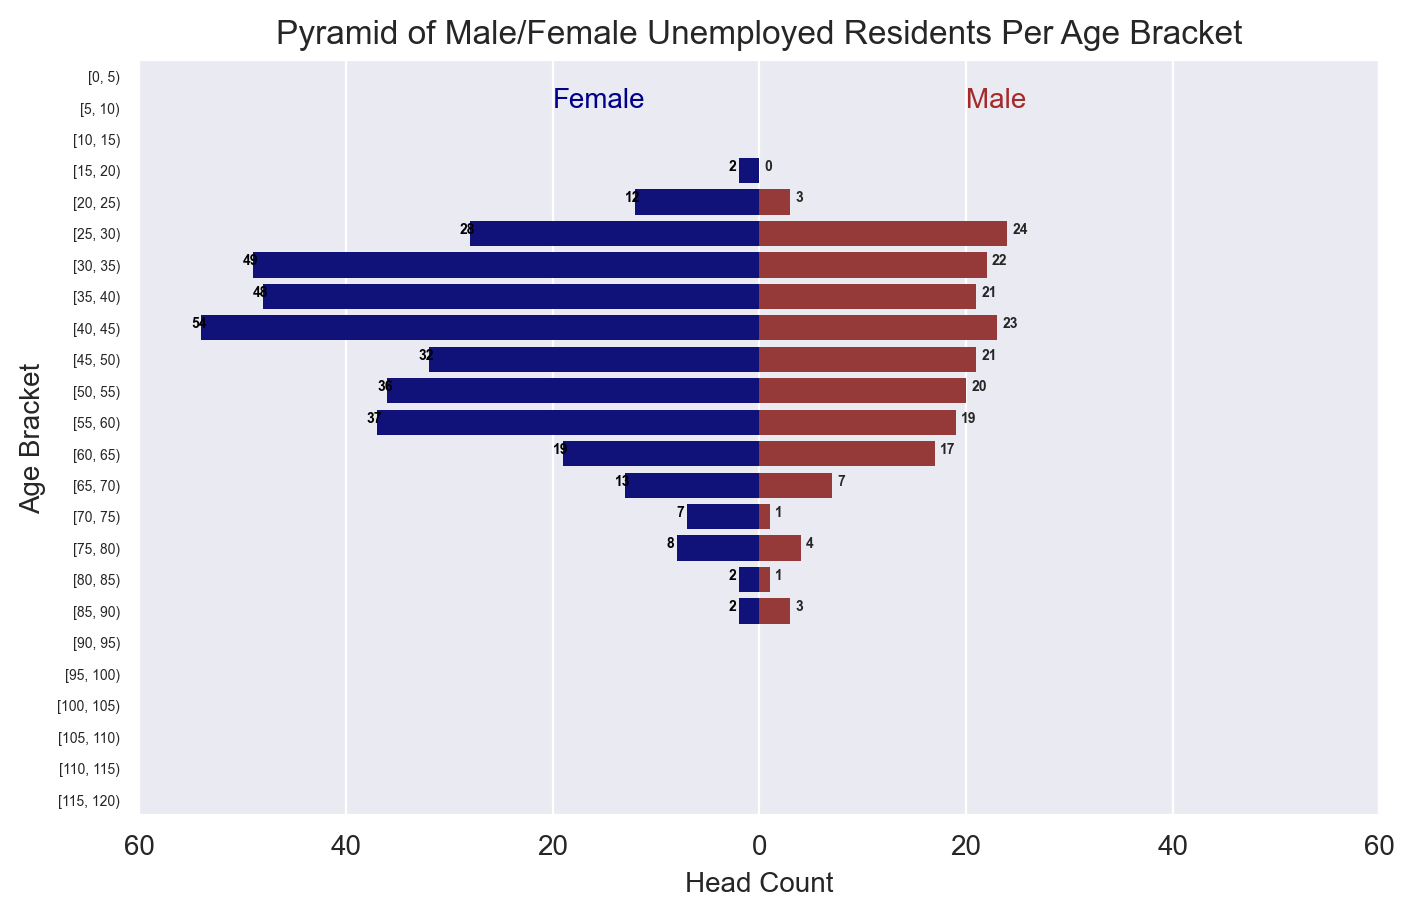

In [90]:
# set up grid layout for figure
sns.set_style(style='darkgrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(8, 5), dpi=200)

mal_ax = sns.barplot(y=unemp_male_age_distr.index, 
                     x=unemp_male_age_distr, 
                     color='brown',
                    label='Male',
                    lw=0)

fem_ax = sns.barplot(y=unemp_fem_age_distr.index, 
                     x=-1*unemp_fem_age_distr, 
                     color='darkblue',
                    label='Female',
                    lw=0)

for i in range(unemp_age_cls_freq.shape[0]):
    if unemp_male_age_distr[i] or unemp_fem_age_distr[i]:
        mal_ax.text(unemp_male_age_distr[i] + 0.5, i, unemp_male_age_distr[i],
                    fontweight='bold', size=5)
        fem_ax.text(-1*unemp_fem_age_distr[i]-1, i, unemp_fem_age_distr[i], color='black',
                    fontweight='bold', size=5)

fem_ax.set(xticklabels=[60, 40, 20, 0, 20, 40, 60], xlabel='Head Count', ylabel='Age Bracket')
fem_ax.set_yticklabels(fem_ax.get_yticklabels(), size=5)
mal_ax.text(20, 1, 'Male', color='brown')
fem_ax.text(-20, 1, 'Female', color='darkblue')

plt.xlim(-60, 60)

plt.title("Pyramid of Male/Female Unemployed Residents Per Age Bracket");

### Unemployment Trend Across Religions

In [91]:
unemp_per_religion = unemployed['Major Religions'].value_counts()
unemp_per_religion

Christian    288
Unknown      230
Muslim        13
Sikh           2
Bahai          1
Jewish         1
Name: Major Religions, dtype: int64

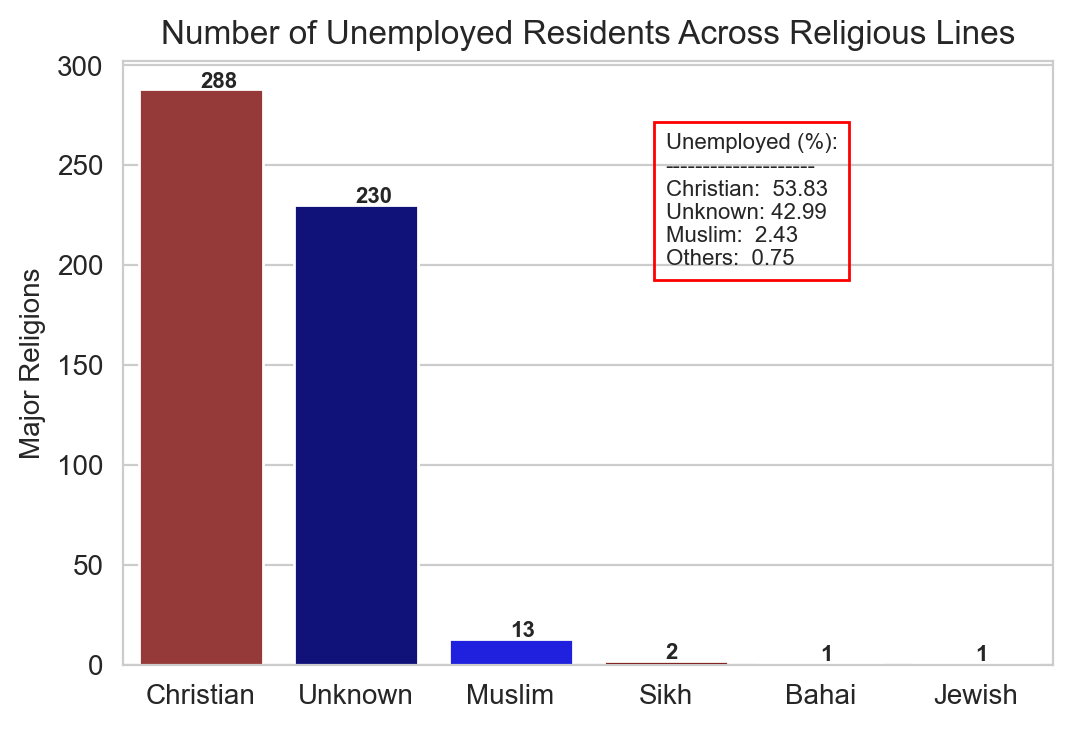

In [92]:
# set up grid layout for figure
sns.set_style(style='whitegrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(6, 4), dpi=200)

sns.barplot(x=unemp_per_religion.index,
            y=unemp_per_religion, 
            palette={'Christian': 'brown', 
                     'Unknown': 'darkblue',
                    'Muslim': 'blue',
                    'Sikh': 'darkred',
                    'Bahai': 'red',
                    'Jewish': 'red'})

for i in range(unemp_per_religion.shape[0]):
    plt.text(i, unemp_per_religion[i]+1, unemp_per_religion[i],
            fontweight='bold', size=8)

note = "Unemployed (%):\n" +\
"-"*20 + f"\nChristian: {100*unemp_per_religion['Christian']/unemp_per_religion.sum(): .2f}" +\
f"\nUnknown:{100 * unemp_per_religion['Unknown']/unemp_per_religion.sum(): .2f}" +\
f"\nMuslim: {100*unemp_per_religion['Muslim']/unemp_per_religion.sum(): .2f}" +\
f"\nOthers: {100 * (unemp_per_religion.loc[['Sikh', 'Bahai', 'Jewish']].sum())/unemp_per_religion.sum(): .2f}"

plt.text(3, 200, note,
        bbox={'facecolor':'none', 'edgecolor':'red'},
        size=8)

plt.title("Number of Unemployed Residents Across Religious Lines");

***FACT:***<br>
The number of unemployed residents (535) is quite small in comparison to the entire population (7581). However, it was observed that almost two-thirds of the unemployed population come from only five (out of twenty-four) age brackets namely:<br>
**30 to 34, 35 to 39, 40 to 44, 50 to 54, and 55 to 59**. <br>
And they each contributed at least ten percent to the number of unemployed residents.<br>
Also, there are **more unemployed females (65%) than males (35%)**.<br>
**54% of unemployed are christians, while only 4% come from other religions.**<br>
This also is in line with the overall population trend, given there are generally more females than males and more Christians than other religions.<br>

#### Unemployment Trend per Street

In [93]:
unemp_per_gender

F    349
M    186
Name: Gender, dtype: int64

#### Why are they unemployed?

In [94]:
actively_unemployed['Relationship to Head of House'].value_counts()

Head        333
Husband      45
Daughter     27
None         22
Lodger       20
Wife         15
Son          14
Partner      14
Visitor       3
Cousin        1
Name: Relationship to Head of House, dtype: int64

In [95]:
actively_unemployed['Religion'].value_counts()

None         216
Christian    140
Catholic      81
Methodist     40
Muslim        13
Sikh           2
Jewish         1
Undecided      1
Name: Religion, dtype: int64

In [96]:
census_df['Religion'].value_counts()

None         2623
Christian    1713
Catholic      794
Methodist     506
Muslim        127
Sikh           49
Jewish         35
Agnostic        5
Bahai           3
                3
Undecided       2
Baptist         2
Jedi            1
Private         1
Name: Religion, dtype: int64

In [97]:
# unemployed christians
261/3015

0.08656716417910448

In [98]:
# unemployed muslims
13/127

0.10236220472440945

C:\Users\welcome\AppData\Local\Temp/ipykernel_14228/2299413372.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  fem_ax.set(xticklabels=[60, 40, 20, 0, 20, 40, 60], xlabel='Head Count', ylabel='Age Bracket')


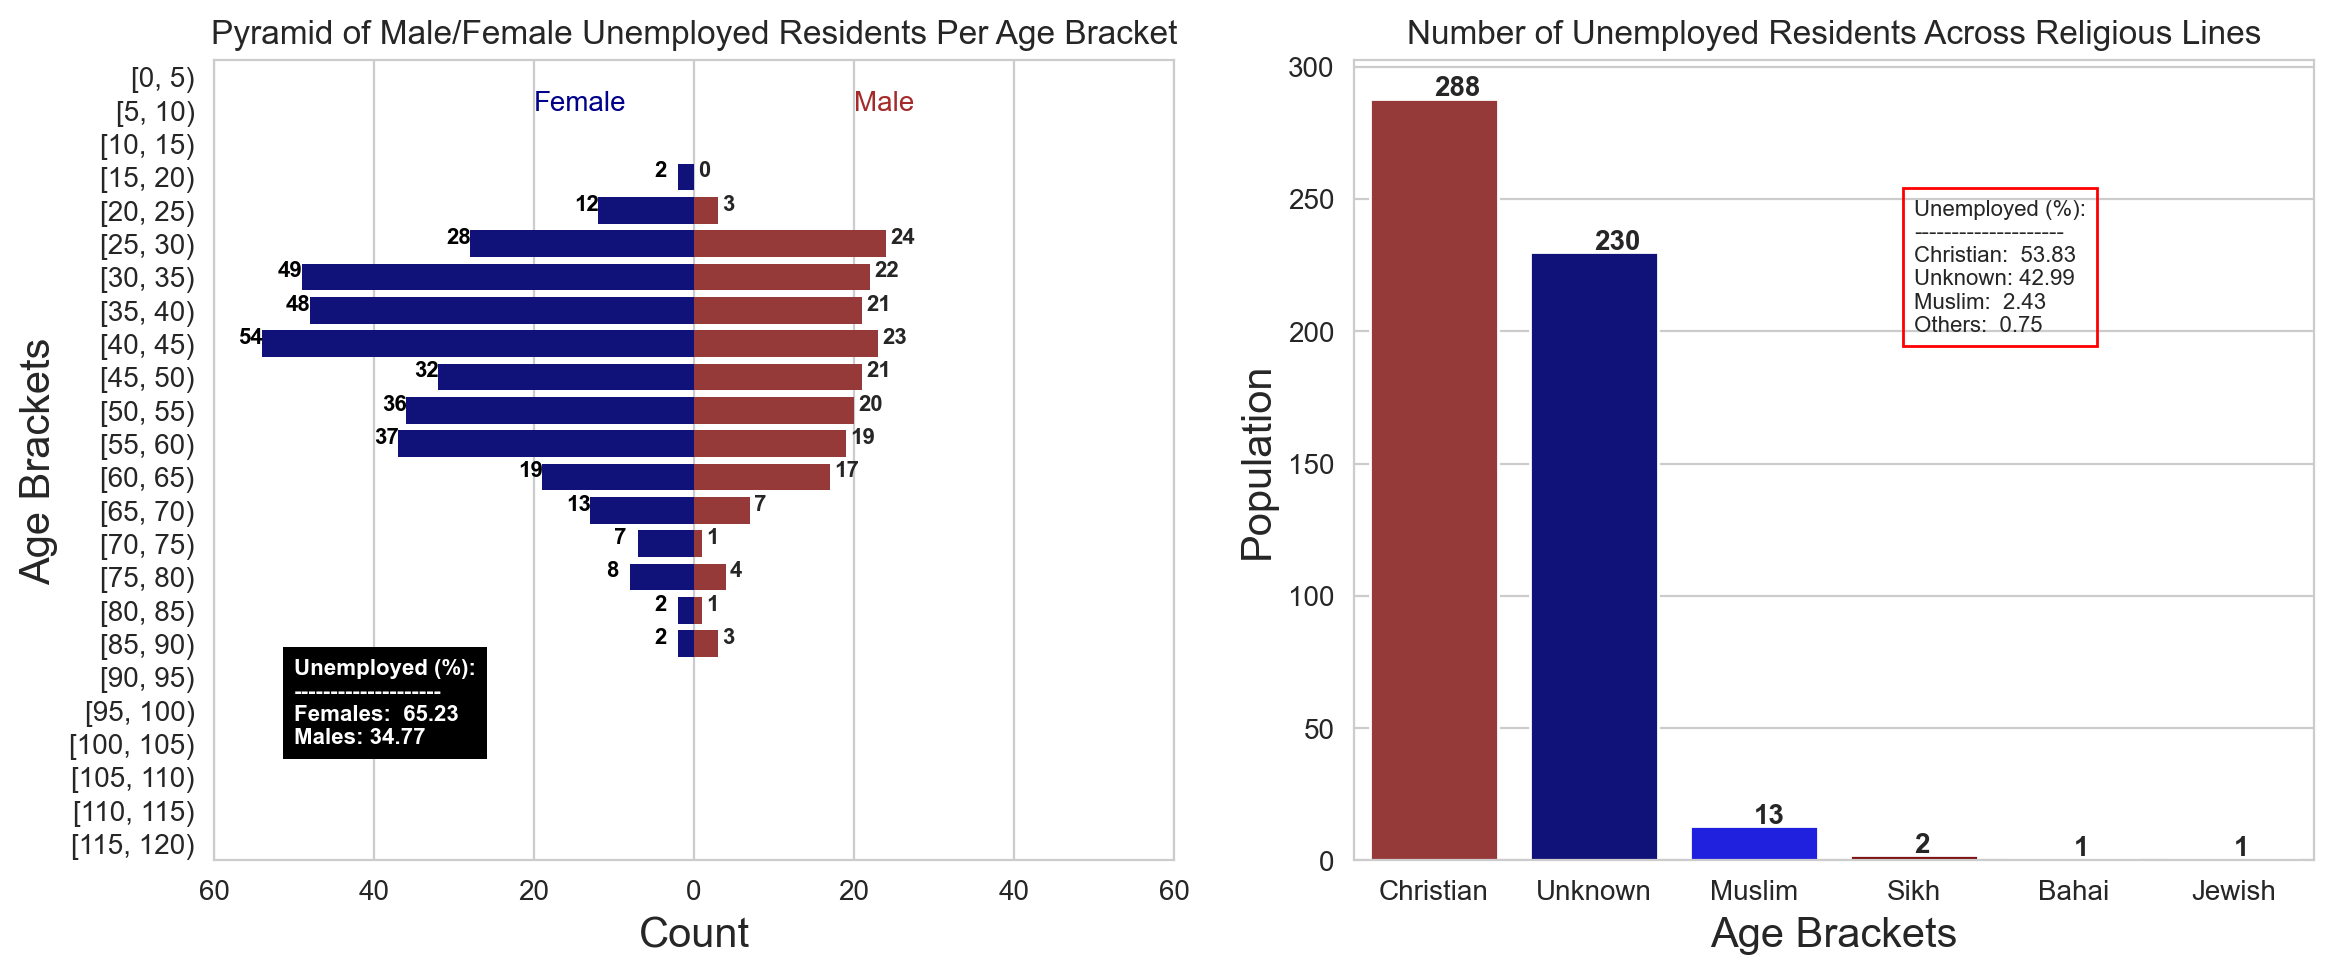

In [99]:
fig = plt.figure(figsize=(6, 4), dpi=200)
l, r = fig.add_axes([0, 0, 0.8, 1]), fig.add_axes([0.95, 0, 0.8, 1])

mal_ax = sns.barplot(y=unemp_male_age_distr.index, 
                     x=unemp_male_age_distr, 
                     color='brown',
                    label='Male',
                    lw=0,
                    ax=l)

fem_ax = sns.barplot(y=unemp_fem_age_distr.index, 
                     x=-1*unemp_fem_age_distr, 
                     color='darkblue',
                    label='Female',
                    lw=0,
                    ax=l)

sns.barplot(x=unemp_per_religion.index,
            y=unemp_per_religion, 
            palette={'Christian': 'brown', 
                     'Unknown': 'darkblue',
                    'Muslim': 'blue',
                    'Sikh': 'darkred',
                    'Bahai': 'red',
                    'Jewish': 'red'},
           ax=r)

for i in range(unemp_age_cls_freq.shape[0]):
    if unemp_male_age_distr[i] or unemp_fem_age_distr[i]:
        mal_ax.text(unemp_male_age_distr[i] + 0.5, i, unemp_male_age_distr[i],
                    fontweight='bold', size=8)
        fem_ax.text(-1*unemp_fem_age_distr[i]-3, i, unemp_fem_age_distr[i], color='black',
                    fontweight='bold', size=8)

for i in range(unemp_per_religion.shape[0]):
    r.text(i, unemp_per_religion[i]+1, unemp_per_religion[i],
            fontweight='bold', size=10)
    
fem_ax.set(xticklabels=[60, 40, 20, 0, 20, 40, 60], xlabel='Head Count', ylabel='Age Bracket')
fem_ax.set_yticklabels(fem_ax.get_yticklabels(), size=5)
mal_ax.text(20, 1, 'Male', color='brown')
fem_ax.text(-20, 1, 'Female', color='darkblue')

l.set_xlim(-60, 60)

l.set_title("Pyramid of Male/Female Unemployed Residents Per Age Bracket")
    
    
l.set_ylabel("Age Brackets", size=15)
l.set_xlabel("Count", size=15)
r.set_xlabel("Age Brackets", size=15)
r.set_ylabel("Population", size=15)

l.tick_params(labelsize=10)
r.tick_params(labelsize=10)

note = "Unemployed (%):\n" +\
"-"*20 + f"\nChristian: {100*unemp_per_religion['Christian']/unemp_per_religion.sum(): .2f}" +\
f"\nUnknown:{100 * unemp_per_religion['Unknown']/unemp_per_religion.sum(): .2f}" +\
f"\nMuslim: {100*unemp_per_religion['Muslim']/unemp_per_religion.sum(): .2f}" +\
f"\nOthers: {100 * (unemp_per_religion.loc[['Sikh', 'Bahai', 'Jewish']].sum())/unemp_per_religion.sum(): .2f}"

# plot summary
r.text(3, 200, note,
        bbox={'facecolor':'none', 'edgecolor':'red'},
        size=8)

r.set_title("Number of Unemployed Residents Across Religious Lines")

note = "Unemployed (%):\n" +\
"-"*20 + f"\nFemales: {100*unemp_per_gender['F']/unemp_per_gender.sum(): .2f}" +\
f"\nMales:{100 * unemp_per_gender['M']/unemp_per_gender.sum(): .2f}"

l.text(-50, 20, note,
        bbox={'facecolor':'black', 'edgecolor':'none'},
        size=8, weight='bold', color='white')

plt.show()
# plt.xticks(rotation=90);

In [100]:
fname = 'unemployment_trend.png'
cd.fig_writer(fname, fig)

'unemployment_trend.png'

___

## RELIGIOUS AFFILIATIONS

In [101]:
religion_freq = census_df['Major Religions'].value_counts()
religion_freq

Christian     3015
Unknown       2670
Ineligible    1677
Muslim         127
Sikh            49
Jewish          35
Agnostic         5
Bahai            3
Name: Major Religions, dtype: int64

In [102]:
all_religion_freq = census_df['Major Religions'].value_counts()
all_religion_freq

Christian     3015
Unknown       2670
Ineligible    1677
Muslim         127
Sikh            49
Jewish          35
Agnostic         5
Bahai            3
Name: Major Religions, dtype: int64

In [103]:
relig_perc = np.round(100 * religion_freq/religion_freq.sum(), 2)
relig_perc

Christian     39.77
Unknown       35.22
Ineligible    22.12
Muslim         1.68
Sikh           0.65
Jewish         0.46
Agnostic       0.07
Bahai          0.04
Name: Major Religions, dtype: float64

In [104]:
known_religion = census_df.loc[~census_df['Major Religions'].isin(['Unknown', 'Ineligible'])]
known_religion

House Number          Street First Name     Surname  Age  \
7                3  Simmons Meadow       Tina      Palmer  105   
8                4  Simmons Meadow     Jeremy      Sutton   73   
9                4  Simmons Meadow    Suzanne      Sutton   19   
13               5  Simmons Meadow     Julian    Marshall   57   
16               7  Simmons Meadow     Marcus      Hanson   88   
...            ...             ...        ...         ...  ...   
7557             1   Grant Commune        Joe   Greenwood   42   
7558             1   Grant Commune      Garry  Richardson   48   
7562             1     Adams Ranch       Emma        Cook   42   
7563             1     Adams Ranch     Samuel        Cook   43   
7570             1   Love Fortress      Aaron        Cook   54   

     Relationship to Head of House Marital Status Gender  \
7                             Head        Widowed      F   
8                             Head        Widowed      M   
9                    Granddaughter         Single      F   
13                            Head       Divorced      M   
16                            Head        Married      M   
...                            ...            ...    ...   
7557                        Lodger         Single      M   
7558                        Lodger         Single      M   
7562                          Head        Married      F   
7563                       Husband        Married      M   
7570                        Lodger         Single      M   

                          Occupation Infirmity   Religion            Address  \
7               Retired Risk analyst      None  Christian  3, Simmons Meadow   
8                 Retired Orthoptist      None  Christian  4, Simmons Meadow   
9                 University Student      None  Christian  4, Simmons Meadow   
13                 Barrister's clerk      None  Christian  5, Simmons Meadow   
16        Retired Arts administrator      None  Christian  7, Simmons Meadow   
...                              ...       ...        ...                ...   
7557           Accounting technician      None   Catholic   1, Grant Commune   
7558                      Unemployed      None  Christian   1, Grant Commune   
7562           Environmental manager      None  Methodist     1, Adams Ranch   
7563               Medical secretary      None  Methodist     1, Adams Ranch   
7570  Dance movement psychotherapist      None  Christian   1, Love Fortress   

      Is Retired  Is Unemployed  Is Student Major Religions  
7              1              0           0       Christian  
8              1              0           0       Christian  
9              0              0           1       Christian  
13             0              0           0       Christian  
16             1              0           0       Christian  
...          ...            ...         ...             ...  
7557           0              0           0       Christian  
7558           0              1           0       Christian  
7562           0              0           0       Christian  
7563           0              0           0       Christian  
7570           0              0           0       Christian  

[3234 rows x 16 columns]

In [105]:
known_relig_freq = known_religion['Major Religions'].value_counts()
known_relig_freq

Christian    3015
Muslim        127
Sikh           49
Jewish         35
Agnostic        5
Bahai           3
Name: Major Religions, dtype: int64

In [106]:
known_relig_perc = np.round(100 * known_relig_freq/known_relig_freq.sum(), 2)
known_relig_perc

Christian    93.23
Muslim        3.93
Sikh          1.52
Jewish        1.08
Agnostic      0.15
Bahai         0.09
Name: Major Religions, dtype: float64

#### Age Brackets per Religion

In [107]:
age_boundaries = list(range(0, census_df['Age'].max()+5, 5))

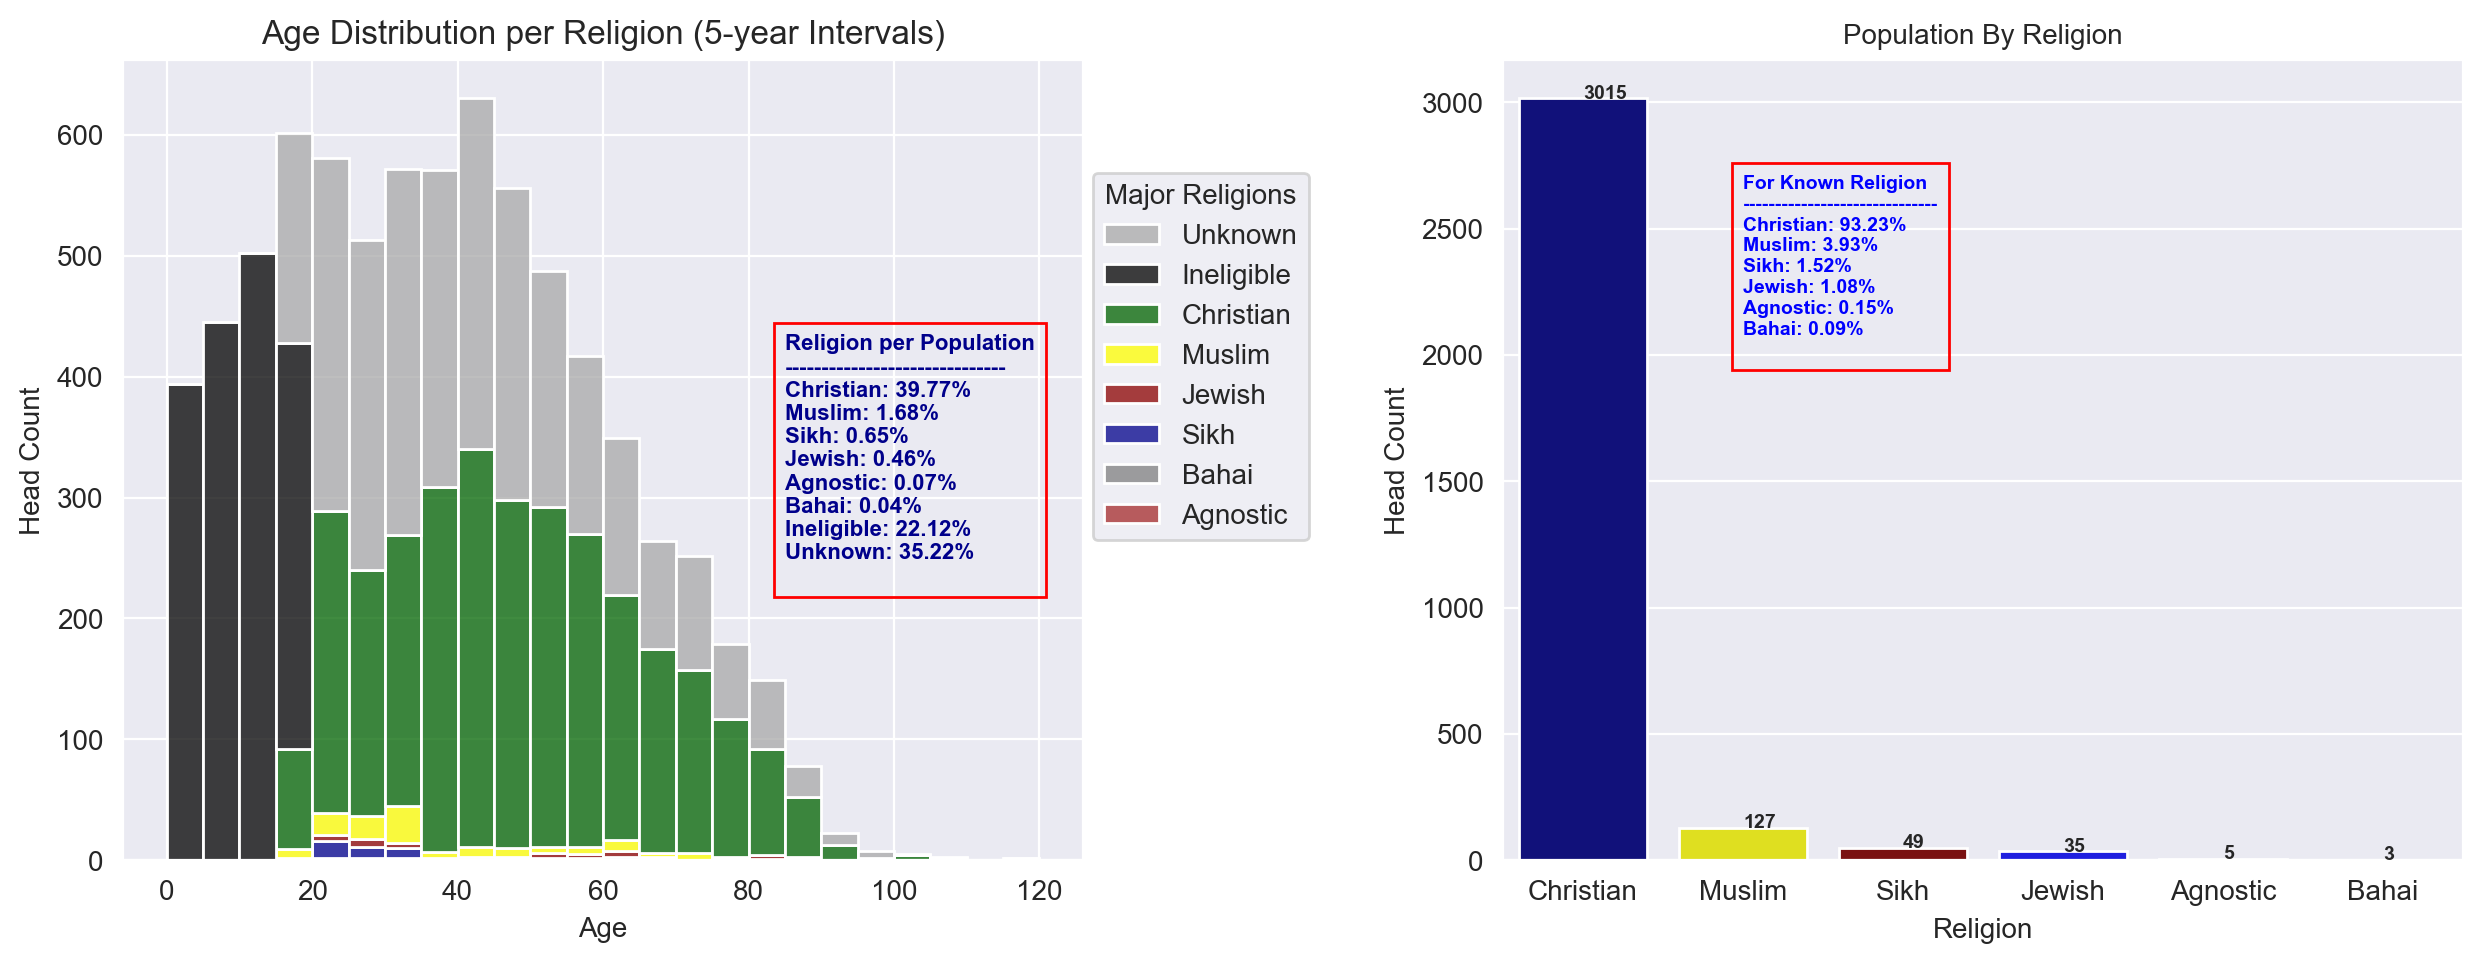

In [108]:
# set up grid layout for figure
sns.set_style(style='darkgrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(6, 4), dpi=200)
l, r = fig.add_axes([0, 0, 0.8, 1]), fig.add_axes([1.15, 0, 0.8, 1])

sns.histplot(data=census_df, x='Age', hue='Major Religions', ax=l,
             multiple='stack', bins=age_boundaries,
             palette={'Christian': 'darkgreen', 
                     'Agnostic': 'brown',
                     'Muslim': 'yellow',
                     'Sikh': 'darkblue',
                     'Bahai': 'grey',
                     'Jewish': 'darkred',
                    'Unknown':'darkgrey',
                    'Ineligible': 'black'})

sns.barplot(x=known_relig_freq.index,
            y=known_relig_freq, ax=r,
            palette={'Christian': 'darkblue', 
                     'Agnostic': 'brown',
                    'Muslim': 'yellow',
                    'Sikh': 'darkred',
                    'Bahai': 'red',
                    'Jewish': 'blue'})

sns.move_legend(l, [1.01, 0.4])

l.set_ylabel("Head Count")

note = "Religion per Population\n" +\
"-"*30 +\
f"\nChristian: {relig_perc['Christian']}%\n" +\
f"Muslim: {relig_perc['Muslim']}%\n" +\
f"Sikh: {relig_perc['Sikh']}%\n" +\
f"Jewish: {relig_perc['Jewish']}%\n" +\
f"Agnostic: {relig_perc['Agnostic']}%\n" +\
f"Bahai: {relig_perc['Bahai']}%\n" +\
f"Ineligible: {relig_perc['Ineligible']}%\n" +\
f"Unknown: {relig_perc['Unknown']}%\n"

l.text(85, 230, note, size=8, color='darkblue',
        bbox={'edgecolor':'red', 'facecolor':'none'}, 
       weight='bold')

note = "For Known Religion\n" +\
'-'*30 +\
f"\nChristian: {known_relig_perc['Christian']}%\n" +\
f"Muslim: {known_relig_perc['Muslim']}%\n" +\
f"Sikh: {known_relig_perc['Sikh']}%\n" +\
f"Jewish: {known_relig_perc['Jewish']}%\n" +\
f"Agnostic: {known_relig_perc['Agnostic']}%\n" +\
f"Bahai: {known_relig_perc['Bahai']}%\n"

r.text(1, 2000, note, size=7, weight='bold', color='blue',
        bbox={'facecolor':'none', 'edgecolor':'red'})

for i in range(known_relig_freq.shape[0]):
    r.text(i, known_relig_freq[i]+1, known_relig_freq[i], size=7, weight='bold')
    
r.set_ylabel("Head Count"), plt.xlabel("Religion")

r.set_title("Population By Religion", size=10)

l.set_title("Age Distribution per Religion (5-year Intervals)");

In [109]:
fname = 'religion.png'
cd.fig_writer(fname, fig)

'religion.png'

#### 1. Christianity

In [110]:
christians = census_df.loc[(census_df['Major Religions'] == 'Christian')]

In [111]:
chris_freq = christians['Religion'].value_counts()
chris_freq

Christian    1713
Catholic      794
Methodist     506
Baptist         2
Name: Religion, dtype: int64

In [112]:
chris_perc = np.round(100 * (chris_freq/census_df.shape[0]), 2)
chris_perc

Christian    22.60
Catholic     10.47
Methodist     6.67
Baptist       0.03
Name: Religion, dtype: float64

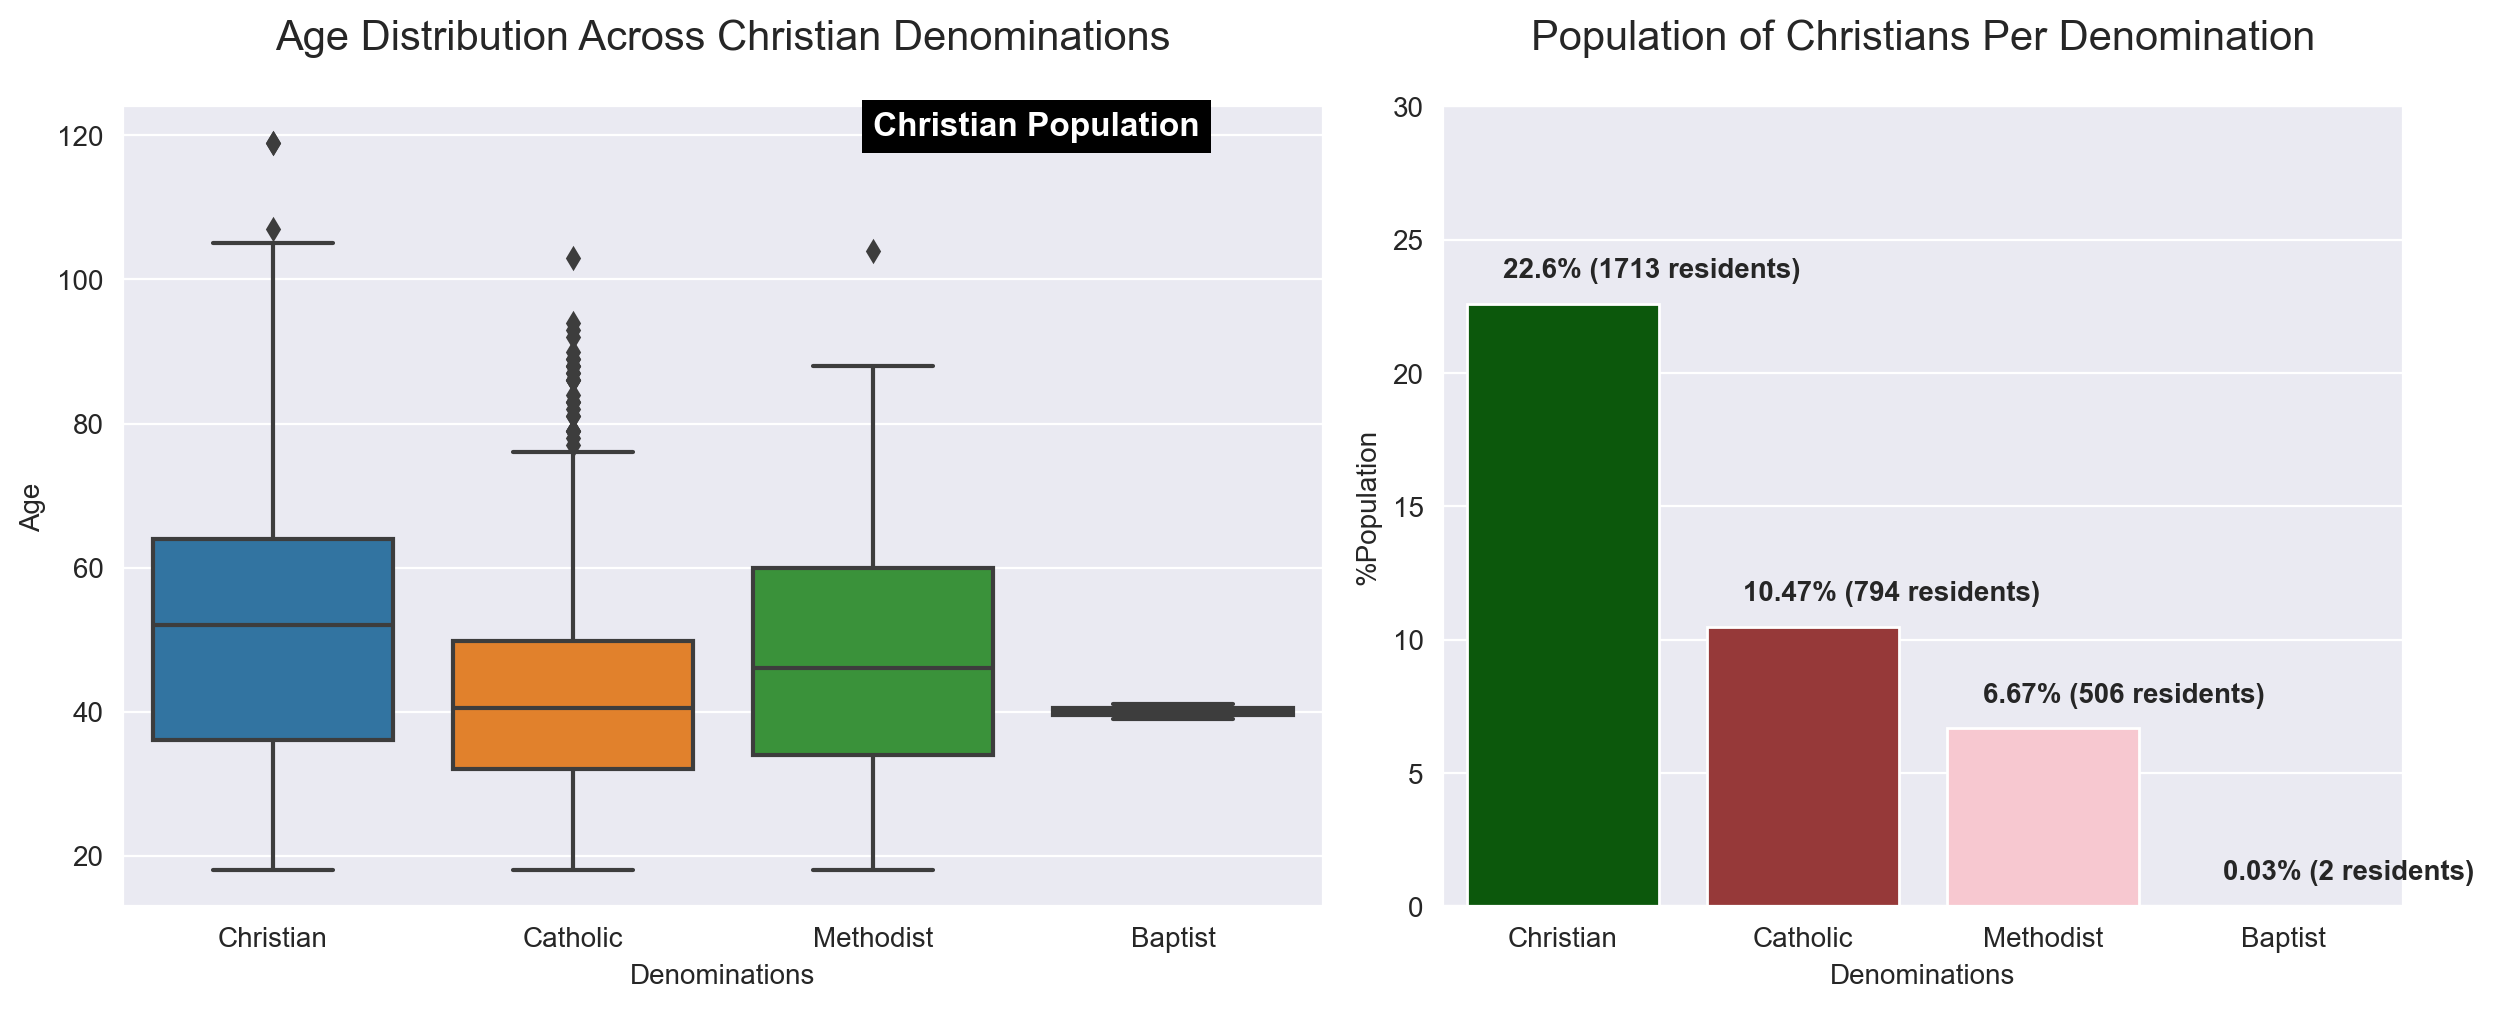

In [113]:
# set up grid layout for figure
sns.set_style(style='darkgrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(6, 4), dpi=200)
l, r = fig.add_axes([0, 0, 1, 1]), fig.add_axes([1.1, 0, 0.8, 1])

sns.barplot(x=chris_perc.index, y=chris_perc, ax=r,
             palette={'Christian': 'darkgreen', 
                     'Catholic': 'brown',
                     'Methodist': 'pink',
                     'Baptist':'black'})

sns.boxplot(data=christians, y='Age', x='Religion', ax=l,
           orient='v')

r.set_ylim(top=30)

note = 'Christian Population'
l.text(2, 120, note, size=12, weight='bold', color='white',
        bbox={'facecolor':'black', 'edgecolor':'none'})

for i, lab in enumerate(chris_perc.index):
    r.text(i-0.25, chris_perc[lab]+1, f"{chris_perc[lab]}% ({chris_freq[lab]} residents)", size=10, weight='bold')
    
l.set_ylabel("Age"), l.set_xlabel("Denominations")
r.set_ylabel("%Population"), r.set_xlabel("Denominations")

l.set_title("Age Distribution Across Christian Denominations", size=15, y=1.05)

r.set_title("Population of Christians Per Denomination", size=15, y=1.05);

In [114]:
fname = 'christians.png'
cd.fig_writer(fname, fig)

'christians.png'

#### Age Spread of Each Religion

In [115]:
christian = known_religion.loc[known_religion['Major Religions'] == 'Christian']
christian

House Number          Street First Name     Surname  Age  \
7                3  Simmons Meadow       Tina      Palmer  105   
8                4  Simmons Meadow     Jeremy      Sutton   73   
9                4  Simmons Meadow    Suzanne      Sutton   19   
13               5  Simmons Meadow     Julian    Marshall   57   
16               7  Simmons Meadow     Marcus      Hanson   88   
...            ...             ...        ...         ...  ...   
7557             1   Grant Commune        Joe   Greenwood   42   
7558             1   Grant Commune      Garry  Richardson   48   
7562             1     Adams Ranch       Emma        Cook   42   
7563             1     Adams Ranch     Samuel        Cook   43   
7570             1   Love Fortress      Aaron        Cook   54   

     Relationship to Head of House Marital Status Gender  \
7                             Head        Widowed      F   
8                             Head        Widowed      M   
9                    Granddaughter         Single      F   
13                            Head       Divorced      M   
16                            Head        Married      M   
...                            ...            ...    ...   
7557                        Lodger         Single      M   
7558                        Lodger         Single      M   
7562                          Head        Married      F   
7563                       Husband        Married      M   
7570                        Lodger         Single      M   

                          Occupation Infirmity   Religion            Address  \
7               Retired Risk analyst      None  Christian  3, Simmons Meadow   
8                 Retired Orthoptist      None  Christian  4, Simmons Meadow   
9                 University Student      None  Christian  4, Simmons Meadow   
13                 Barrister's clerk      None  Christian  5, Simmons Meadow   
16        Retired Arts administrator      None  Christian  7, Simmons Meadow   
...                              ...       ...        ...                ...   
7557           Accounting technician      None   Catholic   1, Grant Commune   
7558                      Unemployed      None  Christian   1, Grant Commune   
7562           Environmental manager      None  Methodist     1, Adams Ranch   
7563               Medical secretary      None  Methodist     1, Adams Ranch   
7570  Dance movement psychotherapist      None  Christian   1, Love Fortress   

      Is Retired  Is Unemployed  Is Student Major Religions  
7              1              0           0       Christian  
8              1              0           0       Christian  
9              0              0           1       Christian  
13             0              0           0       Christian  
16             1              0           0       Christian  
...          ...            ...         ...             ...  
7557           0              0           0       Christian  
7558           0              1           0       Christian  
7562           0              0           0       Christian  
7563           0              0           0       Christian  
7570           0              0           0       Christian  

[3015 rows x 16 columns]

In [116]:
christian_age_distr = pd.cut(christian['Age'], age_boundaries, retbins=True, include_lowest=True, right=False)[0].value_counts().sort_index()
christian_age_distr

[0, 5)          0
[5, 10)         0
[10, 15)        0
[15, 20)       83
[20, 25)      250
[25, 30)      203
[30, 35)      224
[35, 40)      302
[40, 45)      329
[45, 50)      288
[50, 55)      281
[55, 60)      259
[60, 65)      202
[65, 70)      169
[70, 75)      151
[75, 80)      114
[80, 85)       88
[85, 90)       49
[90, 95)       13
[95, 100)       2
[100, 105)      4
[105, 110)      2
[110, 115)      0
[115, 120)      2
Name: Age, dtype: int64

In [117]:
christian_age_perc = np.round(100 * christian_age_distr/christian_age_distr.sum(), 2)
christian_age_perc

[0, 5)         0.00
[5, 10)        0.00
[10, 15)       0.00
[15, 20)       2.75
[20, 25)       8.29
[25, 30)       6.73
[30, 35)       7.43
[35, 40)      10.02
[40, 45)      10.91
[45, 50)       9.55
[50, 55)       9.32
[55, 60)       8.59
[60, 65)       6.70
[65, 70)       5.61
[70, 75)       5.01
[75, 80)       3.78
[80, 85)       2.92
[85, 90)       1.63
[90, 95)       0.43
[95, 100)      0.07
[100, 105)     0.13
[105, 110)     0.07
[110, 115)     0.00
[115, 120)     0.07
Name: Age, dtype: float64

In [118]:
df = christian_age_perc.reset_index()
df.columns = df.columns.str.replace('Age', '%Head Count').str.replace('index', 'Age Bracket')
df

Age Bracket  %Head Count
0       [0, 5)         0.00
1      [5, 10)         0.00
2     [10, 15)         0.00
3     [15, 20)         2.75
4     [20, 25)         8.29
5     [25, 30)         6.73
6     [30, 35)         7.43
7     [35, 40)        10.02
8     [40, 45)        10.91
9     [45, 50)         9.55
10    [50, 55)         9.32
11    [55, 60)         8.59
12    [60, 65)         6.70
13    [65, 70)         5.61
14    [70, 75)         5.01
15    [75, 80)         3.78
16    [80, 85)         2.92
17    [85, 90)         1.63
18    [90, 95)         0.43
19   [95, 100)         0.07
20  [100, 105)         0.13
21  [105, 110)         0.07
22  [110, 115)         0.00
23  [115, 120)         0.07

In [119]:
print(f"{np.round(df.loc[:8, '%Head Count'].sum(), 2)}% of christians are below 45 years old.\n" +
f"While {np.round(df.loc[9:, '%Head Count'].sum(), 2)}% of christians are 45 years and above")

46.13% of christians are below 45 years old.
While 53.88% of christians are 45 years and above


In [120]:
age_18_44 = census_df.loc[census_df['Age'].between(18, 44)]
age_18_44

House Number              Street First Name     Surname  Age  \
0                1      Simmons Meadow     Andrea     Bradley   43   
1                1      Simmons Meadow      Peter     Bradley   44   
4                1      Simmons Meadow     Edward      Slater   25   
5                2      Simmons Meadow    Melanie     O'Brien   24   
9                4      Simmons Meadow    Suzanne      Sutton   19   
...            ...                 ...        ...         ...  ...   
7563             1         Adams Ranch     Samuel        Cook   43   
7567             1       Love Fortress       Dawn  O'Sullivan   42   
7571             1  Memorial Farmhouse   Samantha        Page   40   
7572             1  Memorial Farmhouse       Paul        Page   43   
7576             1         Newry Spire     Howard      Taylor   37   

     Relationship to Head of House Marital Status Gender  \
0                             Head        Married      F   
1                          Husband        Married      M   
4                           Lodger       Divorced      M   
5                             Head       Divorced      F   
9                    Granddaughter         Single      F   
...                            ...            ...    ...   
7563                       Husband        Married      M   
7567                          Head        Married      F   
7571                          Head        Married      F   
7572                       Husband        Married      M   
7576                          Head         Single      M   

                            Occupation            Infirmity   Religion  \
0                       Prison officer                 None       None   
1                       Futures trader                 None       None   
4           Further education lecturer                 None       None   
5     Production assistant, television                 None       None   
9                   University Student                 None  Christian   
...                                ...                  ...        ...   
7563                 Medical secretary                 None  Methodist   
7567               Pensions consultant                 None       None   
7571               Colour technologist  Physical Disability       None   
7572                     Lexicographer                 None       None   
7576                        Unemployed                 None       None   

                    Address  Is Retired  Is Unemployed  Is Student  \
0         1, Simmons Meadow           0              0           0   
1         1, Simmons Meadow           0              0           0   
4         1, Simmons Meadow           0              0           0   
5         2, Simmons Meadow           0              0           0   
9         4, Simmons Meadow           0              0           1   
...                     ...         ...            ...         ...   
7563         1, Adams Ranch           0              0           0   
7567       1, Love Fortress           0              0           0   
7571  1, Memorial Farmhouse           0              0           0   
7572  1, Memorial Farmhouse           0              0           0   
7576         1, Newry Spire           0              1           0   

     Major Religions  
0            Unknown  
1            Unknown  
4            Unknown  
5            Unknown  
9          Christian  
...              ...  
7563       Christian  
7567         Unknown  
7571         Unknown  
7572         Unknown  
7576         Unknown  

[3132 rows x 16 columns]

In [121]:
adults = census_df.loc[census_df['Age'] >= 18]
adults

House Number              Street First Name     Surname  Age  \
0                1      Simmons Meadow     Andrea     Bradley   43   
1                1      Simmons Meadow      Peter     Bradley   44   
4                1      Simmons Meadow     Edward      Slater   25   
5                2      Simmons Meadow    Melanie     O'Brien   24   
7                3      Simmons Meadow       Tina      Palmer  105   
...            ...                 ...        ...         ...  ...   
7568             1       Love Fortress      James  O'Sullivan   45   
7570             1       Love Fortress      Aaron        Cook   54   
7571             1  Memorial Farmhouse   Samantha        Page   40   
7572             1  Memorial Farmhouse       Paul        Page   43   
7576             1         Newry Spire     Howard      Taylor   37   

     Relationship to Head of House Marital Status Gender  \
0                             Head        Married      F   
1                          Husband        Married      M   
4                           Lodger       Divorced      M   
5                             Head       Divorced      F   
7                             Head        Widowed      F   
...                            ...            ...    ...   
7568                       Husband        Married      M   
7570                        Lodger         Single      M   
7571                          Head        Married      F   
7572                       Husband        Married      M   
7576                          Head         Single      M   

                            Occupation            Infirmity   Religion  \
0                       Prison officer                 None       None   
1                       Futures trader                 None       None   
4           Further education lecturer                 None       None   
5     Production assistant, television                 None       None   
7                 Retired Risk analyst                 None  Christian   
...                                ...                  ...        ...   
7568                        Unemployed                 None       None   
7570    Dance movement psychotherapist                 None  Christian   
7571               Colour technologist  Physical Disability       None   
7572                     Lexicographer                 None       None   
7576                        Unemployed                 None       None   

                    Address  Is Retired  Is Unemployed  Is Student  \
0         1, Simmons Meadow           0              0           0   
1         1, Simmons Meadow           0              0           0   
4         1, Simmons Meadow           0              0           0   
5         2, Simmons Meadow           0              0           0   
7         3, Simmons Meadow           1              0           0   
...                     ...         ...            ...         ...   
7568       1, Love Fortress           0              1           0   
7570       1, Love Fortress           0              0           0   
7571  1, Memorial Farmhouse           0              0           0   
7572  1, Memorial Farmhouse           0              0           0   
7576         1, Newry Spire           0              1           0   

     Major Religions  
0            Unknown  
1            Unknown  
4            Unknown  
5            Unknown  
7          Christian  
...              ...  
7568         Unknown  
7570       Christian  
7571         Unknown  
7572         Unknown  
7576         Unknown  

[5904 rows x 16 columns]

In [122]:
print(f"{np.round(100 * age_18_44.shape[0]/adults.shape[0], 2)}% of the entires population aged 18 years and above are between 18 and 44 years")

53.05% of the entires population aged 18 years and above are between 18 and 44 years


In [123]:
print(f"{np.round(100 * age_18_44.shape[0]/census_df.shape[0], 2)}% of the entire population are between 18 and 44 years old")

41.31% of the entire population are between 18 and 44 years old


In [124]:
non_christian = known_religion.loc[~known_religion.index.isin(christian.index)]
non_christian

House Number           Street First Name    Surname  Age  \
34               7    Morgan Avenue     Daniel      Patel   67   
35               7    Morgan Avenue      Rosie      Patel   66   
40              10    Morgan Avenue    Russell      Lyons   27   
43              12    Morgan Avenue      Brian      Miles   28   
81              36    Morgan Avenue       Jade  Alexander   32   
...            ...              ...        ...        ...  ...   
7534             1  Roberts Mansion    Charles  Macdonald   48   
7548             1       White Fort    Cameron     Hilton   30   
7550             1    Grant Commune    Deborah       Long   25   
7551             1    Grant Commune      Lewis       Long   28   
7553             1    Grant Commune    Barbara     Rogers   23   

     Relationship to Head of House Marital Status Gender  \
34                            Head        Married      M   
35                            Wife        Married      F   
40                            Head       Divorced      M   
43                            Head         Single      M   
81                            Head       Divorced      F   
...                            ...            ...    ...   
7534                       Husband        Married      M   
7548                       Visitor       Divorced      M   
7550                          Head        Married      F   
7551                       Husband        Married      M   
7553                        Lodger         Single      F   

                          Occupation Infirmity Religion             Address  \
34        Lecturer, higher education      None   Muslim    7, Morgan Avenue   
35       Health promotion specialist      None   Muslim    7, Morgan Avenue   
40               Early years teacher      None   Muslim   10, Morgan Avenue   
43                    Energy manager      None   Muslim   12, Morgan Avenue   
81          Educational psychologist      None   Muslim   36, Morgan Avenue   
...                              ...       ...      ...                 ...   
7534      Lecturer, higher education      None     Sikh  1, Roberts Mansion   
7548             Hospital pharmacist      None   Muslim       1, White Fort   
7550        Hotel Owner and Operator      None   Muslim    1, Grant Commune   
7551  Manufacturing systems engineer      None   Muslim    1, Grant Commune   
7553                Engineer, energy      None   Muslim    1, Grant Commune   

      Is Retired  Is Unemployed  Is Student Major Religions  
34             0              0           0          Muslim  
35             0              0           0          Muslim  
40             0              0           0          Muslim  
43             0              0           0          Muslim  
81             0              0           0          Muslim  
...          ...            ...         ...             ...  
7534           0              0           0            Sikh  
7548           0              0           0          Muslim  
7550           0              0           0          Muslim  
7551           0              0           0          Muslim  
7553           0              0           0          Muslim  

[219 rows x 16 columns]

In [125]:
non_christian_age_distr = pd.cut(non_christian['Age'], age_boundaries, retbins=True, include_lowest=True, right=False)[0].value_counts().sort_index()
non_christian_age_distr

[0, 5)         0
[5, 10)        0
[10, 15)       0
[15, 20)       9
[20, 25)      39
[25, 30)      37
[30, 35)      45
[35, 40)       7
[40, 45)      11
[45, 50)      10
[50, 55)      11
[55, 60)      11
[60, 65)      17
[65, 70)       6
[70, 75)       6
[75, 80)       3
[80, 85)       4
[85, 90)       3
[90, 95)       0
[95, 100)      0
[100, 105)     0
[105, 110)     0
[110, 115)     0
[115, 120)     0
Name: Age, dtype: int64

In [126]:
non_christian_age_perc  = np.round(100*non_christian_age_distr/non_christian_age_distr.sum(), 2)
non_christian_age_perc

[0, 5)         0.00
[5, 10)        0.00
[10, 15)       0.00
[15, 20)       4.11
[20, 25)      17.81
[25, 30)      16.89
[30, 35)      20.55
[35, 40)       3.20
[40, 45)       5.02
[45, 50)       4.57
[50, 55)       5.02
[55, 60)       5.02
[60, 65)       7.76
[65, 70)       2.74
[70, 75)       2.74
[75, 80)       1.37
[80, 85)       1.83
[85, 90)       1.37
[90, 95)       0.00
[95, 100)      0.00
[100, 105)     0.00
[105, 110)     0.00
[110, 115)     0.00
[115, 120)     0.00
Name: Age, dtype: float64

In [127]:
df = non_christian_age_perc.reset_index()
df.columns = df.columns.str.replace('Age', '%Head Count').str.replace('index', 'Age Bracket')
df

Age Bracket  %Head Count
0       [0, 5)         0.00
1      [5, 10)         0.00
2     [10, 15)         0.00
3     [15, 20)         4.11
4     [20, 25)        17.81
5     [25, 30)        16.89
6     [30, 35)        20.55
7     [35, 40)         3.20
8     [40, 45)         5.02
9     [45, 50)         4.57
10    [50, 55)         5.02
11    [55, 60)         5.02
12    [60, 65)         7.76
13    [65, 70)         2.74
14    [70, 75)         2.74
15    [75, 80)         1.37
16    [80, 85)         1.83
17    [85, 90)         1.37
18    [90, 95)         0.00
19   [95, 100)         0.00
20  [100, 105)         0.00
21  [105, 110)         0.00
22  [110, 115)         0.00
23  [115, 120)         0.00

In [128]:
df.loc[:8, '%Head Count'].sum()
print(f"{np.round(df.loc[:8, '%Head Count'].sum(), 2)}% of non-christians are below 45 years old.\n" +
f"While {np.round(df.loc[9:, '%Head Count'].sum(), 2)}% of non-christians are 45 years and above")

67.58% of non-christians are below 45 years old.
While 32.42% of non-christians are 45 years and above


C:\Users\welcome\AppData\Local\Temp/ipykernel_14228/2241749165.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  l.set_xticklabels(labels=label_list)


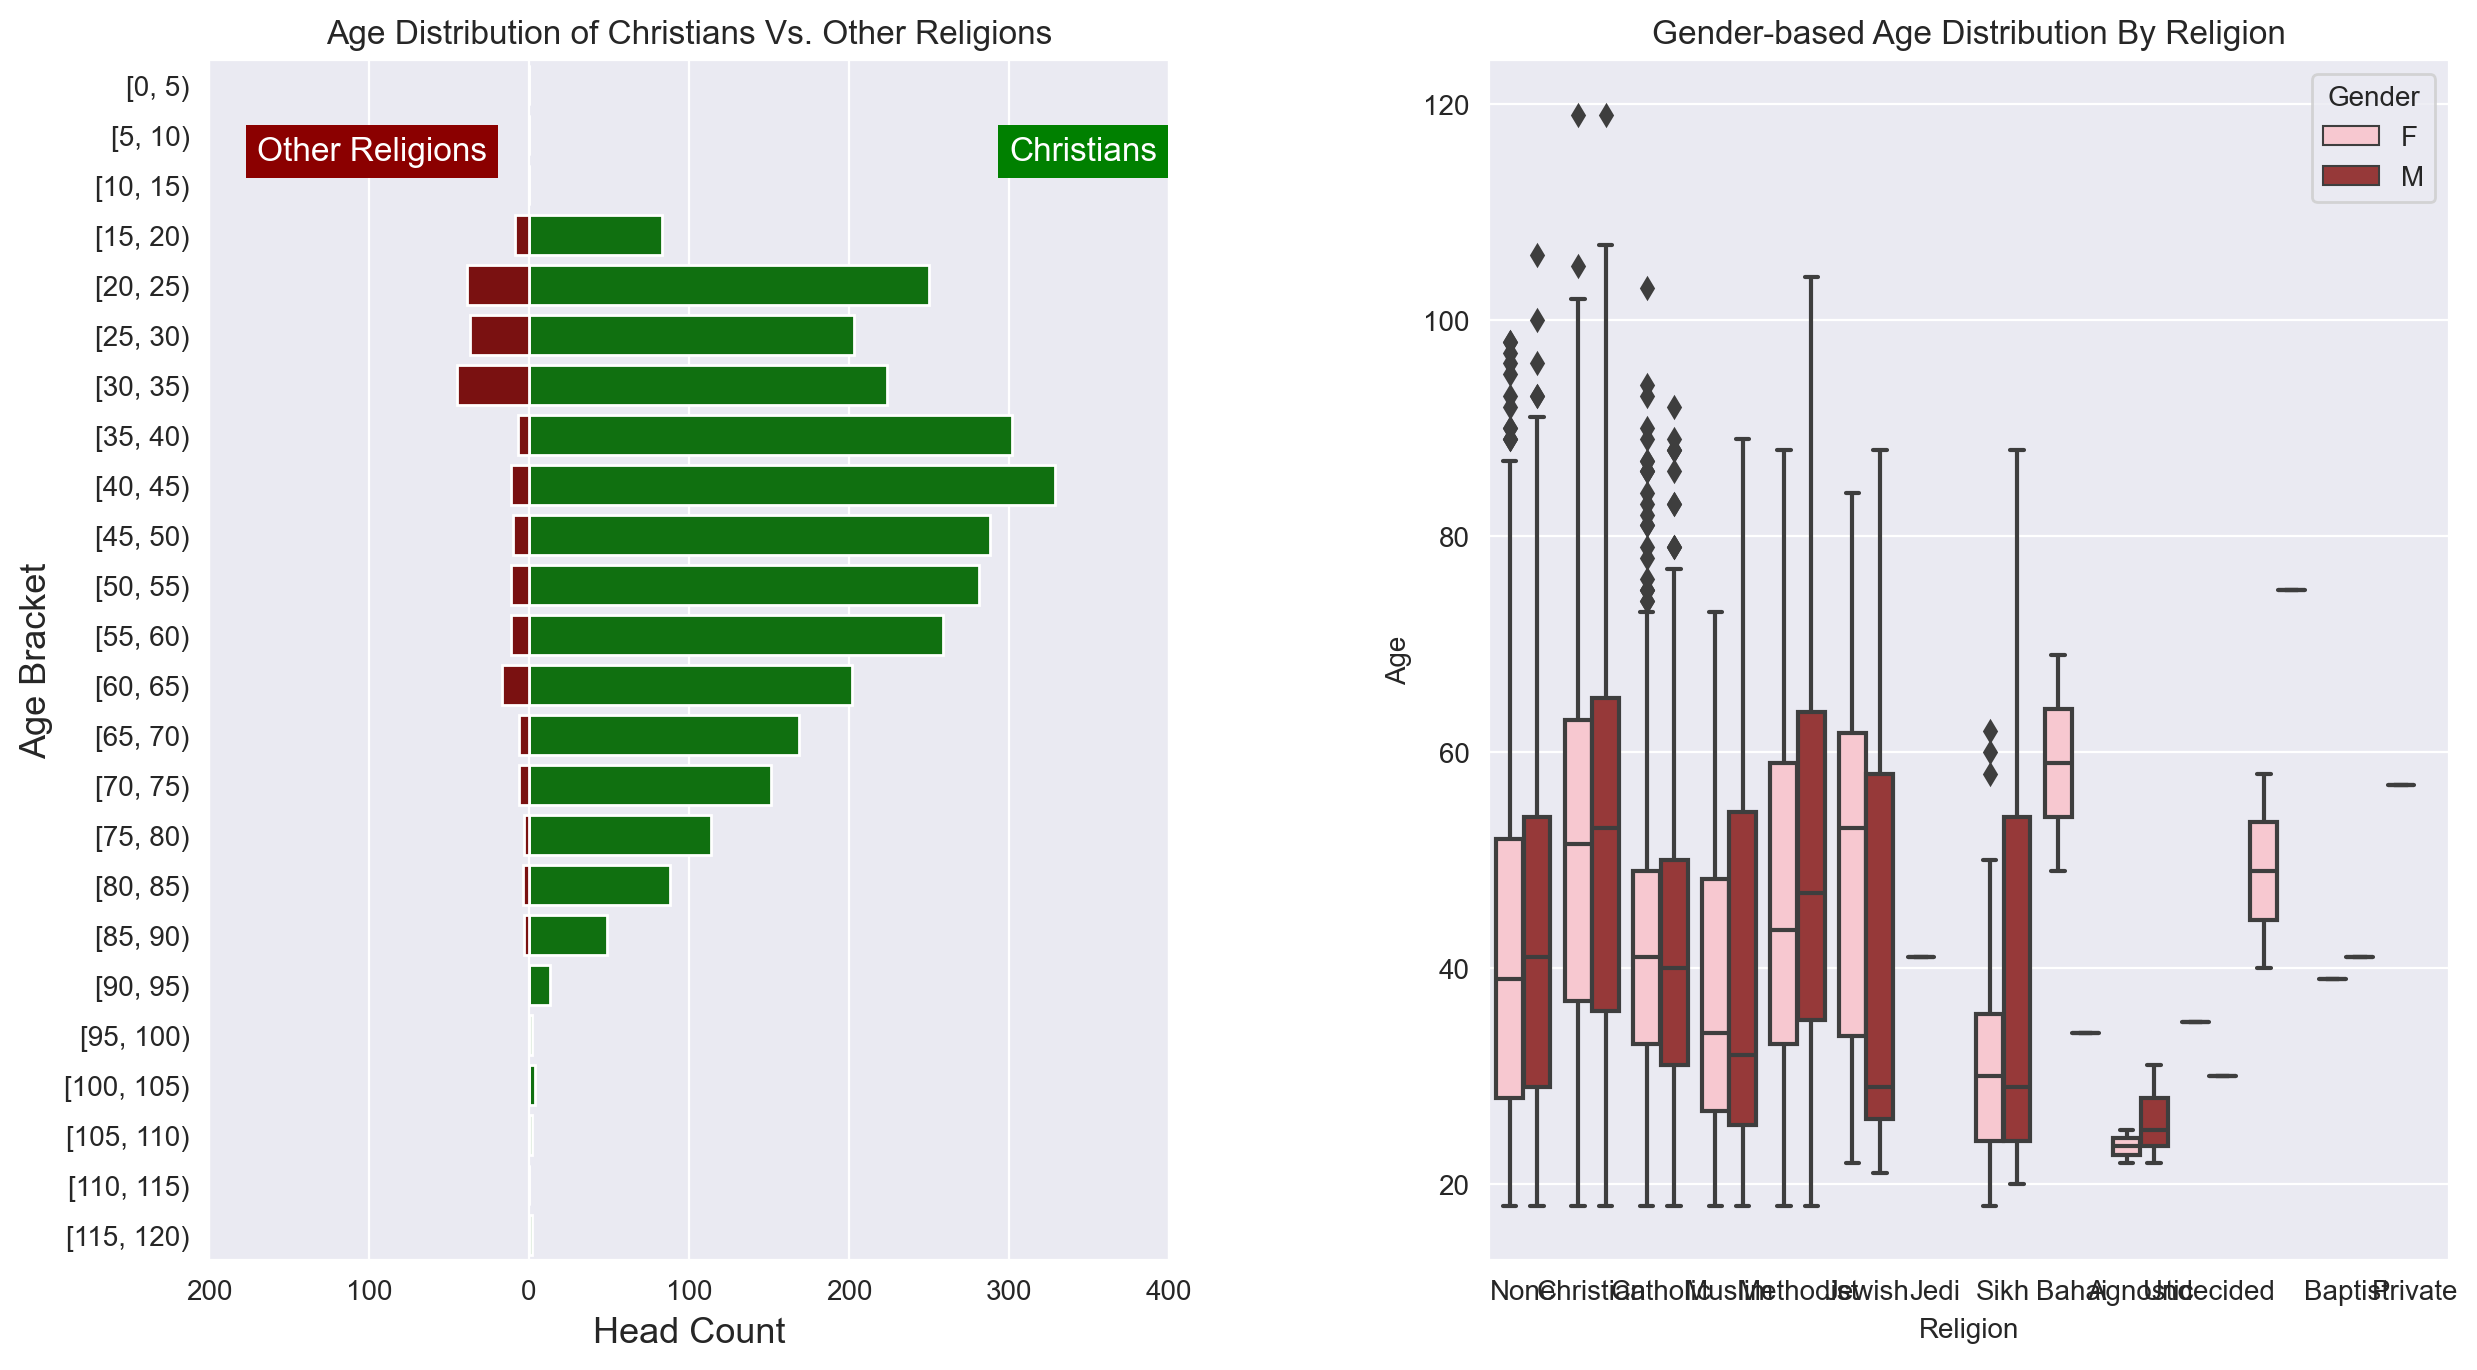

In [129]:
# set up grid layout for figure
sns.set_style(style='darkgrid')
# adjust dimensions of figure
fig = plt.figure(figsize=(8, 6), dpi=200)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])

ch_ax = sns.barplot(x=christian_age_distr, 
            y=christian_age_distr.index, 
            color='green', 
            ax=l)

nch_ax = sns.barplot(x=-1 * non_christian_age_distr,
            y=non_christian_age_distr.index, 
            color='darkred', 
            ax=l)

sns.boxplot(data=census_df, y='Age', x='Religion',
            hue='Gender',
           ax=r,
           palette={"F":'pink',
                   'M':'brown'})

nch_ax.set_xlim(-200, 400)

# for i in range(christian_age_distr.shape[0]):
#     if christian_age_distr[i]:
#         ch_ax.text(christian_age_distr[i]+1, i-0.4, christian_age_distr[i],
#                 size=8, weight='bold')
# for i in range(non_christian_age_distr.shape[0]):
#     if non_christian_age_distr[i]:
#         nch_ax.text(-1*non_christian_age_distr[i] - 1, i, non_christian_age_distr[i],
#                 size=8, weight='bold')
        
nch_ax.text(-170, 1.5, "Other Religions", color='white', size=12,
        bbox={'facecolor':'darkred', 'edgecolor':'none'})
ch_ax.text(300, 1.5, "Christians", color='white', size=12,
        bbox={'facecolor':'green', 'edgecolor':'none'})

label_list = [200, 100, 0, 100, 200, 300, 400]
l.set_xticklabels(labels=label_list)
# nch_ax.set_yticklabels(labels=nch_ax.get_yticklabels(), rotation=90)

l.set_xlabel("Head Count", size=13), l.set_ylabel("Age Bracket", size=13)
# nch_ax.set_xlabel("Head Count", size=13), nch_ax.set_xlabel("Age Bracket", size=13)

l.set_title("Age Distribution of Christians Vs. Other Religions")
r.set_title("Gender-based Age Distribution By Religion");

In [130]:
fname = 'compare_religions.png'
cd.fig_writer(fname, fig)

'compare_religions.png'

___

## RESIDENCY DETAILS:

#### Number of Streets

In [131]:
census_df['Street'].unique().shape[0]

105

#### Total Number of Houses

In [132]:
houses_in_the_city = census_df['Address'].unique().shape[0]
houses_in_the_city

2878

#### Number of Houses per resident
Houses per 1000 resident = (Total population/Total number of houses) * 1000<br>
Number of houses available per 1000 residents

In [133]:
print(f"There are {1000 * houses_in_the_city/census_df.shape[0]:.0f} houses for each 1000 resident")

There are 380 houses for each 1000 resident


#### House Occupancy Level
Occupancy level = Total Population/Number of Houses

In [134]:
occupancy_lvl = census_df.shape[0]/houses_in_the_city
print(f"Houses are occupied at rate of {occupancy_lvl:.0f} occupants per house")

Houses are occupied at rate of 3 occupants per house


#### Number of Occupants per House Address

In [135]:
house_occupancy = census_df['Address'].value_counts()
house_occupancy

27, Brightwater Drive    22
1, Nash Inn              21
5, Blue Spring           20
24, Wharf Wells          19
3, Brightwater Drive     13
                         ..
30, February Street       1
29, February Street       1
27, February Street       1
26, February Street       1
13, Regent Lane           1
Name: Address, Length: 2878, dtype: int64

In [136]:
one_occup_house = house_occupancy.loc[house_occupancy <= 1]
one_occup_house

29, Leonard Mews        1
25, Guild Lane          1
66, Bell Orchard        1
10, Worcester Street    1
67, Bell Orchard        1
                       ..
30, February Street     1
29, February Street     1
27, February Street     1
26, February Street     1
13, Regent Lane         1
Name: Address, Length: 796, dtype: int64

In [137]:
two_occup_house = house_occupancy.loc[house_occupancy <= 2]
two_occup_house

10, Leeds Avenue           2
59, James Views            2
30, Institution Harbors    2
41, Wharf Place            2
27, Institution Harbors    2
                          ..
30, February Street        1
29, February Street        1
27, February Street        1
26, February Street        1
13, Regent Lane            1
Name: Address, Length: 1671, dtype: int64

In [138]:
print(f"There {one_occup_house.shape[0]} houses having only one occupant.\n" +\
      f"{100 * one_occup_house.shape[0]/house_occupancy.shape[0]:.2f}% of total number of houses")

There 796 houses having only one occupant.
27.66% of total number of houses


In [139]:
print(f"There {two_occup_house.shape[0]} houses having only two occupants.\n" +\
      f"{100 * two_occup_house.shape[0]/house_occupancy.shape[0]:.2f}% of total number of houses")

There 1671 houses having only two occupants.
58.06% of total number of houses


In [140]:
two_occup_house = house_occupancy.loc[house_occupancy == 2]
two_occup_house

10, Leeds Avenue           2
59, James Views            2
30, Institution Harbors    2
41, Wharf Place            2
27, Institution Harbors    2
                          ..
5, Clementine Points       2
18, Cancerpath Drive       2
49, Spencer Avenue         2
5, Edwards Flat            2
4, Edwards Flat            2
Name: Address, Length: 875, dtype: int64

In [141]:
print(f"There {house_occupancy.shape[0] - one_occup_house.shape[0]} houses having only one occupant.\n" +\
      f"{100 * (1 - (one_occup_house.shape[0]/house_occupancy.shape[0])):.2f}% of total number of houses")

There 2082 houses having only one occupant.
72.34% of total number of houses


In [142]:
two_occup_house.sum()

1750

In [143]:
two_occup_house = house_occupancy.loc[house_occupancy == 2]
two_occup_house

10, Leeds Avenue           2
59, James Views            2
30, Institution Harbors    2
41, Wharf Place            2
27, Institution Harbors    2
                          ..
5, Clementine Points       2
18, Cancerpath Drive       2
49, Spencer Avenue         2
5, Edwards Flat            2
4, Edwards Flat            2
Name: Address, Length: 875, dtype: int64

In [144]:
house_occupancy.loc[house_occupancy == 3].sum()

1284

In [145]:
house_occupancy.loc[house_occupancy == 4].sum()

1676

In [146]:
house_occupancy.loc[house_occupancy == 5].sum()

1325

In [147]:
house_occupancy.loc[house_occupancy == 6].sum()

330

In [148]:
house_occupancy.loc[house_occupancy == 7].sum()

70

In [149]:
house_occupancy.loc[house_occupancy == 8].sum()

24

In [150]:
house_occupancy.loc[house_occupancy == 9].sum()

36

In [151]:
house_occupancy.loc[house_occupancy > 5 ].sum()

750

In [152]:
house_occupancy_freq = house_occupancy.value_counts().sort_index()
# house_occupancy_freq.columns = house_occupancy_freq.columns.str.replace("Address", "House Count (%)").str.replace("index", "Occupant Count")
house_occupancy_freq

1     796
2     875
3     428
4     419
5     265
6      55
7      10
8       3
9       4
10      9
11      3
12      6
13      1
19      1
20      1
21      1
22      1
Name: Address, dtype: int64

In [153]:
dd = house_occupancy_freq.loc[house_occupancy_freq.index > 5] * np.array(house_occupancy_freq.loc[house_occupancy_freq.index > 5].index)
dd.sum()

750

In [154]:
house_occupancy.loc[house_occupancy == 2]

10, Leeds Avenue           2
59, James Views            2
30, Institution Harbors    2
41, Wharf Place            2
27, Institution Harbors    2
                          ..
5, Clementine Points       2
18, Cancerpath Drive       2
49, Spencer Avenue         2
5, Edwards Flat            2
4, Edwards Flat            2
Name: Address, Length: 875, dtype: int64

In [155]:
census_df.loc[census_df['Address'].isin(house_occupancy.loc[house_occupancy == 2].index)]

House Number          Street First Name  Surname  Age  \
5                2  Simmons Meadow    Melanie  O'Brien   24   
6                2  Simmons Meadow       Lucy  O'Brien    3   
14               6  Simmons Meadow   Beverley    Jones   30   
15               6  Simmons Meadow     Bethan    Jones    2   
16               7  Simmons Meadow     Marcus   Hanson   88   
...            ...             ...        ...      ...  ...   
7363            12    Chester Lane   Mohammed     Webb   84   
7373            16    Chester Lane   Danielle   Stokes   51   
7374            16    Chester Lane      Roger    Smith   35   
7413            28    Chester Lane       Lynn   Miller   30   
7414            28    Chester Lane      Terry   Miller   36   

     Relationship to Head of House Marital Status Gender  \
5                             Head       Divorced      F   
6                         Daughter     Ineligible      F   
14                            Head       Divorced      F   
15                        Daughter     Ineligible      F   
16                            Head        Married      M   
...                            ...            ...    ...   
7363                       Husband        Married      M   
7373                          Head       Divorced      F   
7374                          None         Single      M   
7413                          Head        Married      F   
7414                       Husband        Married      M   

                            Occupation Infirmity   Religion  \
5     Production assistant, television      None       None   
6                                Child      None        NaN   
14                        Nurse, adult      None       None   
15                               Child      None        NaN   
16          Retired Arts administrator      None  Christian   
...                                ...       ...        ...   
7363     Retired Journalist, newspaper      None       None   
7373       Information systems manager      None  Christian   
7374                     Herpetologist      None   Catholic   
7413     Telecommunications researcher      None  Methodist   
7414                 Therapist, sports      None  Methodist   

                Address  Is Retired  Is Unemployed  Is Student Major Religions  
5     2, Simmons Meadow           0              0           0         Unknown  
6     2, Simmons Meadow           0              0           0      Ineligible  
14    6, Simmons Meadow           0              0           0         Unknown  
15    6, Simmons Meadow           0              0           0      Ineligible  
16    7, Simmons Meadow           1              0           0       Christian  
...                 ...         ...            ...         ...             ...  
7363   12, Chester Lane           1              0           0         Unknown  
7373   16, Chester Lane           0              0           0       Christian  
7374   16, Chester Lane           0              0           0       Christian  
7413   28, Chester Lane           0              0           0       Christian  
7414   28, Chester Lane           0              0           0       Christian  

[1750 rows x 16 columns]

In [156]:
house_occupancy_perc = np.round(100 * house_occupancy_freq/house_occupancy_freq.sum(), 2)#.reset_index()
# house_occupancy_perc.columns = house_occupancy_perc.columns.str.replace("Address", "House Count (%)").str.replace("index", "Occupant Count")
house_occupancy_perc

1     27.66
2     30.40
3     14.87
4     14.56
5      9.21
6      1.91
7      0.35
8      0.10
9      0.14
10     0.31
11     0.10
12     0.21
13     0.03
19     0.03
20     0.03
21     0.03
22     0.03
Name: Address, dtype: float64

In [157]:
above_5_perc = house_occupancy_perc.loc[house_occupancy_perc > 5]
above_5_perc

1    27.66
2    30.40
3    14.87
4    14.56
5     9.21
Name: Address, dtype: float64

In [158]:
below_6_perc = house_occupancy_perc.loc[~house_occupancy_perc.index.isin(above_5_perc.index)]
below_6_perc

6     1.91
7     0.35
8     0.10
9     0.14
10    0.31
11    0.10
12    0.21
13    0.03
19    0.03
20    0.03
21    0.03
22    0.03
Name: Address, dtype: float64

Text(0.5, 1.05, 'Percentage Number of Houses per Occupancy Level')

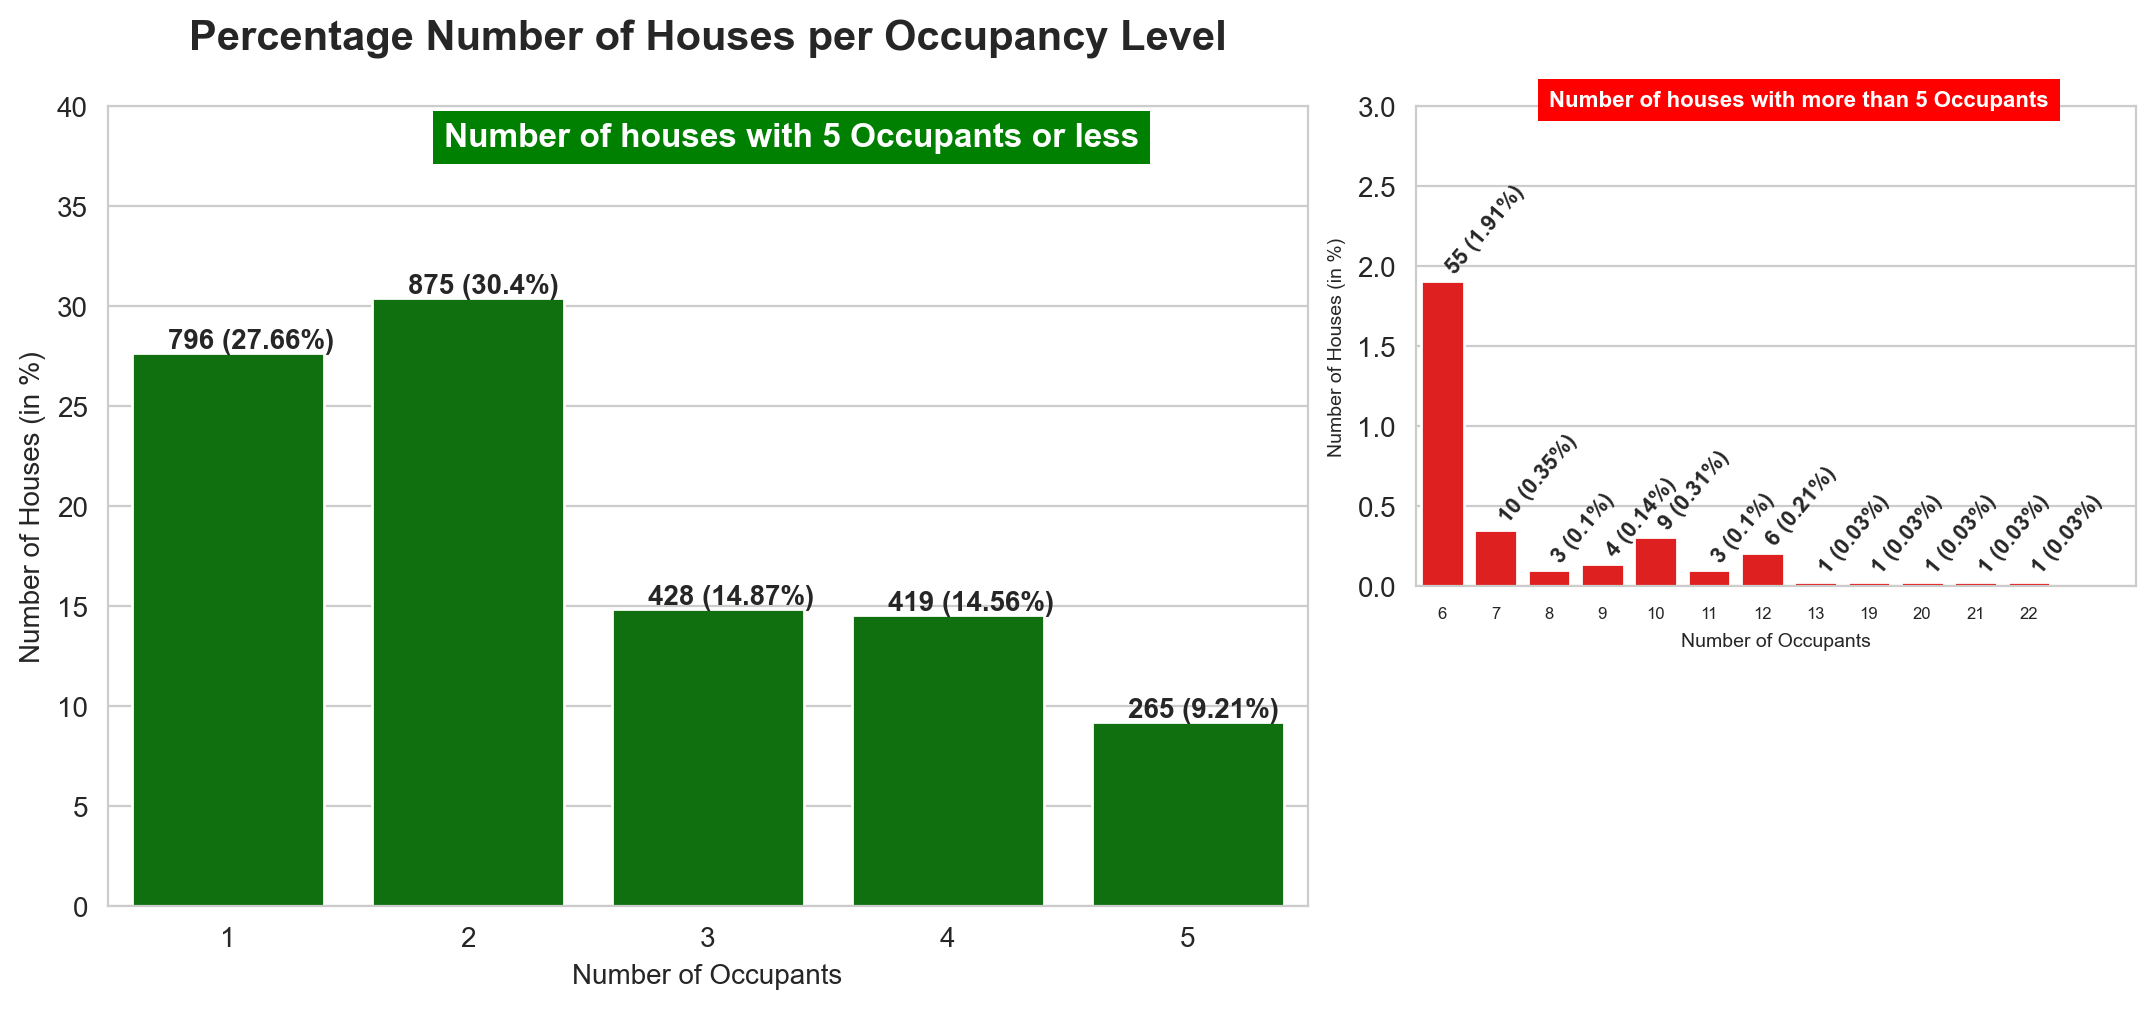

In [159]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(6, 4), dpi=200)
ax1, zoomed = fig.add_axes([0, 0, 1, 1]), fig.add_axes([1.09, 0.4, 0.6, 0.6])

abax = sns.barplot(x=above_5_perc.index, y=above_5_perc,
           color='green', ax=ax1)

beax = sns.barplot(x=below_6_perc.index, y=below_6_perc,
           color='red', ax=zoomed)

zoomed.set_xticklabels(zoomed.get_xticklabels(), size=6)

for i, lab in enumerate(above_5_perc.index):
    ax1.text(i-0.25, above_5_perc[lab]+0.25, f"{house_occupancy_freq[lab]} ({above_5_perc[lab]}%)",
            size=10, weight='bold')

for i, lab in enumerate(below_6_perc.index):
    zoomed.text(i, below_6_perc[lab]+0.05, f"{house_occupancy_freq[lab]} ({below_6_perc[lab]}%)",
            size=8, rotation=50, weight='bold')

ax1.set_ylabel("Number of Houses (in %)"), ax1.set_xlabel("Number of Occupants")
zoomed.set_ylabel("Number of Houses (in %)", size=7), zoomed.set_xlabel("Number of Occupants", size=7)

zoomed.text(2, 3, "Number of houses with more than 5 Occupants", color='white', size=8,
           bbox={'edgecolor':'none', 'facecolor':'red'},
           weight='bold')

ax1.text(0.9, 38, "Number of houses with 5 Occupants or less", color='white', size=12,
           bbox={'edgecolor':'none', 'facecolor':'green'},
           weight='bold')
zoomed.set_ylim(top=3), zoomed.set_xlim(right=13)
ax1.set_ylim(top=40)

ax1.set_title("Percentage Number of Houses per Occupancy Level", weight='bold', 
              y=1.05, size=15)

In [160]:
fname = 'percentage_occupancy_level.png'
cd.fig_writer(fname, fig)

'percentage_occupancy_level.png'

#### Distribution of the number of people per house address

In [161]:
q1, q3 = np.int_(np.percentile(house_occupancy, [25, 75]))
iqr = q3 - q1
print(f"Q1: {q1}, Q3: {q3}\nIQR: {iqr}")

Q1: 1, Q3: 4
IQR: 3


In [162]:
iqr_coeff = iqr * 1.5
low_lim, upp_lim = np.int_([q1 - iqr_coeff, q3 + iqr_coeff])
print(low_lim, upp_lim)

-3 8


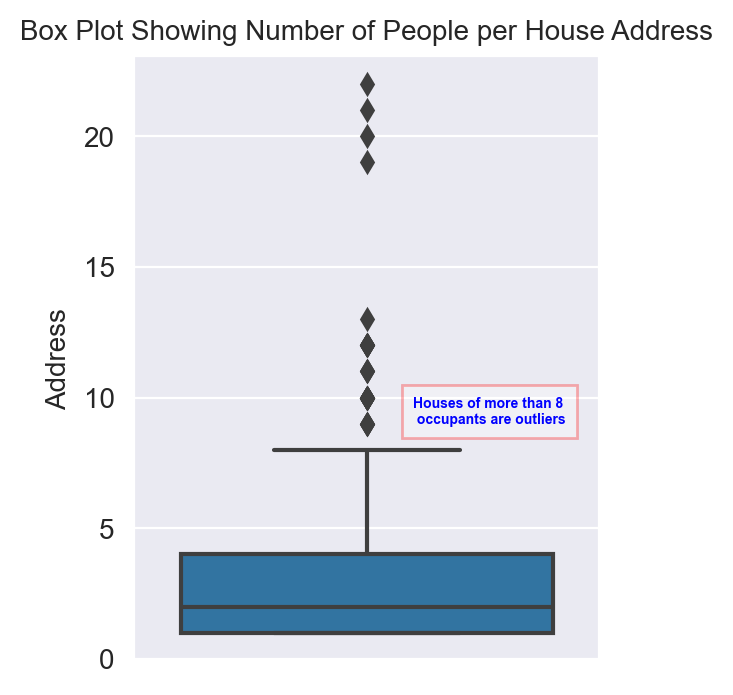

In [163]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(3, 4), dpi=200)

bplot = sns.boxplot(y=house_occupancy)#, x=house_occupancy)
bplot.set_title("Box Plot Showing Number of People per House Address", fontsize=10)

bplot.text(0.1, 9, f"Houses of more than {upp_lim}\n occupants are outliers",
           fontsize=5, fontweight='bold', color='blue',
            bbox={'edgecolor':'red', 'facecolor': 'white', 'alpha': 0.3});

Based on the above statistics and box plot, ***normally 8 or less occupants should live in a house.***<br>
Therefore, I shall be using this figure as my threshold to determine where a house is over-populated.

In [164]:
overpopulated_houses = house_occupancy.loc[house_occupancy > 8]
overpopulated_houses

27, Brightwater Drive    22
1, Nash Inn              21
5, Blue Spring           20
24, Wharf Wells          19
3, Brightwater Drive     13
12, Wharf Wells          12
31, Brightwater Drive    12
4, Wharf Wells           12
25, Brightwater Drive    12
1, Roberts Mansion       12
1, Grant Commune         12
2, Blue Spring           11
33, Wharf Wells          11
13, Brightwater Drive    11
3, Blue Spring           10
14, Brightwater Drive    10
18, Wharf Wells          10
24, Brightwater Drive    10
38, Wharf Wells          10
12, Brightwater Drive    10
32, Wharf Wells          10
35, Wharf Wells          10
1, July Factory          10
47, Wharf Wells           9
6, Brightwater Drive      9
8, Wharf Wells            9
3, Wharf Wells            9
Name: Address, dtype: int64

In [165]:
normal_occup_lvl = house_occupancy.loc[~house_occupancy.index.isin(overpopulated_houses.index)]
normal_occup_lvl

10, Brightwater Drive    8
9, Wharf Wells           8
35, Brightwater Drive    8
22, Wharf Wells          7
21, Wharf Wells          7
                        ..
30, February Street      1
29, February Street      1
27, February Street      1
26, February Street      1
13, Regent Lane          1
Name: Address, Length: 2851, dtype: int64

In [166]:
overpopulated_houses.shape[0], normal_occup_lvl.shape[0]

(27, 2851)

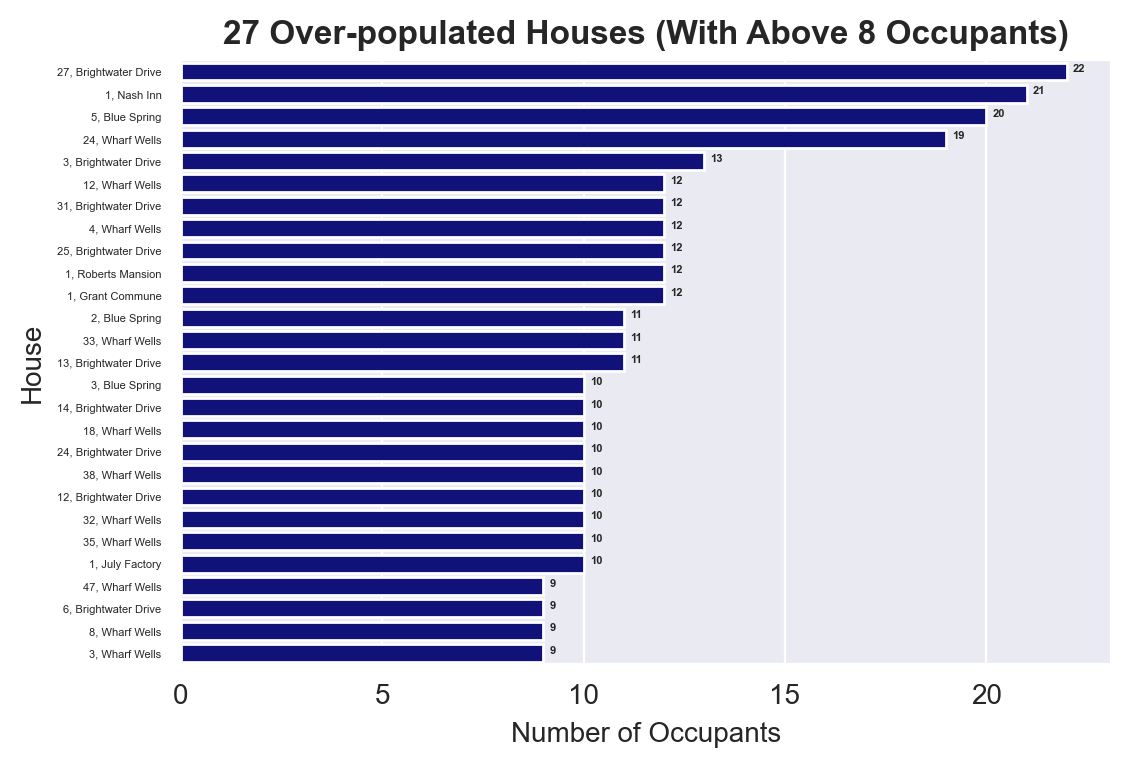

In [167]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(6, 4), dpi=200)

outl = sns.barplot(x=overpopulated_houses, y=overpopulated_houses.index, color='darkblue')
outl.set_title(f"{overpopulated_houses.shape[0]} Over-populated Houses (With Above 8 Occupants)", 
               fontsize=12, fontweight='bold')

outl.set_yticklabels(outl.get_yticklabels(), fontsize=4)
outl.set_xlabel("Number of Occupants"), outl.set_ylabel("House")

for i in range(overpopulated_houses.shape[0]):
    outl.text(overpopulated_houses[i]+0.15, i, overpopulated_houses[i], fontweight='bold',
             fontsize=4);

#### Median Number of Occupants per House Address

In [168]:
median_occup = np.round(house_occupancy.median(), decimals=0)
print("The median number of people per house is {:.0f}".format(median_occup))

The median number of people per house is 2


#### Average Number of Occupants per House Address

In [169]:
average_occup = np.round(house_occupancy.mean(), 0)
print("The Average number of people living in a house is {:.0f}".format(average_occup))

The Average number of people living in a house is 3


#### Number of houses per Street

In [170]:
# remove duplicate addresses - gives us an of instance unique addresses
# drop the address column
# count the house numbers
street_housing = census_df[['Street', 'House Number', 'Address']].drop_duplicates(subset=['Address']).drop(['Address'], axis=1).groupby(by=['Street']).count().sort_values(by=['House Number', 'Street'], ascending=[False, False])
street_housing.columns = street_housing.columns.astype(sns.utils.np.str_).str.replace('House Number', 'Number of Houses')
street_housing

Number of Houses
Street                               
James Views                       150
Watson Throughway                 130
Bell Orchard                      126
Institution Harbors                94
Aethelstan Prairie                 92
...                               ...
Grant Commune                       1
Ellis Farmhouse                     1
Cannon Ranch                        1
Atholl Institute                    1
Adams Ranch                         1

[105 rows x 1 columns]

In [171]:
# Top fifteen streets with the highest number of houses
top_15 = street_housing.iloc[:15].reset_index()
top_15

Street  Number of Houses
0           James Views               150
1     Watson Throughway               130
2          Bell Orchard               126
3   Institution Harbors                94
4    Aethelstan Prairie                92
5          Smith Manors                70
6       Leisure Squares                64
7          Leeds Avenue                61
8     St.Matthew Avenue                60
9            Green Wall                60
10    Eagleweave Street                59
11         Belle Center                59
12         Wright Brook                58
13        Morgan Avenue                56
14          Brooks Road                55

In [172]:
# Top ten streets with the least number of houses
least_15 = street_housing.loc[street_housing['Number of Houses'].between(1, 10)].tail(20).reset_index()
least_15

Street  Number of Houses
0        Bishop Avenue                 5
1         Tegid Street                 4
2     Shillingcut Lane                 4
3       Parkes Gardens                 4
4        Dockers Fords                 4
5           White Fort                 1
6      Vulture Mansion                 1
7      Roberts Mansion                 1
8       Pillar Stables                 1
9          Newry Spire                 1
10            Nash Inn                 1
11  Memorial Farmhouse                 1
12       Love Fortress                 1
13  Lightning Windmill                 1
14        July Factory                 1
15       Grant Commune                 1
16     Ellis Farmhouse                 1
17        Cannon Ranch                 1
18    Atholl Institute                 1
19         Adams Ranch                 1

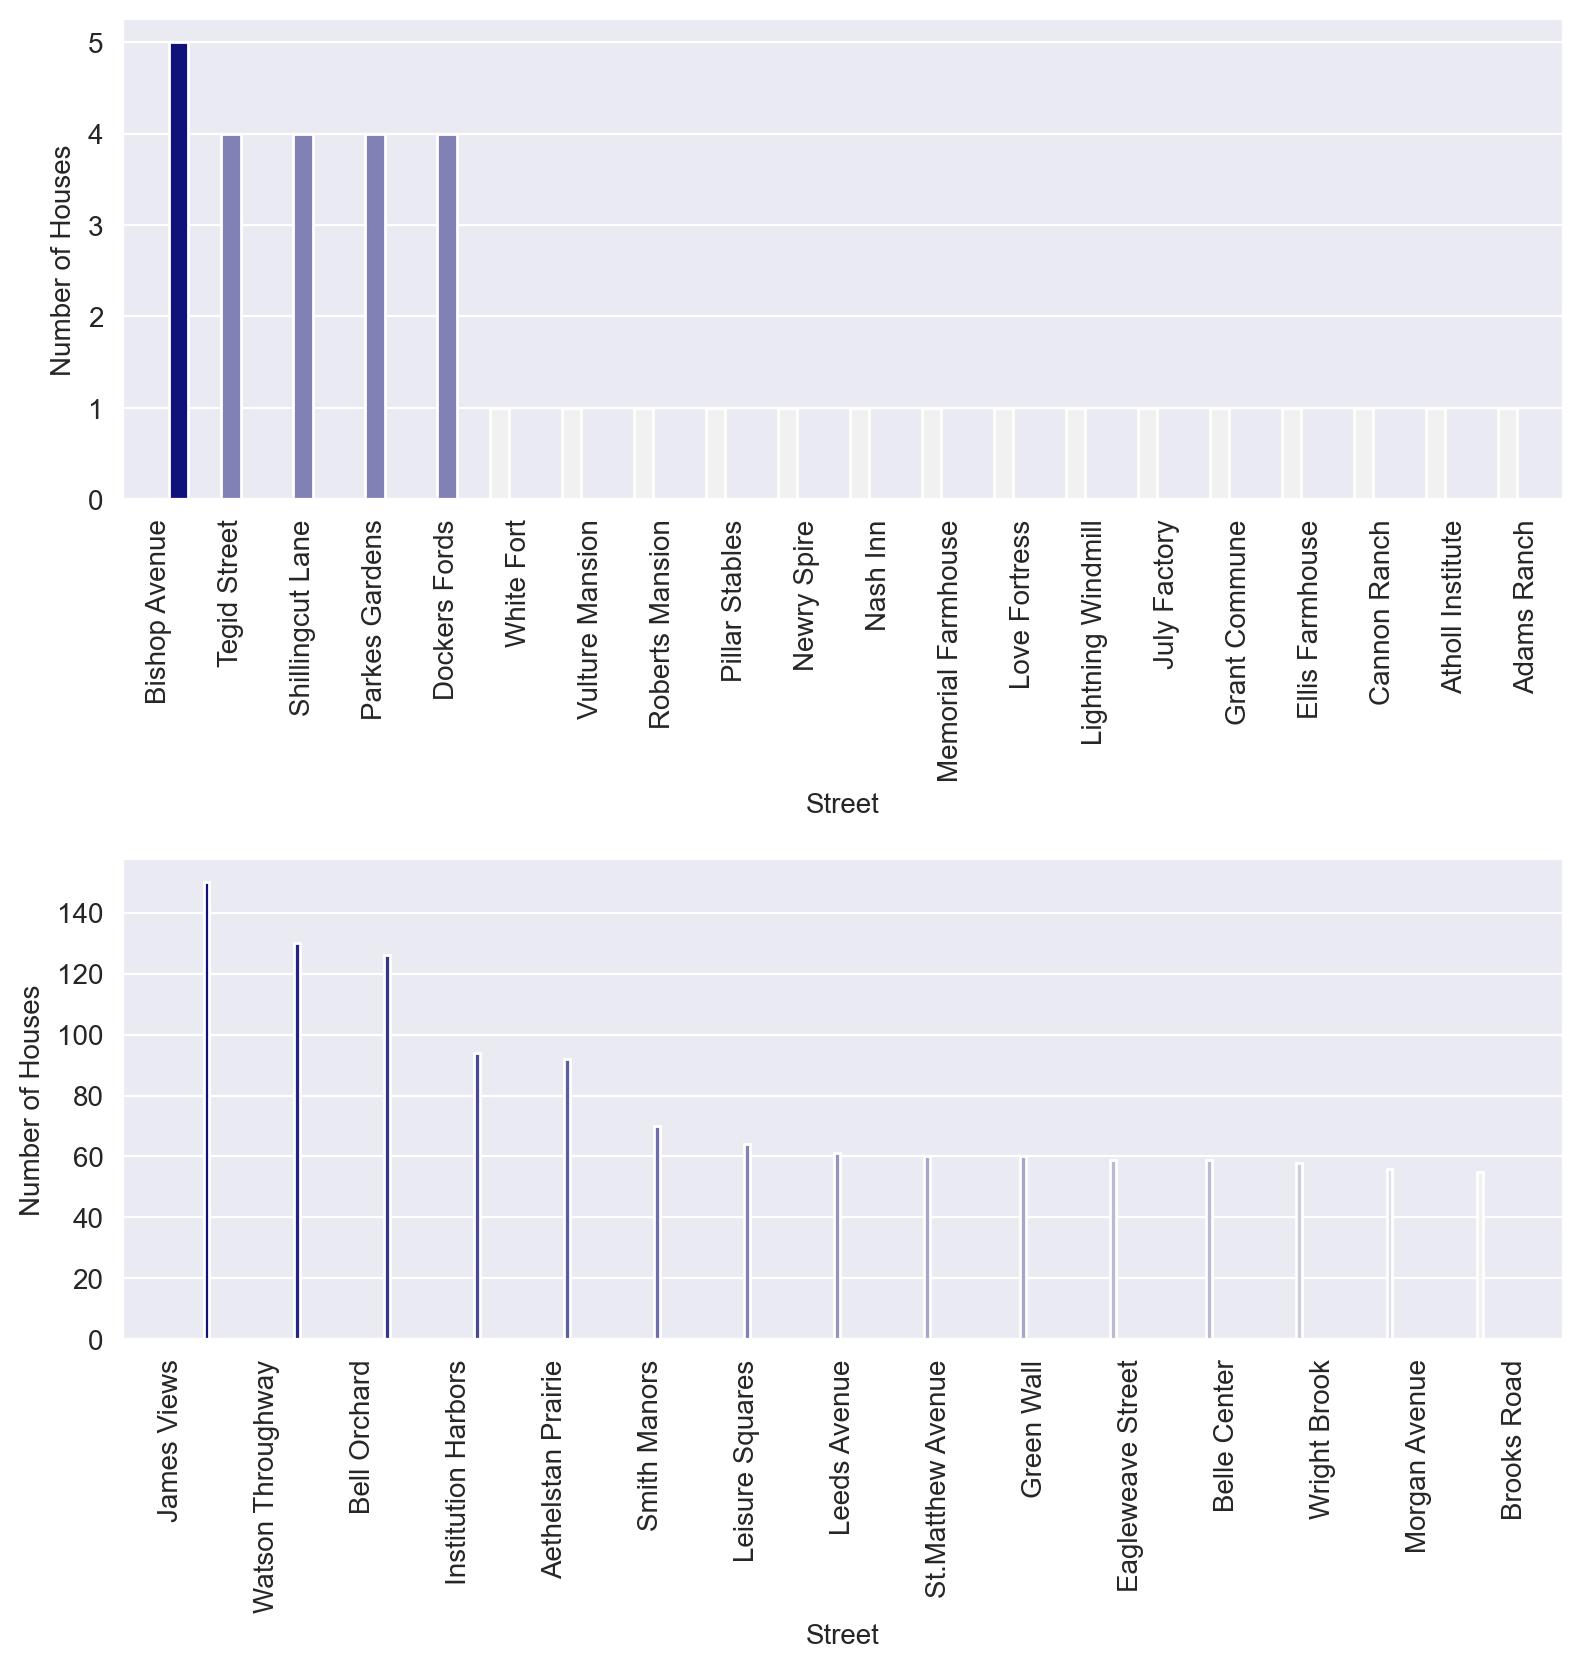

In [173]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(8, 4), dpi=200)
t, b = fig.add_axes([0, 0, 0.9, 0.6]), fig.add_axes([0, 1.05, 0.9, 0.6])

t15 = sns.barplot(data=top_15, y='Number of Houses', x='Street', hue='Number of Houses', 
                  color='darkblue', ax=t)
b15 = sns.barplot(data=least_15, y='Number of Houses', x='Street', hue='Number of Houses', 
                  color='darkblue', ax=b)
# l5 = sns.barplot(x=last_top['Number of Houses'], y=last_top['Street'], color='grey')

t15.legend().remove(), b15.legend().remove()

# sns.utils.plt.yticks(ticks=list(range(top_15['Street'].shape[0])), labels=top_15['Street'].to_list())
# sns.utils.move_legend(t15, (1.02, 0))
# sns.utils.move_legend(b15, (1.02, 0))

t15.set_xticklabels(t15.get_xticklabels(), rotation=90)
b15.set_xticklabels(b15.get_xticklabels(), rotation=90);

#### Occupants per Street

In [174]:
street_occupancy = census_df['Street'].value_counts()
street_occupancy

Wharf Wells            314
Watson Throughway      312
Institution Harbors    270
James Views            250
Aethelstan Prairie     245
                      ... 
Memorial Farmhouse       5
Newry Spire              5
Love Fortress            4
Cannon Ranch             3
Ellis Farmhouse          3
Name: Street, Length: 105, dtype: int64

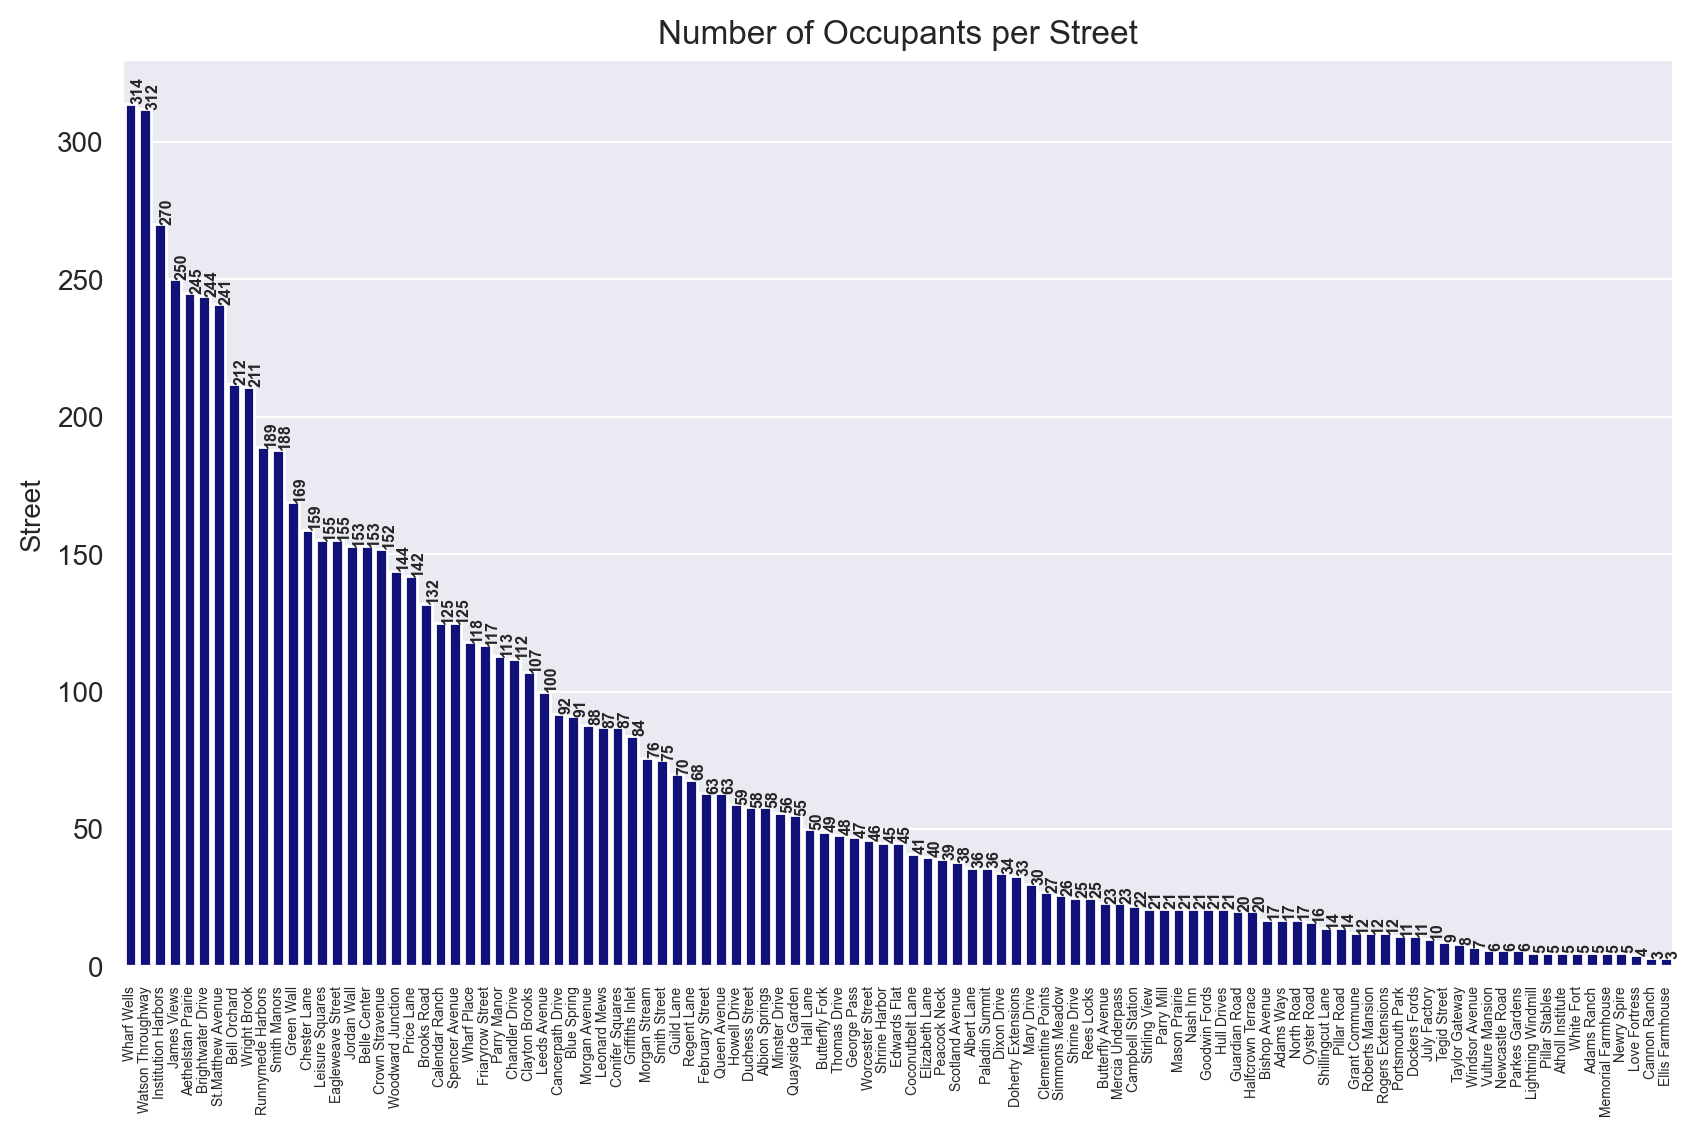

In [175]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(10, 6), dpi=200)

plotter = sns.barplot(x=street_occupancy.index, y=street_occupancy, color='darkblue')
plotter.set_xticklabels(plotter.get_xticklabels(), rotation=90, fontsize=5)

plotter.set_title("Number of Occupants per Street")

for i in range(street_occupancy.shape[0]):
    plotter.text(i, street_occupancy[i]+1, street_occupancy[i],
                fontweight='bold', fontsize='xx-small', rotation=90);

In [176]:
street_occupancy = street_occupancy.reset_index()
street_occupancy.columns = street_occupancy.columns.astype(sns.utils.np.str_).str.replace('Street', 'Occupants').str.replace('index', 'Street')
street_occupancy

Street  Occupants
0            Wharf Wells        314
1      Watson Throughway        312
2    Institution Harbors        270
3            James Views        250
4     Aethelstan Prairie        245
..                   ...        ...
100   Memorial Farmhouse          5
101          Newry Spire          5
102        Love Fortress          4
103         Cannon Ranch          3
104      Ellis Farmhouse          3

[105 rows x 2 columns]

In [177]:
ave_occup = street_occupancy['Occupants'].mean()
print(f"Average number of occupants: {ave_occup: .0f}")

Average number of occupants:  72


In [178]:
median_occup = street_occupancy['Occupants'].median()
print(f"Median number of occupants: {median_occup: .0f}")

Median number of occupants:  45


In [179]:
q1, q3 = street_occupancy['Occupants'].quantile(.25), street_occupancy['Occupants'].quantile(.75)
iqr = q3 - q1
print("Q1: {}\nQ3: {}\nIQR: {}".format(q1, q3, iqr))

Q1: 17.0
Q3: 112.0
IQR: 95.0


In [180]:
# outlier = ave +/- (1.5 * iqr)
iqr_coeff = 1.5 * iqr
llim = q1 - iqr_coeff
ulim = q3 + iqr_coeff
print("Outliers for Occupancy levels is \n" +
      f"number of occupants below {llim: .0f} or above {ulim: .0f}")

Outliers for Occupancy levels is 
number of occupants below -126 or above  254


Text(0.1, 284, 'Streets containing above  254 houses \nare considered to be Outliers')

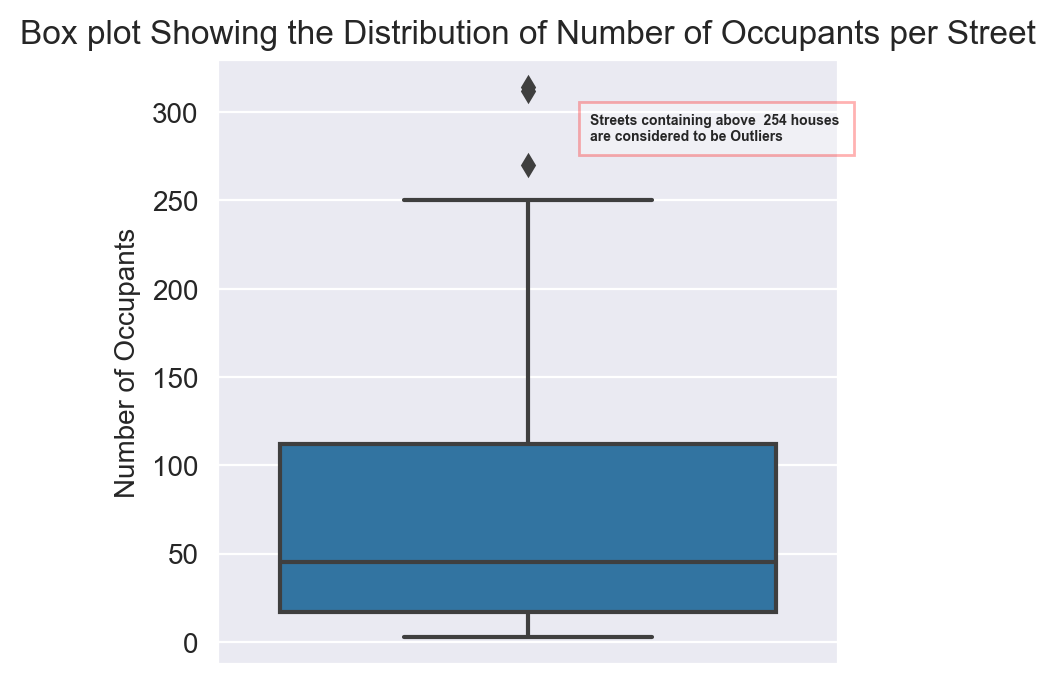

In [181]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(4, 4), dpi=200)

bxplot = sns.boxplot(y=street_occupancy['Occupants'])
bxplot.set_title("Box plot Showing the Distribution of Number of Occupants per Street")

bxplot.set_ylabel("Number of Occupants")

bxplot.text(0.1, 284, f"Streets containing above {ulim: .0f} houses \nare considered to be Outliers",
           fontsize=5, fontweight='bold',
            bbox={'edgecolor':'red', 'facecolor': 'white', 'alpha': 0.3})

In [182]:
# values that are 2 standard deviations above or below the median number of occupants
# shall be considered to be outliers
threshold_num_houses = (llim, ulim)
print(threshold_num_houses)

(-125.5, 254.5)


In [183]:
outliers = street_occupancy.loc[street_occupancy['Occupants'] > ulim]
outliers

Street  Occupants
0          Wharf Wells        314
1    Watson Throughway        312
2  Institution Harbors        270

In [184]:
non_outliers = street_occupancy.loc[~(street_occupancy['Occupants'] > ulim)]
non_outliers

Street  Occupants
3           James Views        250
4    Aethelstan Prairie        245
5     Brightwater Drive        244
6     St.Matthew Avenue        241
7          Bell Orchard        212
..                  ...        ...
100  Memorial Farmhouse          5
101         Newry Spire          5
102       Love Fortress          4
103        Cannon Ranch          3
104     Ellis Farmhouse          3

[102 rows x 2 columns]

#### Number of Families in the city

In [186]:
census_df['Surname'].unique().shape[0]

623

#### Size of Each Family

#### Number of Occupants per House Address

In [187]:
family_members = census_df[['Address', 'Surname', 'First Name']].groupby(by=['Address', 'Surname']).count().reset_index()
family_members.columns = family_members.columns.astype(np.str_).str.replace('First Name', 'Count')
family_members = family_members.sort_values('Count', ascending=False)
family_members

Address  Surname  Count
1774  27, Brightwater Drive    Perry     22
98              1, Nash Inn     Ford     21
1656  25, Brightwater Drive   Howell     12
2295        33, Wharf Wells   Haynes     11
2243        32, Wharf Wells   Wright     10
...                     ...      ...    ...
1739       26, Leeds Avenue    Riley      1
1740    26, Leisure Squares   Howard      1
1741    26, Leisure Squares  Skinner      1
1743      26, Morgan Avenue     Wong      1
4127  99, Watson Throughway     Read      1

[4128 rows x 3 columns]

In [188]:
family_members.loc[family_members['Surname'] == 'Smith']

Address Surname  Count
1800        27, Jordan Wall   Smith      6
3806      8, Calendar Ranch   Smith      5
4039       9, Minster Drive   Smith      5
2959     45, Spencer Avenue   Smith      5
2129        30, Wharf Place   Smith      5
...                     ...     ...    ...
1540        23, James Views   Smith      1
1445     22, Chandler Drive   Smith      1
1815     27, Spencer Avenue   Smith      1
1941  3, Aethelstan Prairie   Smith      1
1772       27, Bell Orchard   Smith      1

[110 rows x 3 columns]

In [189]:
census_df.loc[census_df['Address'] == '23, James Views']

House Number       Street First Name Surname  Age  \
4898            23  James Views      Hazel   Smith   71   

     Relationship to Head of House Marital Status Gender  \
4898                          Head        Widowed      F   

                         Occupation Infirmity  Religion          Address  \
4898  Retired Accounting technician      None  Catholic  23, James Views   

      Is Retired  Is Unemployed  Is Student Major Religions  
4898           1              0           0       Christian

#### Number of Households per Address

In [190]:
households_per_address = census_df.loc[census_df['Relationship to Head of House'] == 'Head', ['Relationship to Head of House', 'Address']].value_counts().reset_index()
households_per_address.columns = households_per_address.columns.astype(np.str_).str.replace('0', 'Number of Households')

In [191]:
households_per_address

Relationship to Head of House                Address  \
0                             Head       21, Leonard Mews   
1                             Head         1, Adams Ranch   
2                             Head       41, Belle Center   
3                             Head     41, Chandler Drive   
4                             Head       41, Chester Lane   
...                            ...                    ...   
2873                          Head     21, Duchess Street   
2874                          Head  21, Eagleweave Street   
2875                          Head    21, February Street   
2876                          Head   21, Friaryrow Street   
2877                          Head  99, Watson Throughway   

      Number of Households  
0                        2  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
2873                     1  
2874                     1  
2875                     1  
2876                     1  
2877                     1  

[2878 rows x 3 columns]

In [192]:
multiple_heads = households_per_address.loc[households_per_address['Number of Households'] > 1]
multiple_heads

Relationship to Head of House           Address  Number of Households
0                          Head  21, Leonard Mews                     2

In [193]:
census_df.loc[census_df['Address'] == multiple_heads['Address'].values[0]]

House Number        Street First Name  Surname  Age  \
6697            21  Leonard Mews       Sara     King   49   
6698            21  Leonard Mews      Bryan  Freeman   47   
6699            21  Leonard Mews      Helen     King   28   
6700            21  Leonard Mews     Martyn     King    1   
6701            21  Leonard Mews      Jamie   Hewitt   76   

     Relationship to Head of House Marital Status Gender  \
6697                          Head         Single      F   
6698                       Partner         Single      M   
6699                      Daughter         Single      F   
6700                           Son     Ineligible      M   
6701                          Head        Widowed      M   

                      Occupation Infirmity   Religion           Address  \
6697   Medical technical officer      None  Methodist  21, Leonard Mews   
6698   Psychologist, counselling      None  Methodist  21, Leonard Mews   
6699         Marketing executive      None       None  21, Leonard Mews   
6700                       Child      None        NaN  21, Leonard Mews   
6701  Retired Press photographer      None       None  21, Leonard Mews   

      Is Retired  Is Unemployed  Is Student Major Religions  
6697           0              0           0       Christian  
6698           0              0           0       Christian  
6699           0              0           0         Unknown  
6700           0              0           0      Ineligible  
6701           1              0           0         Unknown

In [194]:
multiple_heads['Address'].str[4:].values[0]

'Leonard Mews'

In [195]:
# occupants of Leonard Mews street
census_df.loc[census_df['Street'] == multiple_heads['Address'].str[4:].values[0]].iloc[:15]

House Number        Street First Name   Surname  Age  \
6633             1  Leonard Mews       Luke    Arnold   43   
6634             1  Leonard Mews  Kimberley    Arnold   39   
6635             1  Leonard Mews      Sarah    Arnold    5   
6636             2  Leonard Mews     Sharon    Sutton   41   
6637             2  Leonard Mews       Owen     Price   39   
6638             2  Leonard Mews    Gregory    Sutton   11   
6639             2  Leonard Mews     Joanne    Sutton    9   
6640             2  Leonard Mews      Harry    Sutton    7   
6641             3  Leonard Mews  Kimberley    Naylor   48   
6642             3  Leonard Mews     Marcus    Naylor    6   
6643             3  Leonard Mews      Conor    Harvey    2   
6644             4  Leonard Mews       Glen   Walters   36   
6645             4  Leonard Mews    Suzanne   Walters   31   
6646             4  Leonard Mews      Barry     Kirby    3   
6647             5  Leonard Mews       Rhys  Robinson   70   

     Relationship to Head of House Marital Status Gender  \
6633                          Head        Married      M   
6634                          Wife        Married      F   
6635                      Daughter     Ineligible      F   
6636                          Head         Single      F   
6637                       Partner         Single      M   
6638                           Son     Ineligible      M   
6639                      Daughter     Ineligible      F   
6640                           Son     Ineligible      M   
6641                          Head         Single      F   
6642                           Son     Ineligible      M   
6643                           Son     Ineligible      M   
6644                          Head        Married      M   
6645                          Wife        Married      F   
6646                           Son     Ineligible      M   
6647                          Head       Divorced      M   

                            Occupation Infirmity   Religion          Address  \
6633     Telecommunications researcher      None  Christian  1, Leonard Mews   
6634  Education officer, environmental      None       None  1, Leonard Mews   
6635                           Student      None        NaN  1, Leonard Mews   
6636               Dispensing optician      None   Catholic  2, Leonard Mews   
6637              Pharmacist, hospital      None   Catholic  2, Leonard Mews   
6638                           Student      None        NaN  2, Leonard Mews   
6639                           Student      None        NaN  2, Leonard Mews   
6640                           Student      None        NaN  2, Leonard Mews   
6641                        Oncologist      None   Catholic  3, Leonard Mews   
6642                           Student      None        NaN  3, Leonard Mews   
6643                             Child      None        NaN  3, Leonard Mews   
6644                 Personnel officer      None  Methodist  4, Leonard Mews   
6645            Financial risk analyst      None  Methodist  4, Leonard Mews   
6646                             Child      None        NaN  4, Leonard Mews   
6647   Retired Water quality scientist      None   Catholic  5, Leonard Mews   

      Is Retired  Is Unemployed  Is Student Major Religions  
6633           0              0           0       Christian  
6634           0              0           0         Unknown  
6635           0              0           1      Ineligible  
6636           0              0           0       Christian  
6637           0              0           0       Christian  
6638           0              0           1      Ineligible  
6639           0              0           1      Ineligible  
6640           0              0           1      Ineligible  
6641           0              0           0       Christian  
6642           0              0           1      Ineligible  
6643           0              0           0      Ineligible  
6644           0           

In [196]:
census_df.groupby(by=['Address']).size()

Address
1, Adams Ranch           5
1, Adams Ways            1
1, Aethelstan Prairie    2
1, Albert Lane           6
1, Albion Springs        1
                        ..
98, James Views          3
98, Watson Throughway    4
99, Bell Orchard         1
99, James Views          1
99, Watson Throughway    1
Length: 2878, dtype: int64

In [197]:
census_df.loc[census_df['Relationship to Head of House'] == 'Head', ['Address', 'Relationship to Head of House']].groupby(by=['Address']).count()

Relationship to Head of House
Address                                             
1, Adams Ranch                                     1
1, Adams Ways                                      1
1, Aethelstan Prairie                              1
1, Albert Lane                                     1
1, Albion Springs                                  1
...                                              ...
98, James Views                                    1
98, Watson Throughway                              1
99, Bell Orchard                                   1
99, James Views                                    1
99, Watson Throughway                              1

[2878 rows x 1 columns]

___

### MARITAL STATUS

In [198]:
mar_stat_perc = np.round(100 * census_df['Marital Status'].value_counts()/census_df.shape[0], 2)
mar_stat_perc

Single        34.24
Married       28.78
Ineligible    22.12
Divorced       9.91
Widowed        4.95
Name: Marital Status, dtype: float64

Text(0.5, 1.0, 'Age By Marital Status Across Genders')

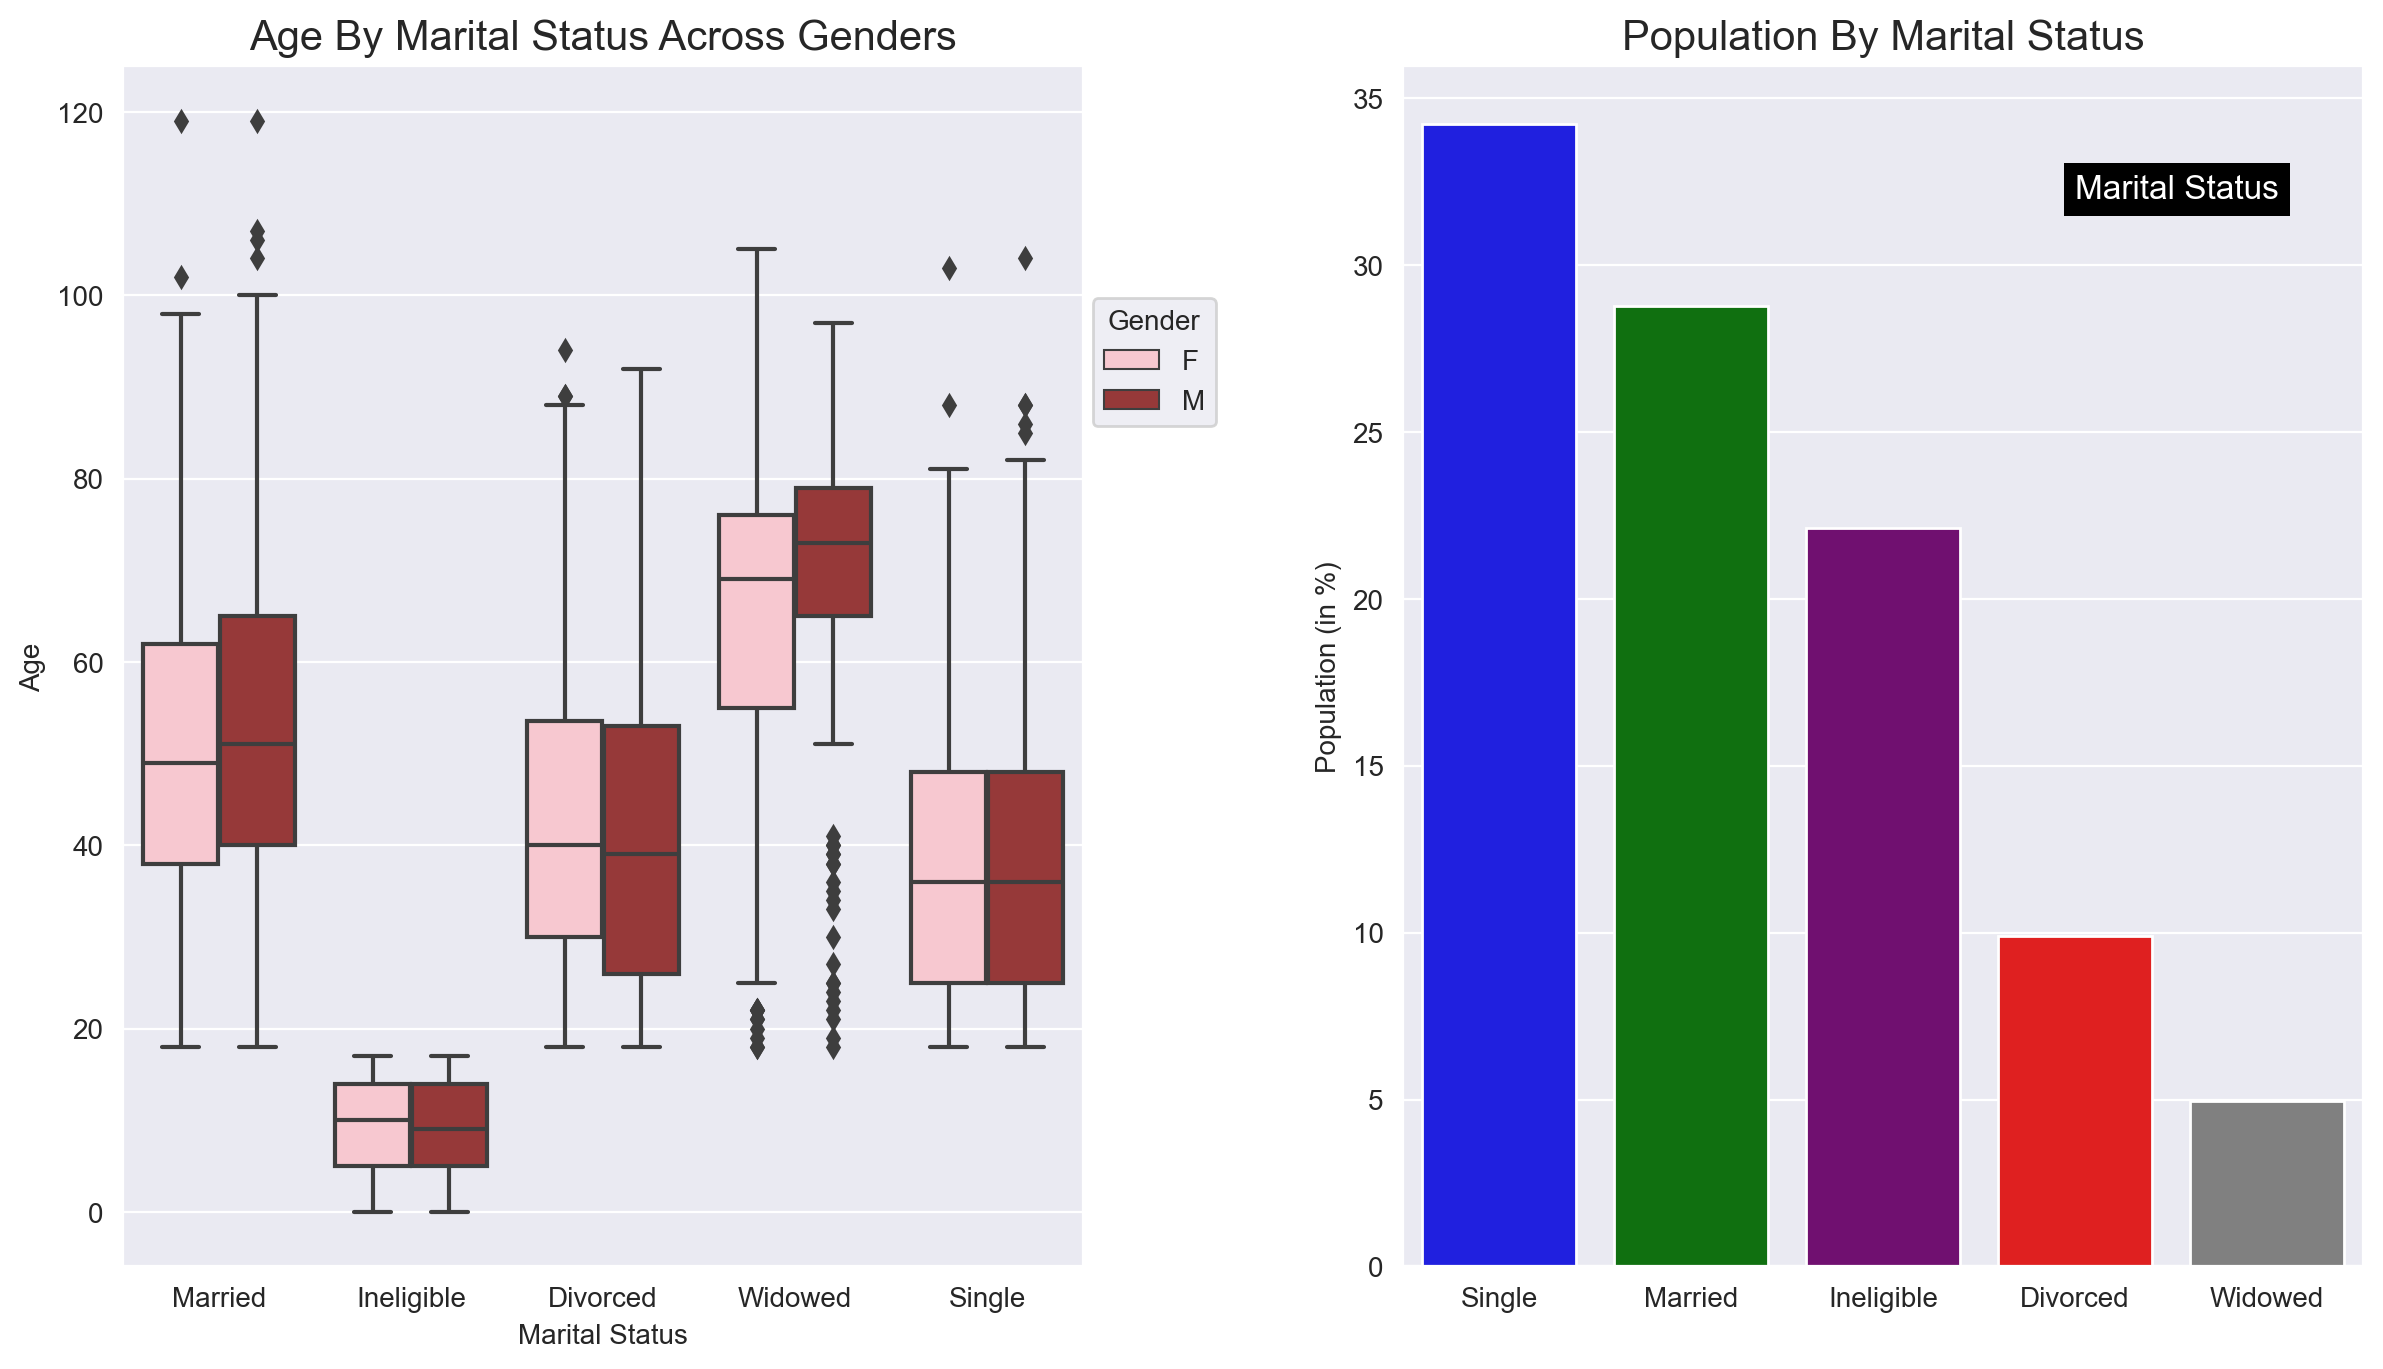

In [199]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8, 6), dpi=200)
l, r  = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])
sns.boxplot(data=census_df, y='Age', x='Marital Status', hue='Gender',
           palette={'F':'pink', 'M': 'brown'}, ax=l)
sns.barplot(y=mar_stat_perc, x=mar_stat_perc.index, ax=r,
           palette={'Single':'blue',
                   'Married':'green',
                   'Divorced':'red',
                   'Widowed':'grey',
                   'Ineligible':'purple'})

sns.move_legend(l, [1.01, 0.7])
r.text(3, 32, 'Marital Status', size=12, color='white',
      bbox={'facecolor':'black', 'edgecolor':'none'})

ax1.set_xlabel(ax1.get_xlabel(), labelpad=1)

r.set_ylabel("Population (in %)")
r.set_title("Population By Marital Status", size=15)

l.set_title("Age By Marital Status Across Genders", size=15)

In [200]:
fname = 'marr_stat_age_distr.png'
cd.fig_writer(fname, fig)

'marr_stat_age_distr.png'

### MARRIED VS DIVORCED

In [201]:
census_df['Marital Status'].unique()

array(['Married', 'Ineligible', 'Divorced', 'Widowed', 'Single'],
      dtype=object)

In [202]:
married = census_df.loc[census_df['Marital Status'] == 'Married']
married

House Number              Street First Name     Surname  Age  \
0                1      Simmons Meadow     Andrea     Bradley   43   
1                1      Simmons Meadow      Peter     Bradley   44   
16               7      Simmons Meadow     Marcus      Hanson   88   
17               7      Simmons Meadow     Cheryl      Hanson   85   
29               3       Morgan Avenue     Denise       Sharp   59   
...            ...                 ...        ...         ...  ...   
7563             1         Adams Ranch     Samuel        Cook   43   
7567             1       Love Fortress       Dawn  O'Sullivan   42   
7568             1       Love Fortress      James  O'Sullivan   45   
7571             1  Memorial Farmhouse   Samantha        Page   40   
7572             1  Memorial Farmhouse       Paul        Page   43   

     Relationship to Head of House Marital Status Gender  \
0                             Head        Married      F   
1                          Husband        Married      M   
16                            Head        Married      M   
17                            Wife        Married      F   
29                            Head        Married      F   
...                            ...            ...    ...   
7563                       Husband        Married      M   
7567                          Head        Married      F   
7568                       Husband        Married      M   
7571                          Head        Married      F   
7572                       Husband        Married      M   

                            Occupation            Infirmity   Religion  \
0                       Prison officer                 None       None   
1                       Futures trader                 None       None   
16          Retired Arts administrator                 None  Christian   
17    Retired Magazine features editor                 None       None   
29      Television/film/video producer                 None  Christian   
...                                ...                  ...        ...   
7563                 Medical secretary                 None  Methodist   
7567               Pensions consultant                 None       None   
7568                        Unemployed                 None       None   
7571               Colour technologist  Physical Disability       None   
7572                     Lexicographer                 None       None   

                    Address  Is Retired  Is Unemployed  Is Student  \
0         1, Simmons Meadow           0              0           0   
1         1, Simmons Meadow           0              0           0   
16        7, Simmons Meadow           1              0           0   
17        7, Simmons Meadow           1              0           0   
29         3, Morgan Avenue           0              0           0   
...                     ...         ...            ...         ...   
7563         1, Adams Ranch           0              0           0   
7567       1, Love Fortress           0              0           0   
7568       1, Love Fortress           0              1           0   
7571  1, Memorial Farmhouse           0              0           0   
7572  1, Memorial Farmhouse           0              0           0   

     Major Religions  
0            Unknown  
1            Unknown  
16         Christian  
17           Unknown  
29         Christian  
...              ...  
7563       Christian  
7567         Unknown  
7568         Unknown  
7571         Unknown  
7572         Unknown  

[2182 rows x 16 columns]

In [203]:
divorced = census_df.loc[census_df['Marital Status'] == 'Divorced']
divorced

House Number           Street First Name    Surname  Age  \
4                1   Simmons Meadow     Edward     Slater   25   
5                2   Simmons Meadow    Melanie    O'Brien   24   
13               5   Simmons Meadow     Julian   Marshall   57   
14               6   Simmons Meadow   Beverley      Jones   30   
23              10   Simmons Meadow      Glenn    Doherty   25   
...            ...              ...        ...        ...  ...   
7535             1  Roberts Mansion      Lydia  Macdonald   19   
7542             1  Roberts Mansion    Vanessa      Price   54   
7548             1       White Fort    Cameron     Hilton   30   
7549             1       White Fort      Colin      Young   29   
7555             1    Grant Commune       Adam      Lyons   26   

     Relationship to Head of House Marital Status Gender  \
4                           Lodger       Divorced      M   
5                             Head       Divorced      F   
13                            Head       Divorced      M   
14                            Head       Divorced      F   
23                          Lodger       Divorced      M   
...                            ...            ...    ...   
7535                      Daughter       Divorced      F   
7542                        Lodger       Divorced      F   
7548                       Visitor       Divorced      M   
7549                        Lodger       Divorced      M   
7555                        Lodger       Divorced      M   

                            Occupation Infirmity   Religion  \
4           Further education lecturer      None       None   
5     Production assistant, television      None       None   
13                   Barrister's clerk      None  Christian   
14                        Nurse, adult      None       None   
23           Consulting civil engineer      None       None   
...                                ...       ...        ...   
7535                University Student      None       None   
7542           Forest/woodland manager      None  Christian   
7548               Hospital pharmacist      None     Muslim   
7549       Nature conservation officer      None       None   
7555                        Unemployed      None       None   

                 Address  Is Retired  Is Unemployed  Is Student  \
4      1, Simmons Meadow           0              0           0   
5      2, Simmons Meadow           0              0           0   
13     5, Simmons Meadow           0              0           0   
14     6, Simmons Meadow           0              0           0   
23    10, Simmons Meadow           0              0           0   
...                  ...         ...            ...         ...   
7535  1, Roberts Mansion           0              0           1   
7542  1, Roberts Mansion           0              0           0   
7548       1, White Fort           0              0           0   
7549       1, White Fort           0              0           0   
7555    1, Grant Commune           0              1           0   

     Major Religions  
4            Unknown  
5            Unknown  
13         Christian  
14           Unknown  
23           Unknown  
...              ...  
7535         Unknown  
7542       Christian  
7548          Muslim  
7549         Unknown  
7555         Unknown  

[751 rows x 16 columns]

In [204]:
print(f"{married.shape[0]} married people")

2182 married people


In [205]:
# number of wives
wives = married.loc[married['Gender'] == 'F']
print(f"There are {wives.shape[0]} married women living in the town")

There are 1098 married women living in the town


In [206]:
# number of husbands
husb = married.loc[married['Gender'] == 'M']
print(f"There are {husb.shape[0]} married men living in the town")

There are 1084 married men living in the town


In [207]:
print(f"{divorced.shape[0]} divorced people")

751 divorced people


In [208]:
# number of divorced wives
div_w = divorced.loc[divorced['Gender'] == 'F']
print(f"There are {div_w.shape[0]} divorced women living in the town")

There are 463 divorced women living in the town


In [209]:
# number of divorced husbands
div_h = divorced.loc[divorced['Gender'] == 'M']
print(f"There are {div_h.shape[0]} divorced men living in the town")

There are 288 divorced men living in the town


In [210]:
age_boundaries = list(range(0, census_df['Age'].max()+5, 5))

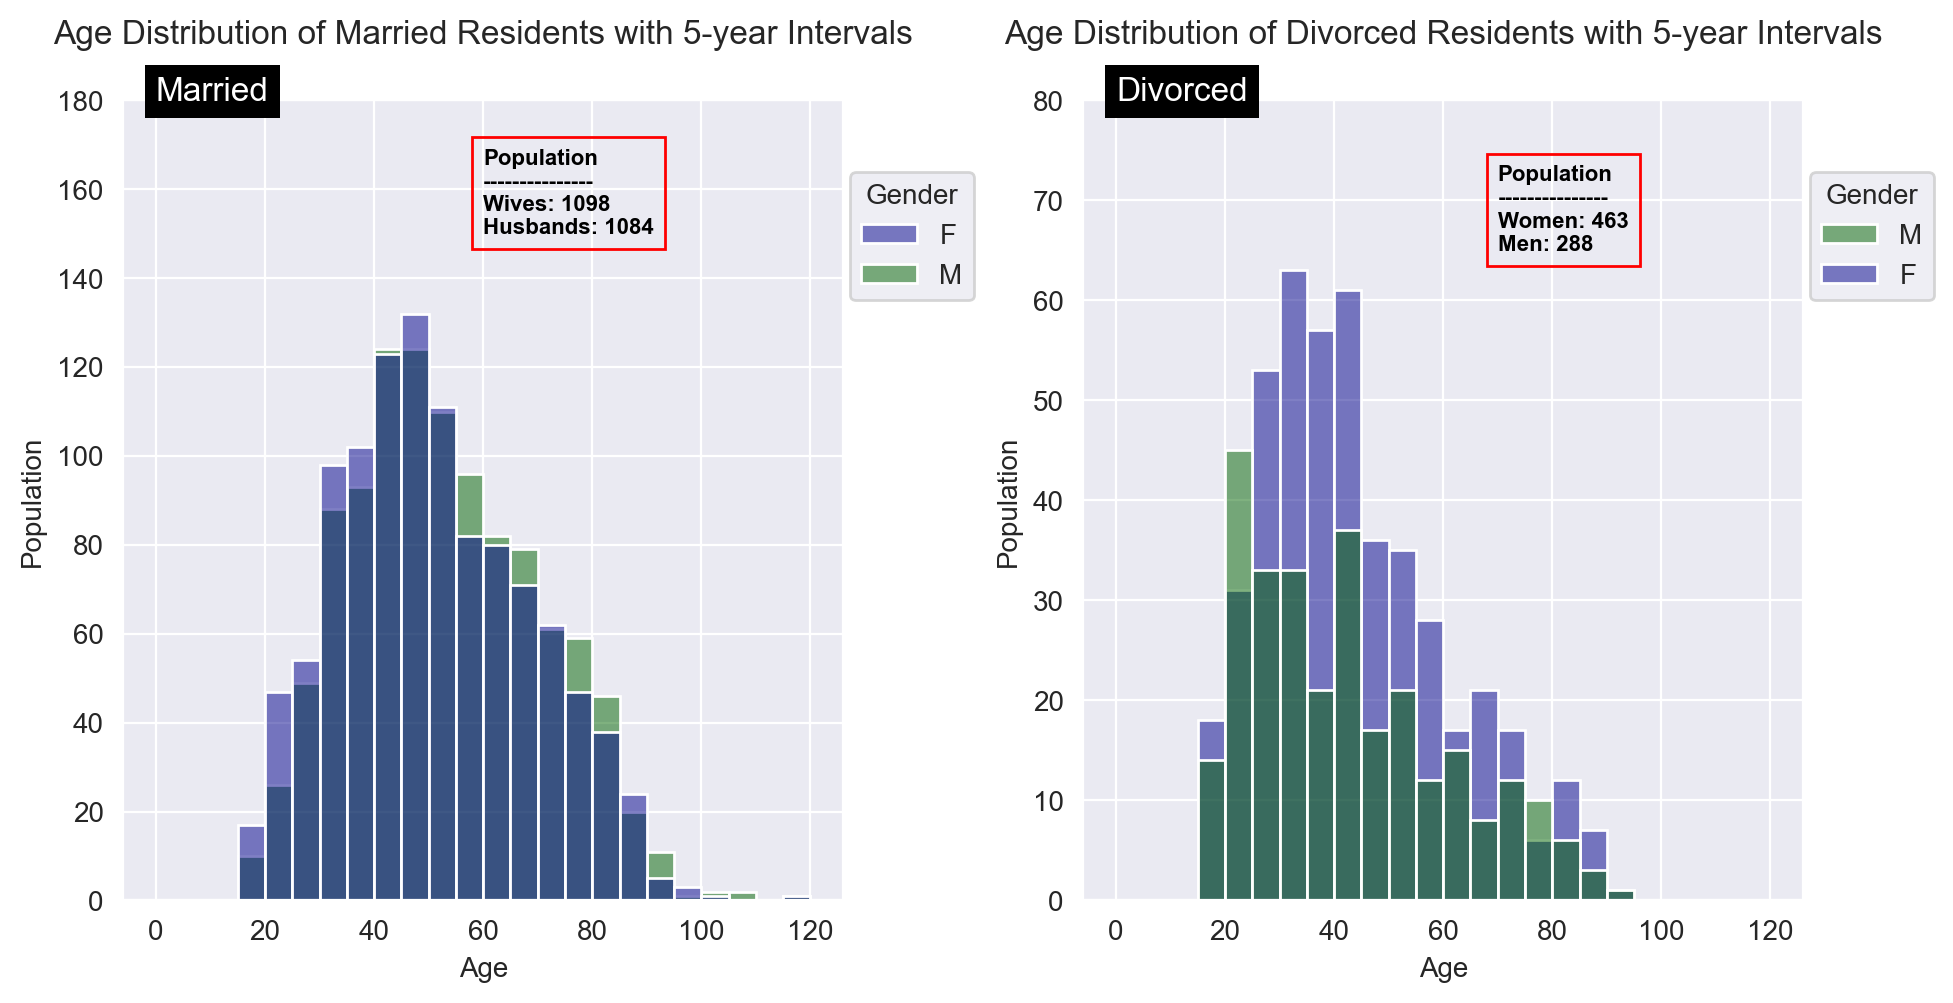

In [211]:
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(6, 4), dpi=200)
mar_ax, div_ax = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])

sns.histplot(data=married, x='Age', hue='Gender', multiple='layer',
             bins=age_boundaries,
             palette={'F': 'darkblue',
                    'M': 'darkgreen'}, ax=mar_ax)

sns.histplot(data=divorced, x='Age', hue='Gender', multiple='layer',
             bins=age_boundaries, 
             palette={'F': 'darkblue',
                    'M': 'darkgreen'}, ax=div_ax)

mar_ax.set_ylabel("Population"), div_ax.set_ylabel("Population")
mar_ax.set_ylim(0, 180), div_ax.set_ylim(0, 80)

mar_ax.text(0, 180, "Married", color='white', size=12,
        bbox={'facecolor':'black', 'edgecolor':'none'})
div_ax.text(0, 80, "Divorced", color='white', size=12,
        bbox={'facecolor':'black', 'edgecolor':'none'})

note = "Population\n" +\
"-"*15 +\
f"\nWives: {wives.shape[0]}\n" +\
f"Husbands: {husbands.shape[0]}"
mar_ax.text(60, 150, note, color='black', size=8, weight='bold',
        bbox={'facecolor':'none', 'edgecolor':'red'})

note = "Population\n" +\
"-"*15 +\
f"\nWomen: {div_w.shape[0]}\n" +\
f"Men: {div_h.shape[0]}"
div_ax.text(70, 65, note, color='black', size=8, weight='bold',
        bbox={'facecolor':'none', 'edgecolor':'red'})

sns.move_legend(mar_ax, [1.01, 0.75]), sns.move_legend(div_ax, [1.01, 0.75])

mar_ax.set_title("Age Distribution of Married Residents with 5-year Intervals", y=1.05)
div_ax.set_title("Age Distribution of Divorced Residents with 5-year Intervals", y=1.05);

In [212]:
fname = 'marr_div_age_distr.png'
cd.fig_writer(fname, fig)

'marr_div_age_distr.png'

#### Direct Comparison Between Married and Divorced

In [213]:
married_age_freq = pd.cut(married['Age'], bins=age_boundaries, retbins=True, include_lowest=True, right=False)[0].value_counts().sort_index()
married_age_freq

[0, 5)          0
[5, 10)         0
[10, 15)        0
[15, 20)       27
[20, 25)       73
[25, 30)      103
[30, 35)      186
[35, 40)      195
[40, 45)      247
[45, 50)      256
[50, 55)      221
[55, 60)      178
[60, 65)      162
[65, 70)      150
[70, 75)      123
[75, 80)      106
[80, 85)       84
[85, 90)       44
[90, 95)       16
[95, 100)       4
[100, 105)      3
[105, 110)      2
[110, 115)      0
[115, 120)      2
Name: Age, dtype: int64

In [214]:
married_age_perc = np.round(100 * married_age_freq/married_age_freq.sum(), 2)
married_age_perc

[0, 5)         0.00
[5, 10)        0.00
[10, 15)       0.00
[15, 20)       1.24
[20, 25)       3.35
[25, 30)       4.72
[30, 35)       8.52
[35, 40)       8.94
[40, 45)      11.32
[45, 50)      11.73
[50, 55)      10.13
[55, 60)       8.16
[60, 65)       7.42
[65, 70)       6.87
[70, 75)       5.64
[75, 80)       4.86
[80, 85)       3.85
[85, 90)       2.02
[90, 95)       0.73
[95, 100)      0.18
[100, 105)     0.14
[105, 110)     0.09
[110, 115)     0.00
[115, 120)     0.09
Name: Age, dtype: float64

In [215]:
df = married_age_perc.reset_index(name='% Head Count')
df.columns = df.columns.str.replace('index', 'Age Bracket')
mar_ages_0_44 = df.loc[df.index.isin(range(9))]
mar_ages_0_44['% Head Count']

0     0.00
1     0.00
2     0.00
3     1.24
4     3.35
5     4.72
6     8.52
7     8.94
8    11.32
Name: % Head Count, dtype: float64

In [216]:
divorced_age_freq = pd.cut(divorced['Age'], bins=age_boundaries, retbins=True, include_lowest=True, right=False)[0].value_counts().sort_index()
divorced_age_freq

[0, 5)         0
[5, 10)        0
[10, 15)       0
[15, 20)      32
[20, 25)      76
[25, 30)      86
[30, 35)      96
[35, 40)      78
[40, 45)      98
[45, 50)      53
[50, 55)      56
[55, 60)      40
[60, 65)      32
[65, 70)      29
[70, 75)      29
[75, 80)      16
[80, 85)      18
[85, 90)      10
[90, 95)       2
[95, 100)      0
[100, 105)     0
[105, 110)     0
[110, 115)     0
[115, 120)     0
Name: Age, dtype: int64

In [217]:
divorced_age_perc = np.round(100 * divorced_age_freq/divorced_age_freq.sum(), 2)
divorced_age_perc

[0, 5)         0.00
[5, 10)        0.00
[10, 15)       0.00
[15, 20)       4.26
[20, 25)      10.12
[25, 30)      11.45
[30, 35)      12.78
[35, 40)      10.39
[40, 45)      13.05
[45, 50)       7.06
[50, 55)       7.46
[55, 60)       5.33
[60, 65)       4.26
[65, 70)       3.86
[70, 75)       3.86
[75, 80)       2.13
[80, 85)       2.40
[85, 90)       1.33
[90, 95)       0.27
[95, 100)      0.00
[100, 105)     0.00
[105, 110)     0.00
[110, 115)     0.00
[115, 120)     0.00
Name: Age, dtype: float64

In [218]:
df = divorced_age_perc.reset_index(name='% Head Count')
df.columns = df.columns.str.replace('index', 'Age Bracket')
div_ages_0_44 = df.loc[df.index.isin(range(9))]
div_ages_0_44['% Head Count']

0     0.00
1     0.00
2     0.00
3     4.26
4    10.12
5    11.45
6    12.78
7    10.39
8    13.05
Name: % Head Count, dtype: float64

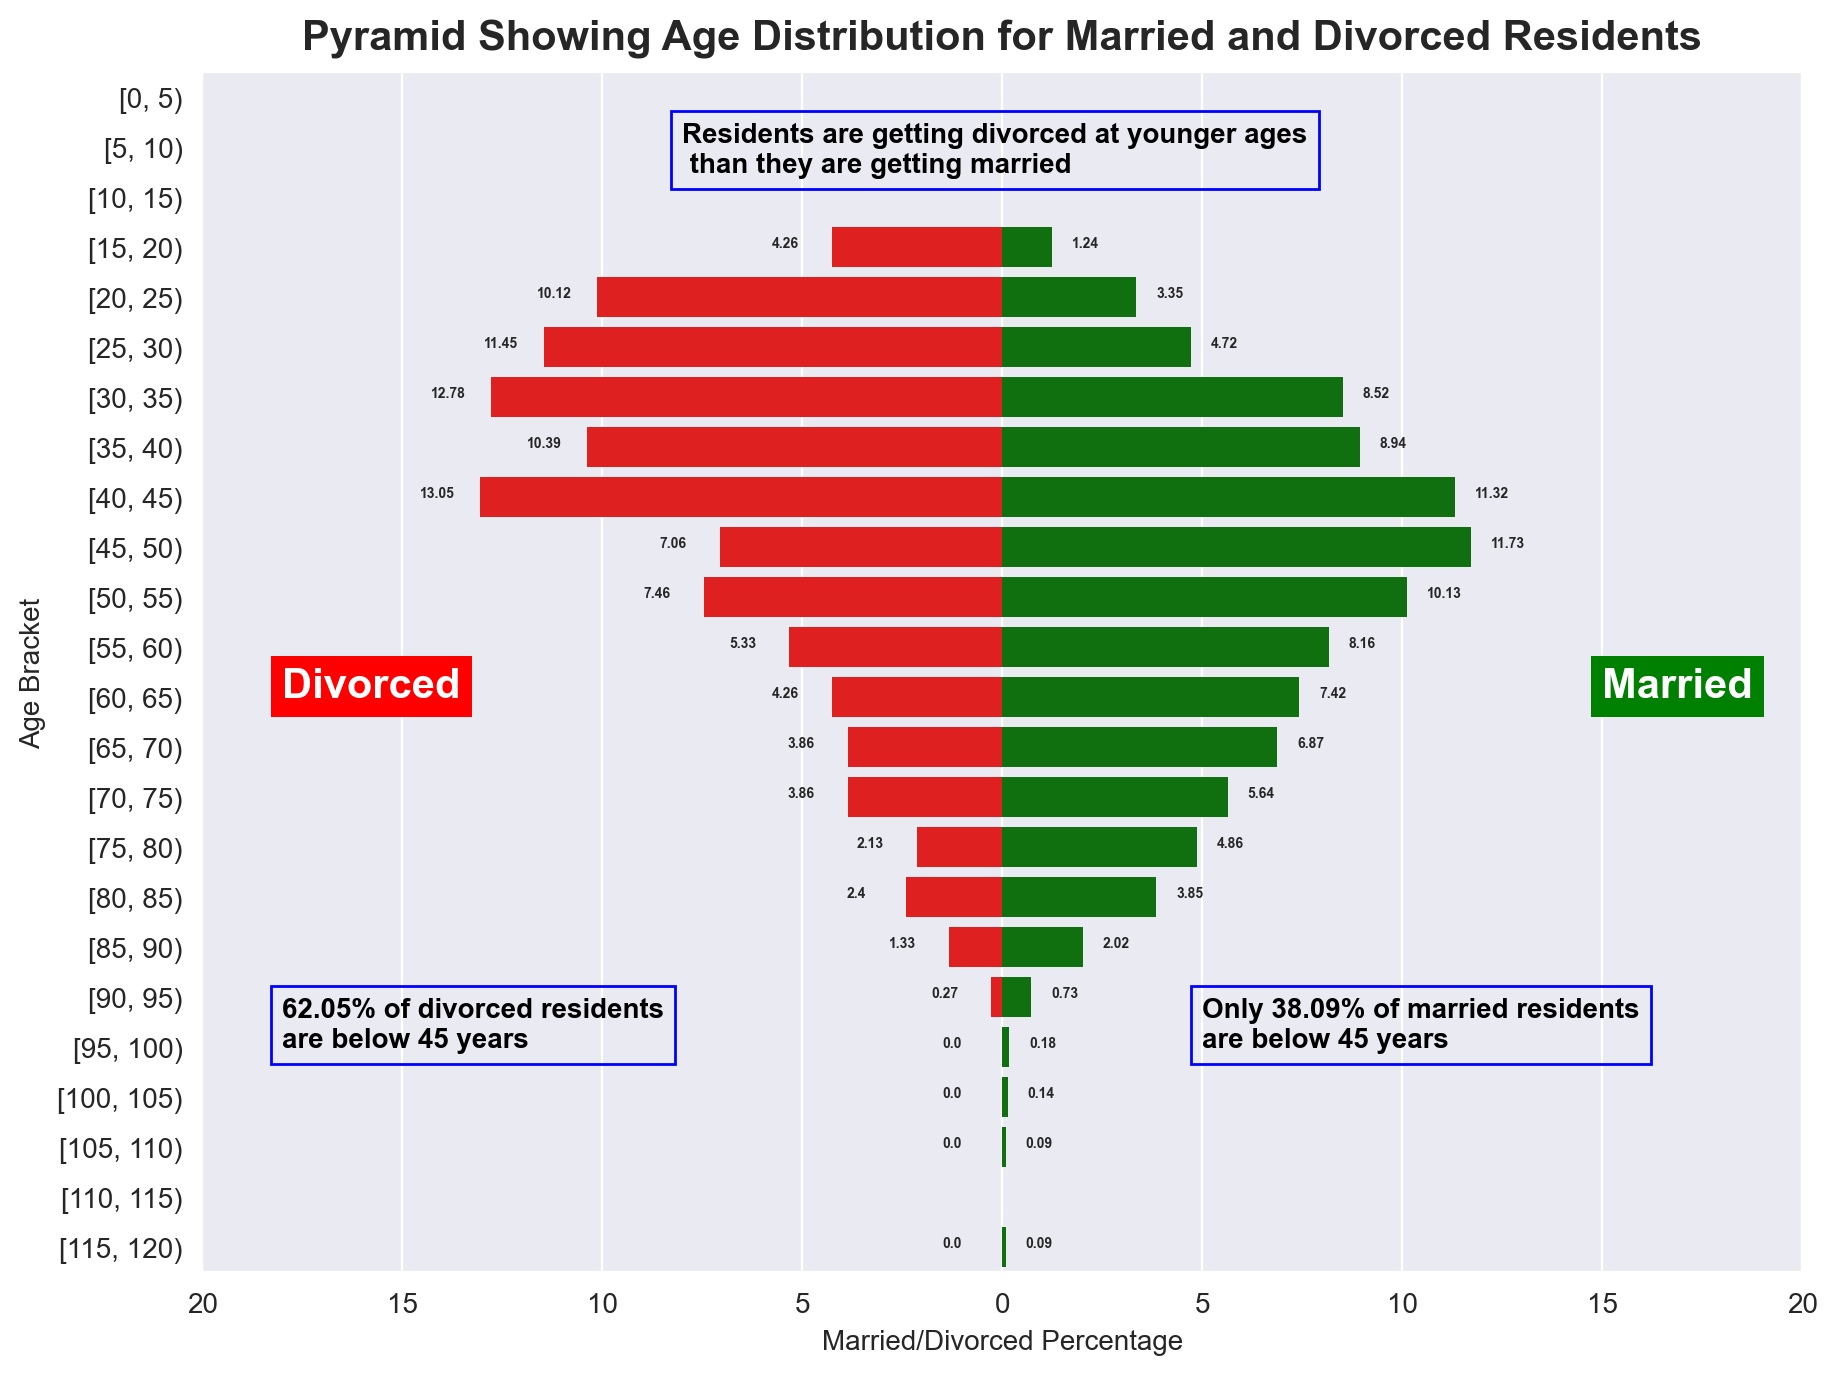

In [219]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax1 = fig.add_axes([0, 0, 1, 1])

sns.barplot(x=married_age_perc, 
            y=married_age_perc.index,
           color='green',
           label='Married',
            lw=0,
           ax=ax1)

sns.barplot(x=-1 * divorced_age_perc,
           y=divorced_age_perc.index,
           color='red',
           label='Divorced', 
            lw=0,
           ax=ax1)

plt.xlim(-20, 20)

note = "Residents are getting divorced at younger ages"+\
"\n than they are getting married"
plt.text(-8, 1.5, note, size=10, color='black', weight='bold',
        bbox={'edgecolor':'blue', 'facecolor':'none'})

note = f"{np.round(div_ages_0_44['% Head Count'].sum(), 2)}% of divorced residents" +\
"\nare below 45 years"
plt.text(-18, 19, note, size=10, color='black', weight='bold',
        bbox={'edgecolor':'blue', 'facecolor':'none'})

note = f"Only {np.round(mar_ages_0_44['% Head Count'].sum(), 2)}% of married residents" +\
"\nare below 45 years"
plt.text(5, 19, note, size=10, color='black', weight='bold',
        bbox={'edgecolor':'blue', 'facecolor':'none'})

plt.text(15, 12, "Married", color='white', weight='bold',
        bbox={'facecolor':'green', 'edgecolor':'none'},
        size=15)
plt.text(-18, 12, "Divorced", color='white', weight='bold',
        bbox={'facecolor':'red', 'edgecolor':'none'},
        size=15)

plt.xlabel("Married/Divorced Percentage"), plt.ylabel("Age Bracket")

for i in range(married_age_perc.shape[0]):
    if married_age_perc[i] or divorced_age_perc[i]:
        plt.text(married_age_perc[i] + 0.5, i, married_age_perc[i],
                size=5, weight='bold')
        plt.text(-1*divorced_age_perc[i] - 1.5, i, divorced_age_perc[i],
            size=5, weight='bold')

label = [20, 15, 10, 5, 0, 5, 10, 15, 20]
plt.xticks(ticks=ax1.get_xticks(), labels=label)


plt.title("Pyramid Showing Age Distribution for Married and Divorced Residents", y=1.005, weight='bold', size=15);

In [220]:
fname = 'marr_vs_div_age_pyr.png'
cd.fig_writer(fname, fig)

'marr_vs_div_age_pyr.png'

#### Number of marriages per year

In [221]:
total_married = married.shape[0]
print(total_married)

2182


#### Wives & Husbands

In [222]:
wives = census_df.loc[(census_df['Marital Status'] == 'Married') &
                      (census_df['Gender'] == 'F')]  # married females
husbands = married.loc[(census_df['Marital Status'] == 'Married') &
                      (census_df['Gender'] == 'M')]  # married males

In [223]:
# number of wives
print(wives.shape[0])

1098


In [224]:
# number of husbands
print(husbands.shape[0])

1084


#### Number of Marriages
(number of wives + number of husbands)/2

In [225]:
num_marriages = np.int_((wives.shape[0] + husbands.shape[0])/2)
print(num_marriages)

1091


### Married Rate

**Crude Marriage Rate:**<br>
CMR = (Number of marriages per year / Total population) * 1000<br>
Number of marriages per 1000 resident

Married this year is assumed be wives and husbands who are between 25 and 29 years.

In [226]:
married_thisyr = married.loc[married['Age'].between(25, 29)]
num_marriages = married_thisyr.shape[0]/2
num_marriages

51.5

In [227]:
married_thisyr['Gender'].value_counts()

F    54
M    49
Name: Gender, dtype: int64

In [228]:
marriage_rate = 1000 * num_marriages/census_df.shape[0]
marriage_rate

6.79329903706635

In [229]:
print(f"{np.round(marriage_rate, 0): .0f} marriages occur per 1000 residents annually")

 7 marriages occur per 1000 residents annually


### Divorced Rate

**Crude Divorced Rate:**<br>
CDR = (Number of divorces per year / Total population) * 1000<br>
Number of divorces per 1000 resident

In [230]:
# women tend to get divorced between 45-49
divorce_thisyr = divorced.loc[divorced['Age'].between(45, 49)]
num_divorces = divorce_thisyr.shape[0]/2
divorce_thisyr.shape[0]

53

In [231]:
divorce_thisyr['Gender'].value_counts()

F    36
M    17
Name: Gender, dtype: int64

In [232]:
divorce_rate = 1000 * num_divorces/census_df.shape[0]
divorce_rate

3.495581057907928

In [233]:
print(f"{np.round(divorce_rate, 0): .0f} divorces occur per 1000 residents annually")

 3 divorces occur per 1000 residents annually


#### Divorced by 45

In [234]:
divorced_by_45 = census_df.loc[(census_df['Marital Status'] == 'Divorced') &
                               (census_df['Age'].between(0, 45))]
divorced_by_45

House Number           Street First Name    Surname  Age  \
4                1   Simmons Meadow     Edward     Slater   25   
5                2   Simmons Meadow    Melanie    O'Brien   24   
14               6   Simmons Meadow   Beverley      Jones   30   
23              10   Simmons Meadow      Glenn    Doherty   25   
40              10    Morgan Avenue    Russell      Lyons   27   
...            ...              ...        ...        ...  ...   
7516             1         Nash Inn    Patrick       Ford   32   
7535             1  Roberts Mansion      Lydia  Macdonald   19   
7548             1       White Fort    Cameron     Hilton   30   
7549             1       White Fort      Colin      Young   29   
7555             1    Grant Commune       Adam      Lyons   26   

     Relationship to Head of House Marital Status Gender  \
4                           Lodger       Divorced      M   
5                             Head       Divorced      F   
14                            Head       Divorced      F   
23                          Lodger       Divorced      M   
40                            Head       Divorced      M   
...                            ...            ...    ...   
7516                           Son       Divorced      M   
7535                      Daughter       Divorced      F   
7548                       Visitor       Divorced      M   
7549                        Lodger       Divorced      M   
7555                        Lodger       Divorced      M   

                            Occupation Infirmity   Religion  \
4           Further education lecturer      None       None   
5     Production assistant, television      None       None   
14                        Nurse, adult      None       None   
23           Consulting civil engineer      None       None   
40                 Early years teacher      None     Muslim   
...                                ...       ...        ...   
7516            Holiday representative      None  Methodist   
7535                University Student      None       None   
7548               Hospital pharmacist      None     Muslim   
7549       Nature conservation officer      None       None   
7555                        Unemployed      None       None   

                 Address  Is Retired  Is Unemployed  Is Student  \
4      1, Simmons Meadow           0              0           0   
5      2, Simmons Meadow           0              0           0   
14     6, Simmons Meadow           0              0           0   
23    10, Simmons Meadow           0              0           0   
40     10, Morgan Avenue           0              0           0   
...                  ...         ...            ...         ...   
7516         1, Nash Inn           0              0           0   
7535  1, Roberts Mansion           0              0           1   
7548       1, White Fort           0              0           0   
7549       1, White Fort           0              0           0   
7555    1, Grant Commune           0              1           0   

     Major Religions  
4            Unknown  
5            Unknown  
14           Unknown  
23           Unknown  
40            Muslim  
...              ...  
7516       Christian  
7535         Unknown  
7548          Muslim  
7549         Unknown  
7555         Unknown  

[471 rows x 16 columns]

In [235]:
divorced_by_45.shape[0]/divorced.shape[0]

0.6271637816245007

___

### COMMUTERS

In [257]:
university_students = census_df.loc[(census_df['Is Student'] == 1) &
                          ~(census_df['Occupation'] == 'Student')]

In [258]:
university_students['Occupation'].value_counts()

University Student    486
PhD Student            19
Name: Occupation, dtype: int64

In [259]:
census_df['Major Religions'].unique()

array(['Unknown', 'Ineligible', 'Christian', 'Muslim', 'Jewish', 'Sikh',
       'Bahai', 'Agnostic'], dtype=object)

In [268]:
exclude = ['Ineligible', 'Unknown']
non_catholics = census_df.loc[~(census_df['Religion'] == 'Catholic') &
                             ~(census_df['Major Religions'].isin(exclude))]
non_catholics.shape[0]

2440

In [270]:
non_cath_freq = non_catholics['Religion'].value_counts()
non_cath_freq

Christian    1713
Methodist     506
Muslim        127
Sikh           49
Jewish         35
Agnostic        5
Bahai           3
Baptist         2
Name: Religion, dtype: int64

In [271]:
np.round(100 * non_cath_freq/census_df.shape[0], 2)

Christian    22.60
Methodist     6.67
Muslim        1.68
Sikh          0.65
Jewish        0.46
Agnostic      0.07
Bahai         0.04
Baptist       0.03
Name: Religion, dtype: float64

#### Total commuters = Non-Catholic University Students + Non-Catholic non-University Students + University employees

In [280]:
non_catholic_studs = university_students.loc[(university_students['Religion'] != 'Catholic') &
                                            unversity_students['Major Religions'].isin(exclude)]
non_catholic_studs['Religion'].value_counts()

None    248
Name: Religion, dtype: int64

#### University Staff

In [287]:
def search_keywords(text: str):
    kwords = ['lectu', 'univ', 'further', 'higher']
    checker = list()
    for i in range(len(kwords)):
        if kwords[i] in text.lower():
            checker.append(1)
    return len(checker) > 0

In [291]:
census_df.loc[(census_df['Occupation'].apply(search_keywords)) &
              (census_df['Is Student'] == 0) &
              (census_df['Is Retired'] == 0), 'Occupation'].shape[0]

30

___

### BIRTH RATE

In [236]:
# Crude Birth Rate = (birth_thisyr / total_population) * 1000
birth_thisyr = census_df.loc[census_df['Age'] == 0].shape[0]
population = census_df.shape[0]
cbr = 1000 * birth_thisyr/population
print(f"There are {cbr:.2f} births per thousand residents")

There are 8.97 births per thousand residents


#### CHANGES IN BIRTH RATE

In [237]:
# 4yr_br - cbr
babies_4yr = census_df.loc[census_df['Age'] == 4].shape[0]
br_4yr = 1000 * babies_4yr/population
br_diff = cbr - br_4yr
print(f"Birth rate 4 years ago was {br_4yr:.2f} births per thousand residents")

Birth rate 4 years ago was 11.34 births per thousand residents


In [238]:
print(f"Current birth rate change from previous per 1000: {br_diff:.2f}")

Current birth rate change from previous per 1000: -2.37


#### AGE SPECIFIC FERTILITY RATE

In [239]:
# 25 to 29 yo
mothers2529 = census_df.loc[(census_df['Age'].between(25, 29)) &
                           (census_df['Gender'] == 'F')].shape[0]

asfr25 = 1000 * (birth_thisyr/mothers2529)
asfr25

245.48736462093862

In [240]:
# 30 to 34 yo
mothers3034 = census_df.loc[(census_df['Age'].between(30, 34)) &
                           (census_df['Gender'] == 'F')].shape[0]
asfr30 = 1000 * (babies_4yr/mothers3034)
asfr30

264.61538461538464

In [241]:
# 35 to 39 yo
mothers3539 = census_df.loc[(census_df['Age'].between(35, 39)) &
                           (census_df['Gender'] == 'F')].shape[0]

babies_8yr = census_df.loc[census_df['Age'] == 8].shape[0]

asfr35 = 1000 * (babies_8yr/mothers3539)
asfr35

281.5533980582524

In [242]:
print(f"Age Specific Fertility Rate 25-29: {asfr25}")
print(f"Age Specific Fertility Rate 30-34: {asfr30}")
print(f"Age Specific Fertility Rate 35-39: {asfr35}")

Age Specific Fertility Rate 25-29: 245.48736462093862
Age Specific Fertility Rate 30-34: 264.61538461538464
Age Specific Fertility Rate 35-39: 281.5533980582524


#### GENERAL FERTILITY RATE

In [243]:
sum_babies = birth_thisyr + babies_4yr + babies_8yr
sum_mothers = mothers2529 + mothers3034 + mothers3539
gen_fert_rate = 1000 * (sum_babies/sum_mothers)
print(f"General fertility rate: {gen_fert_rate}")

General fertility rate: 264.5444566410538


### CRUDE DEATH RATE

In [244]:
senior_citizens = census_df.loc[census_df['Age'] >= 65]
senior_age_freq = senior_citizens['Age'].value_counts().sort_index(ascending=False)
senior_age_freq.name = 'Age Count'
senior_age_freq

119     2
107     1
106     1
105     1
104     2
103     1
102     1
100     1
99      1
98      2
97      2
96      2
95      1
94      4
93      5
92      4
91      4
90      6
89     16
88     16
87     11
86     17
85     18
84     35
83     33
82     28
81     25
80     28
79     27
78     33
77     40
76     35
75     44
74     43
73     56
72     53
71     43
70     57
69     47
68     54
67     55
66     47
65     61
Name: Age Count, dtype: int64

In [245]:
# estimate last year's ages
lastyr_senior_freq = senior_age_freq.shift(-1)
lastyr_senior_freq

119     1.0
107     1.0
106     1.0
105     2.0
104     1.0
103     1.0
102     1.0
100     1.0
99      2.0
98      2.0
97      2.0
96      1.0
95      4.0
94      5.0
93      4.0
92      4.0
91      6.0
90     16.0
89     16.0
88     11.0
87     17.0
86     18.0
85     35.0
84     33.0
83     28.0
82     25.0
81     28.0
80     27.0
79     33.0
78     40.0
77     35.0
76     44.0
75     43.0
74     56.0
73     53.0
72     43.0
71     57.0
70     47.0
69     54.0
68     55.0
67     47.0
66     61.0
65      NaN
Name: Age Count, dtype: float64

In [246]:
diff_btw_seniors = senior_age_freq - lastyr_senior_freq
diff_btw_seniors

119     1.0
107     0.0
106     0.0
105    -1.0
104     1.0
103     0.0
102     0.0
100     0.0
99     -1.0
98      0.0
97      0.0
96      1.0
95     -3.0
94     -1.0
93      1.0
92      0.0
91     -2.0
90    -10.0
89      0.0
88      5.0
87     -6.0
86     -1.0
85    -17.0
84      2.0
83      5.0
82      3.0
81     -3.0
80      1.0
79     -6.0
78     -7.0
77      5.0
76     -9.0
75      1.0
74    -13.0
73      3.0
72     10.0
71    -14.0
70     10.0
69     -7.0
68     -1.0
67      8.0
66    -14.0
65      NaN
Name: Age Count, dtype: float64

In [247]:
deaths = diff_btw_seniors.loc[diff_btw_seniors < 0]
deaths

105    -1.0
99     -1.0
95     -3.0
94     -1.0
91     -2.0
90    -10.0
87     -6.0
86     -1.0
85    -17.0
81     -3.0
79     -6.0
78     -7.0
76     -9.0
74    -13.0
71    -14.0
69     -7.0
68     -1.0
66    -14.0
Name: Age Count, dtype: float64

In [248]:
death_rate = 1000 * np.abs(deaths).sum()/population
print(f"Town's death rate: {death_rate} deaths per 1000 resident")

Town's death rate: 15.30141142329508 deaths per 1000 resident


#### CRUDE GROWTH RATE

In [249]:
cgr = cbr - death_rate
print(f"Crude Growth Rate: {cgr} per 1000 resident")
print(f"Percentage Crude Growth Rate: {cgr/10}")

Crude Growth Rate: -6.331618519984172 per 1000 resident
Percentage Crude Growth Rate: -0.6331618519984172
